#Import Library

In [ ]:
import pandas as pd                                             # Untuk manipulasi dan analisis data. Pada kode tersebut digunakan untuk membaca data dari file dan mengubahnya menjadi format dataframe.
import numpy as np                                              # Untuk komputasi numerik. Pada kode tersebut digunakan untuk melakukan perhitungan pada data yang berbentuk array.
import seaborn as sns                                           # Untuk visualisasi data yang dibangun di atas matplotlib. Pada kode tersebut digunakan untuk membuat plot visualisasi data.
import os                                                       # Untuk mengakses fungsi-fungsi sistem operasi. Pada kode tersebut digunakan untuk mengatur path direktori saat membaca data dari file.
import glob                                                     # Untuk memfilter file berdasarkan pola tertentu. Pada kode tersebut digunakan untuk mencari semua file yang berada dalam direktori tertentu.
import matplotlib.pylab as plt                                  # Untuk visualisasi data dan pembuatan grafik. Pada kode tersebut digunakan untuk membuat plot visualisasi data.
%matplotlib inline
from sklearn.model_selection import train_test_split            # Library dari sklearn untuk membagi data menjadi data latih dan data uji.
from statsmodels.tsa.stattools import adfuller                  # Library dari statsmodels untuk melakukan uji adfuller pada data deret waktu untuk mengecek apakah data stasioner atau tidak.
from sklearn.metrics import mean_squared_error                  # Library dari sklearn untuk menghitung mean squared error (MSE) dari hasil prediksi dan nilai sebenarnya pada data uji.
from sklearn.metrics import mean_absolute_error                 # Library dari sklearn untuk menghitung mean absolute error (MAE) dari hasil prediksi dan nilai sebenarnya pada data uji.
from statsmodels.tsa.arima.model import ARIMA                   # Library dari statsmodels untuk melakukan analisis dan prediksi data deret waktu dengan model ARIMA.
from datetime import datetime                                   # Library untuk pengolahan waktu.
from matplotlib.pylab import rcParams                           # Sebuah parameter yang digunakan untuk mengatur konfigurasi plot pada matplotlib. Pada kode tersebut digunakan untuk mengatur ukuran plot.
rcParams['figure.figsize'] = 10, 6

#Read Dataset

In [ ]:
# Mengakses lokasi dataset pada drive yang akan digunakan
from google.colab import drive
drive.mount('/content/drive')

# Membaca semua file dengan format .csv yang ada di folder newdataset
path = '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN'
csv_files = glob.glob(os.path.join(path, "*.csv"))

Mounted at /content/drive


In [ ]:
nama_file = os.listdir(path)

In [ ]:
data = {nama_file[i]: csv_files[i] for i in range(len(nama_file))}
data

{'Yields-Indo-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Indo-Rice.csv',
 'Yields-Phil-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Phil-Rice.csv',
 'Yields-Malay-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Malay-Rice.csv',
 'Yields-Brunei-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Brunei-Rice.csv',
 'Yields-Cambo-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Cambo-Rice.csv',
 'Yields-Myan-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Myan-Rice.csv',
 'Yields-Thai-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN/Yields-Thai-Rice.csv',
 'Yields-Viet-Rice.csv': '/content/drive/MyDrive/TUGAS AKHIR : TASI-2223-112/Dataset/Dataset/RICE-ASEAN

In [ ]:
indonesia = pd.read_csv(csv_files[0])
filipina = pd.read_csv(csv_files[1])
malaysia = pd.read_csv(csv_files[2])
brunei = pd.read_csv(csv_files[3])
kamboja = pd.read_csv(csv_files[4])
myanmar = pd.read_csv(csv_files[5])
thailand = pd.read_csv(csv_files[6])
vietnam = pd.read_csv(csv_files[7])
laos = pd.read_csv(csv_files[8])

#Data Cleaning

In [ ]:
# Renaming the input datasets
datasets = [indonesia, filipina, malaysia, brunei, kamboja, myanmar, thailand, vietnam, laos]
titles = ["indonesia", "filipina", "malaysia", "brunei", "kamboja", "myanmar", "thailand", "vietnam", "laos"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]

data_summary.style.background_gradient(cmap='bwr')

#Atribute Selection

In [ ]:
indonesia.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
filipina.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
malaysia.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
brunei.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
kamboja.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
myanmar.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
thailand.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
vietnam.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)
laos.drop(columns=['Area','Element','Item','Unit','Domain'], inplace = True, axis=1)

#Data Integration

In [ ]:
indonesia = indonesia.rename(columns={"Value": "ID Rice Yields"})
filipina = filipina.rename(columns={"Value": "PH Rice Yields"})
malaysia = malaysia.rename(columns={"Value": "MY Rice Yields"})
brunei = brunei.rename(columns={"Value": "BN Rice Yields"})
kamboja = kamboja.rename(columns={"Value": "KH Rice Yields"})
myanmar = myanmar.rename(columns={"Value": "MM Rice Yields"})
thailand = thailand.rename(columns={"Value": "TH Rice Yields"})
vietnam = vietnam.rename(columns={"Value": "VN Rice Yields"})
laos = laos.rename(columns={"Value": "LA Rice Yields"})

Rename attribute

Dataframe for each country

In [ ]:
# membuat data frame untuk masing-masing variabel negara.
df1 = pd.DataFrame(indonesia)
df2 = pd.DataFrame(filipina)
df3 = pd.DataFrame(malaysia)
df4 = pd.DataFrame(brunei)
df5 = pd.DataFrame(kamboja)
df6 = pd.DataFrame(myanmar)
df7 = pd.DataFrame(thailand)
df8 = pd.DataFrame(vietnam)
df9 = pd.DataFrame(laos)

merge dataframe

In [ ]:
from functools import reduce
dfl=[df1, df2, df3, df4, df5, df6, df7, df8, df9]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year']),dfl)

In [ ]:
print(df_merged)

    Year  ID Rice Yields  PH Rice Yields  MY Rice Yields  BN Rice Yields  \
0   1961           17623           12299           21086           17306   
1   1962           17855           12548           20678           18527   
2   1963           17226           12447           21525           13711   
3   1964           17630           12478           19968           13235   
4   1965           17708           13099           21578           11737   
..   ...             ...             ...             ...             ...   
56  2017           50690           40061           37496           16604   
57  2018           52031           39718           37704           20040   
58  2019           51137           40449           35009           19410   
59  2020           51279           40888           36538           29442   
60  2021           52263           41540           37452           28852   

    KH Rice Yields  MM Rice Yields  TH Rice Yields  VN Rice Yields  \
0            1092

In [ ]:
df_merged.head(3)

Year  ID Rice Yields  PH Rice Yields  MY Rice Yields  BN Rice Yields  \
0  1961           17623           12299           21086           17306   
1  1962           17855           12548           20678           18527   
2  1963           17226           12447           21525           13711   

   KH Rice Yields  MM Rice Yields  TH Rice Yields  VN Rice Yields  \
0           10921           16066           16585           18966   
1            8920           16469           17202           19937   
2           11742           15957           18725           21400   

   LA Rice Yields  
0            8710  
1            8644  
2            8667

In [ ]:
# Mengonversi kolom tahun menjadi objek datetime dengan format tertentu
df_merged['Year'] = pd.to_datetime(df_merged['Year'], format='%Y')

# Menampilkan hasil konversi
print(df_merged['Year'])

0    1961-01-01
1    1962-01-01
2    1963-01-01
3    1964-01-01
4    1965-01-01
        ...    
56   2017-01-01
57   2018-01-01
58   2019-01-01
59   2020-01-01
60   2021-01-01
Name: Year, Length: 61, dtype: datetime64[ns]


In [ ]:
print(df_merged.dtypes)

Year              datetime64[ns]
ID Rice Yields             int64
PH Rice Yields             int64
MY Rice Yields             int64
BN Rice Yields             int64
KH Rice Yields             int64
MM Rice Yields             int64
TH Rice Yields             int64
VN Rice Yields             int64
LA Rice Yields             int64
dtype: object


In [ ]:
df_merged.index = df_merged['Year']

In [ ]:
print(df_merged.dtypes)

Year              datetime64[ns]
ID Rice Yields             int64
PH Rice Yields             int64
MY Rice Yields             int64
BN Rice Yields             int64
KH Rice Yields             int64
MM Rice Yields             int64
TH Rice Yields             int64
VN Rice Yields             int64
LA Rice Yields             int64
dtype: object


In [ ]:
for column in ['ID Rice Yields', 'PH Rice Yields', 'MY Rice Yields', 'BN Rice Yields', 'KH Rice Yields',
               'TH Rice Yields', 'MM Rice Yields', 'VN Rice Yields', 'LA Rice Yields']:
    print(type(df_merged[column]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Visualisasi data

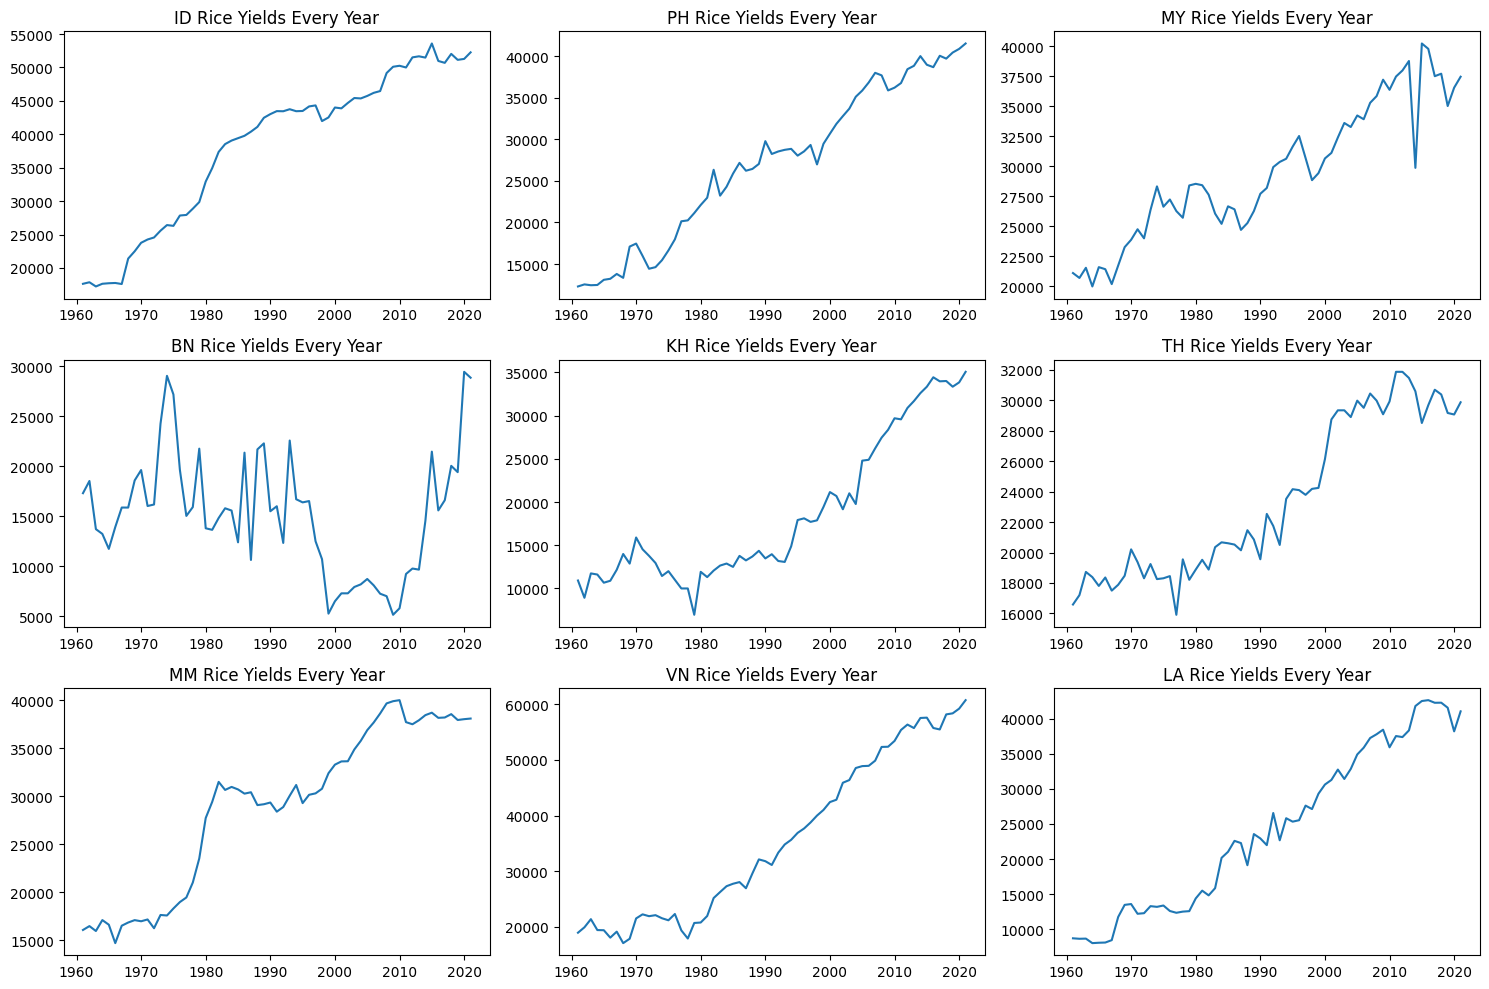

In [ ]:
all_feature = ['ID Rice Yields', 'PH Rice Yields', 'MY Rice Yields', 'BN Rice Yields', 'KH Rice Yields', 'TH Rice Yields', 'MM Rice Yields', 'VN Rice Yields', 'LA Rice Yields']
df_merged[all_feature]
plot_features = df_merged.groupby(df_merged.index)[all_feature].mean()

fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(15, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(all_feature):
    axes[i // 3, i % 3].plot(plot_features[feature])
    axes[i // 3, i % 3].set_title(f'{feature} Every Year')

plt.tight_layout()

plt.show()

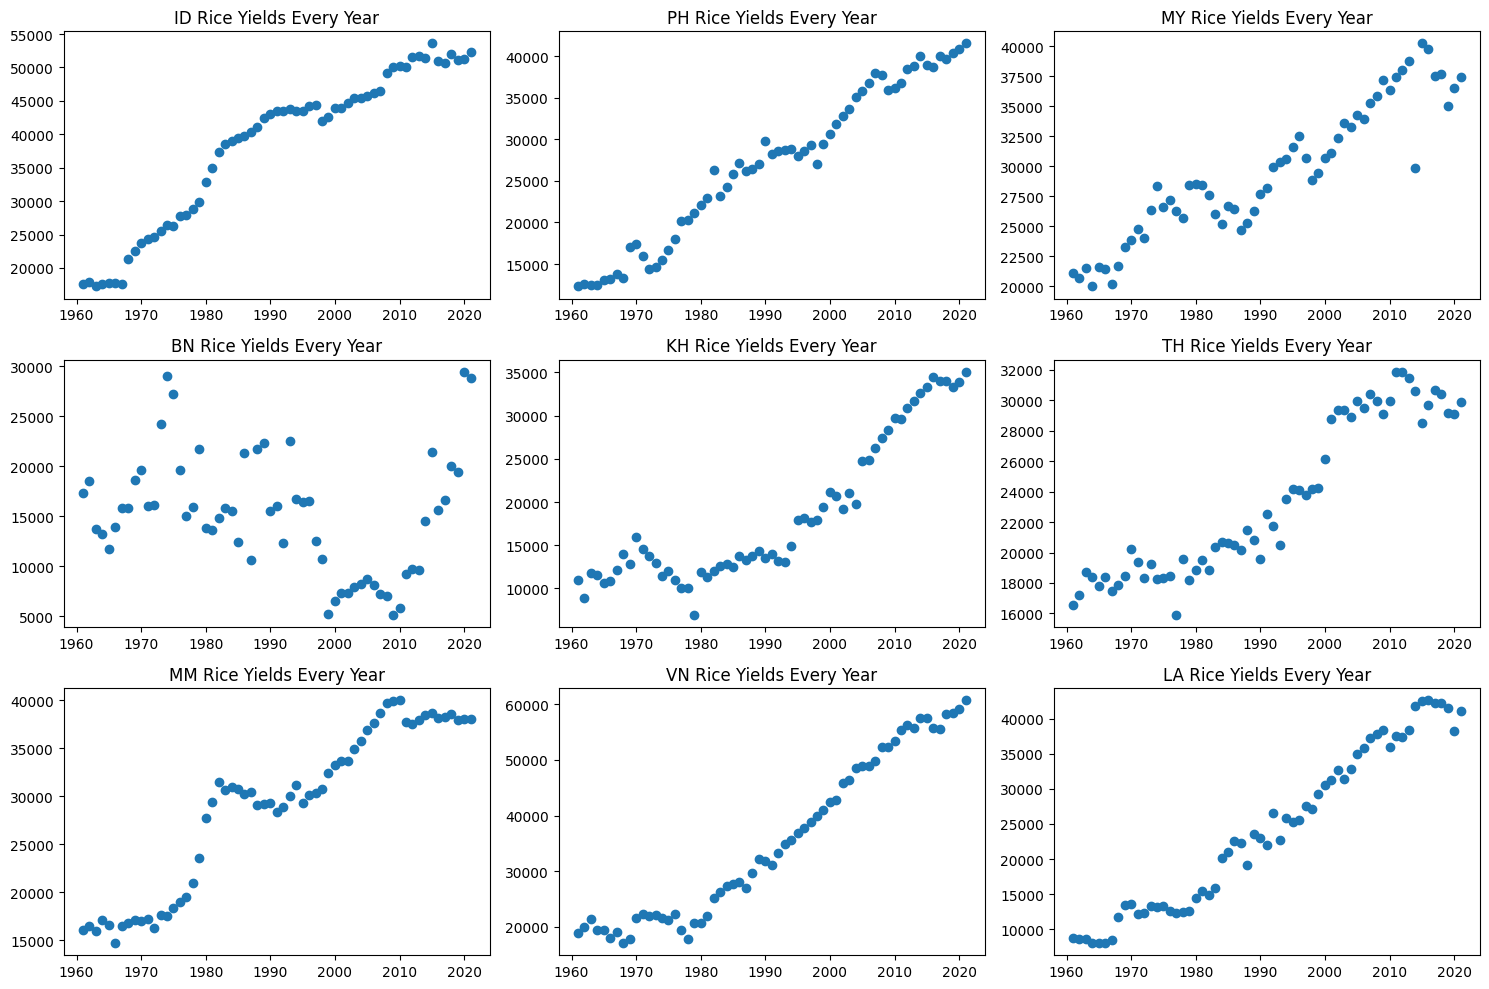

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(15, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(all_feature):
    axes[i // 3, i % 3].scatter(plot_features.index, plot_features[feature])
    axes[i // 3, i % 3].set_title(f'{feature} Every Year')

plt.tight_layout()

plt.show()

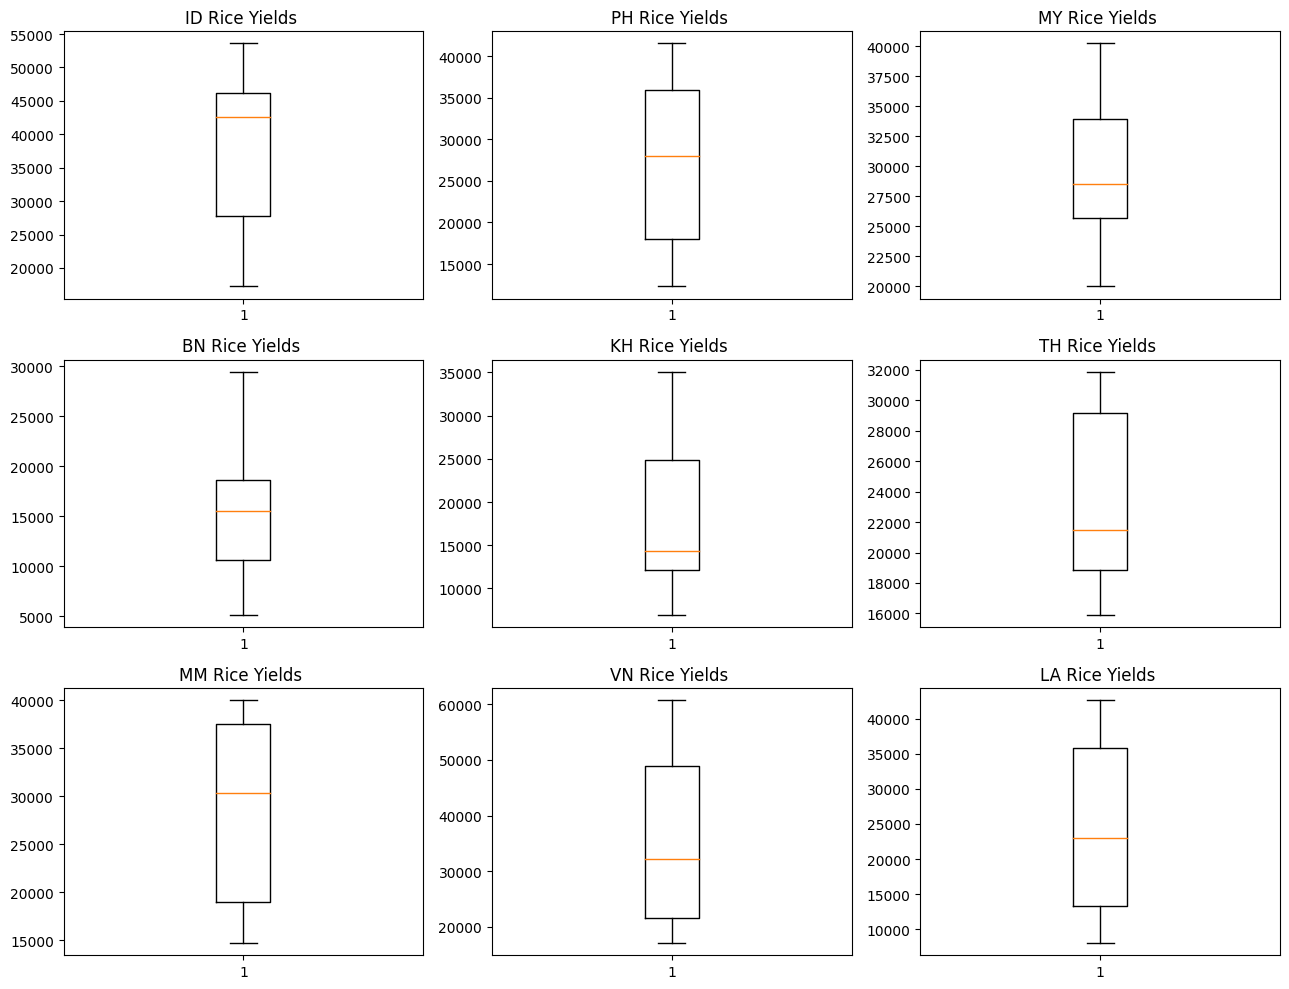

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(13, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(all_feature):
    axes[i // 3, i % 3].boxplot(plot_features[feature])
    axes[i // 3, i % 3].set_title(f'{feature} ')

plt.tight_layout()

plt.show()

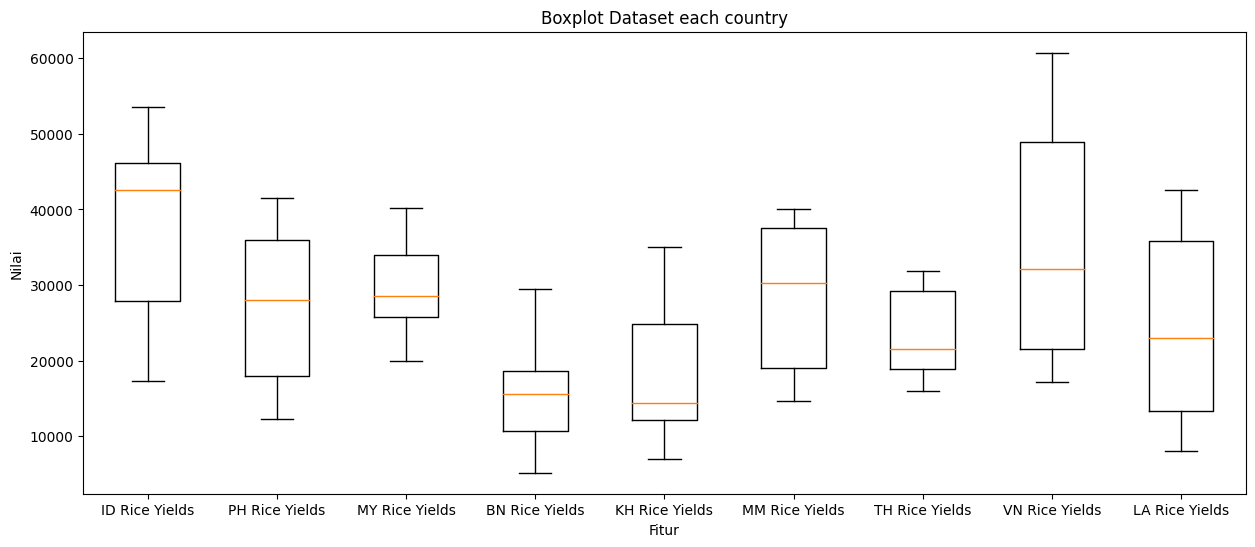

In [ ]:
numerical_columns = df_merged.select_dtypes(include='number')

# Create boxplot
plt.figure(figsize=(15, 6))
plt.boxplot(numerical_columns.values)
plt.xticks(range(1, len(numerical_columns.columns) + 1), numerical_columns.columns)
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.title('Boxplot Dataset each country')
plt.show()

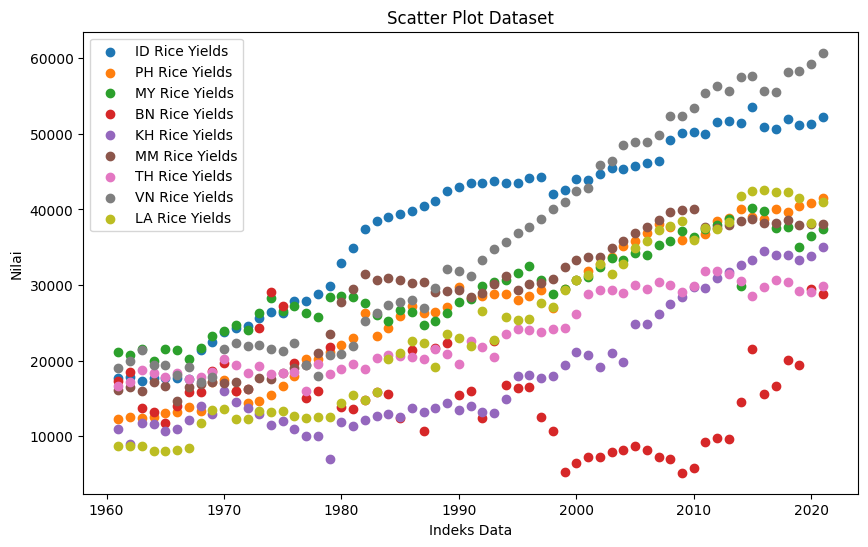

In [ ]:
plt.figure(figsize=(10, 6))
for column in df_merged.columns:
    if column != 'Year':
        plt.scatter(df_merged.index, df_merged[column], label=column)
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.title('Scatter Plot Dataset')
plt.legend()
plt.show()


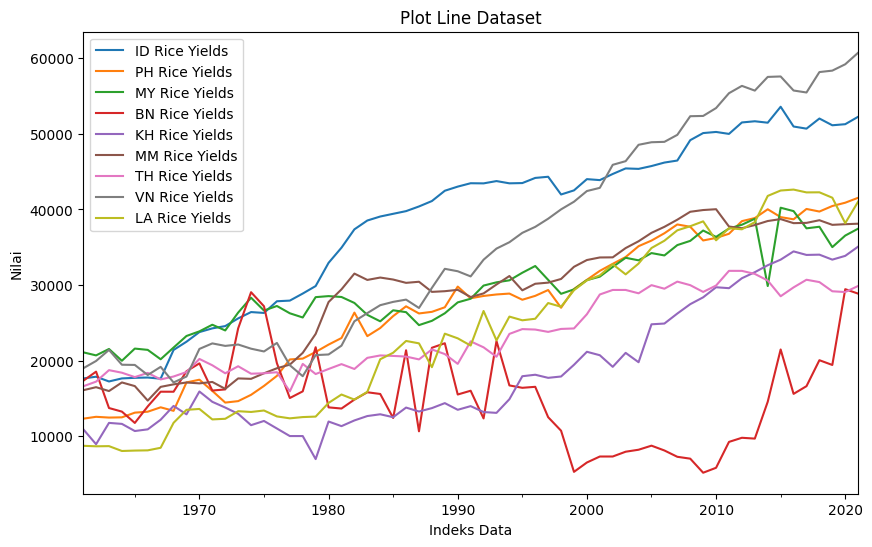

In [ ]:
plt.figure(figsize=(10, 6))
for column in df_merged.columns:
    if column != 'Year':
        df_merged[column].plot(kind='line', label=column)
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.title('Plot Line Dataset')
plt.legend()
plt.show()


# Normalisasi Data

In [ ]:
def scaled_data(df_merged):
    for i in df_merged:
        if i != 'Year':  # Tambahkan kondisi untuk mengecualikan kolom 'year'
            x = df_merged[i].max()
            y = len(str(abs(x)))
            df_merged[i] = df_merged[i] / 10**y

    return df_merged

In [ ]:
scaled_data

<function __main__.scaled_data(df_merged)>

In [ ]:
print(scaled_data(df_merged))

                 Year  ID Rice Yields  PH Rice Yields  MY Rice Yields  \
Year                                                                    
1961-01-01 1961-01-01         0.17623         0.12299         0.21086   
1962-01-01 1962-01-01         0.17855         0.12548         0.20678   
1963-01-01 1963-01-01         0.17226         0.12447         0.21525   
1964-01-01 1964-01-01         0.17630         0.12478         0.19968   
1965-01-01 1965-01-01         0.17708         0.13099         0.21578   
...               ...             ...             ...             ...   
2017-01-01 2017-01-01         0.50690         0.40061         0.37496   
2018-01-01 2018-01-01         0.52031         0.39718         0.37704   
2019-01-01 2019-01-01         0.51137         0.40449         0.35009   
2020-01-01 2020-01-01         0.51279         0.40888         0.36538   
2021-01-01 2021-01-01         0.52263         0.41540         0.37452   

            BN Rice Yields  KH Rice Yields  MM Ric

# Uji Stasioneritas

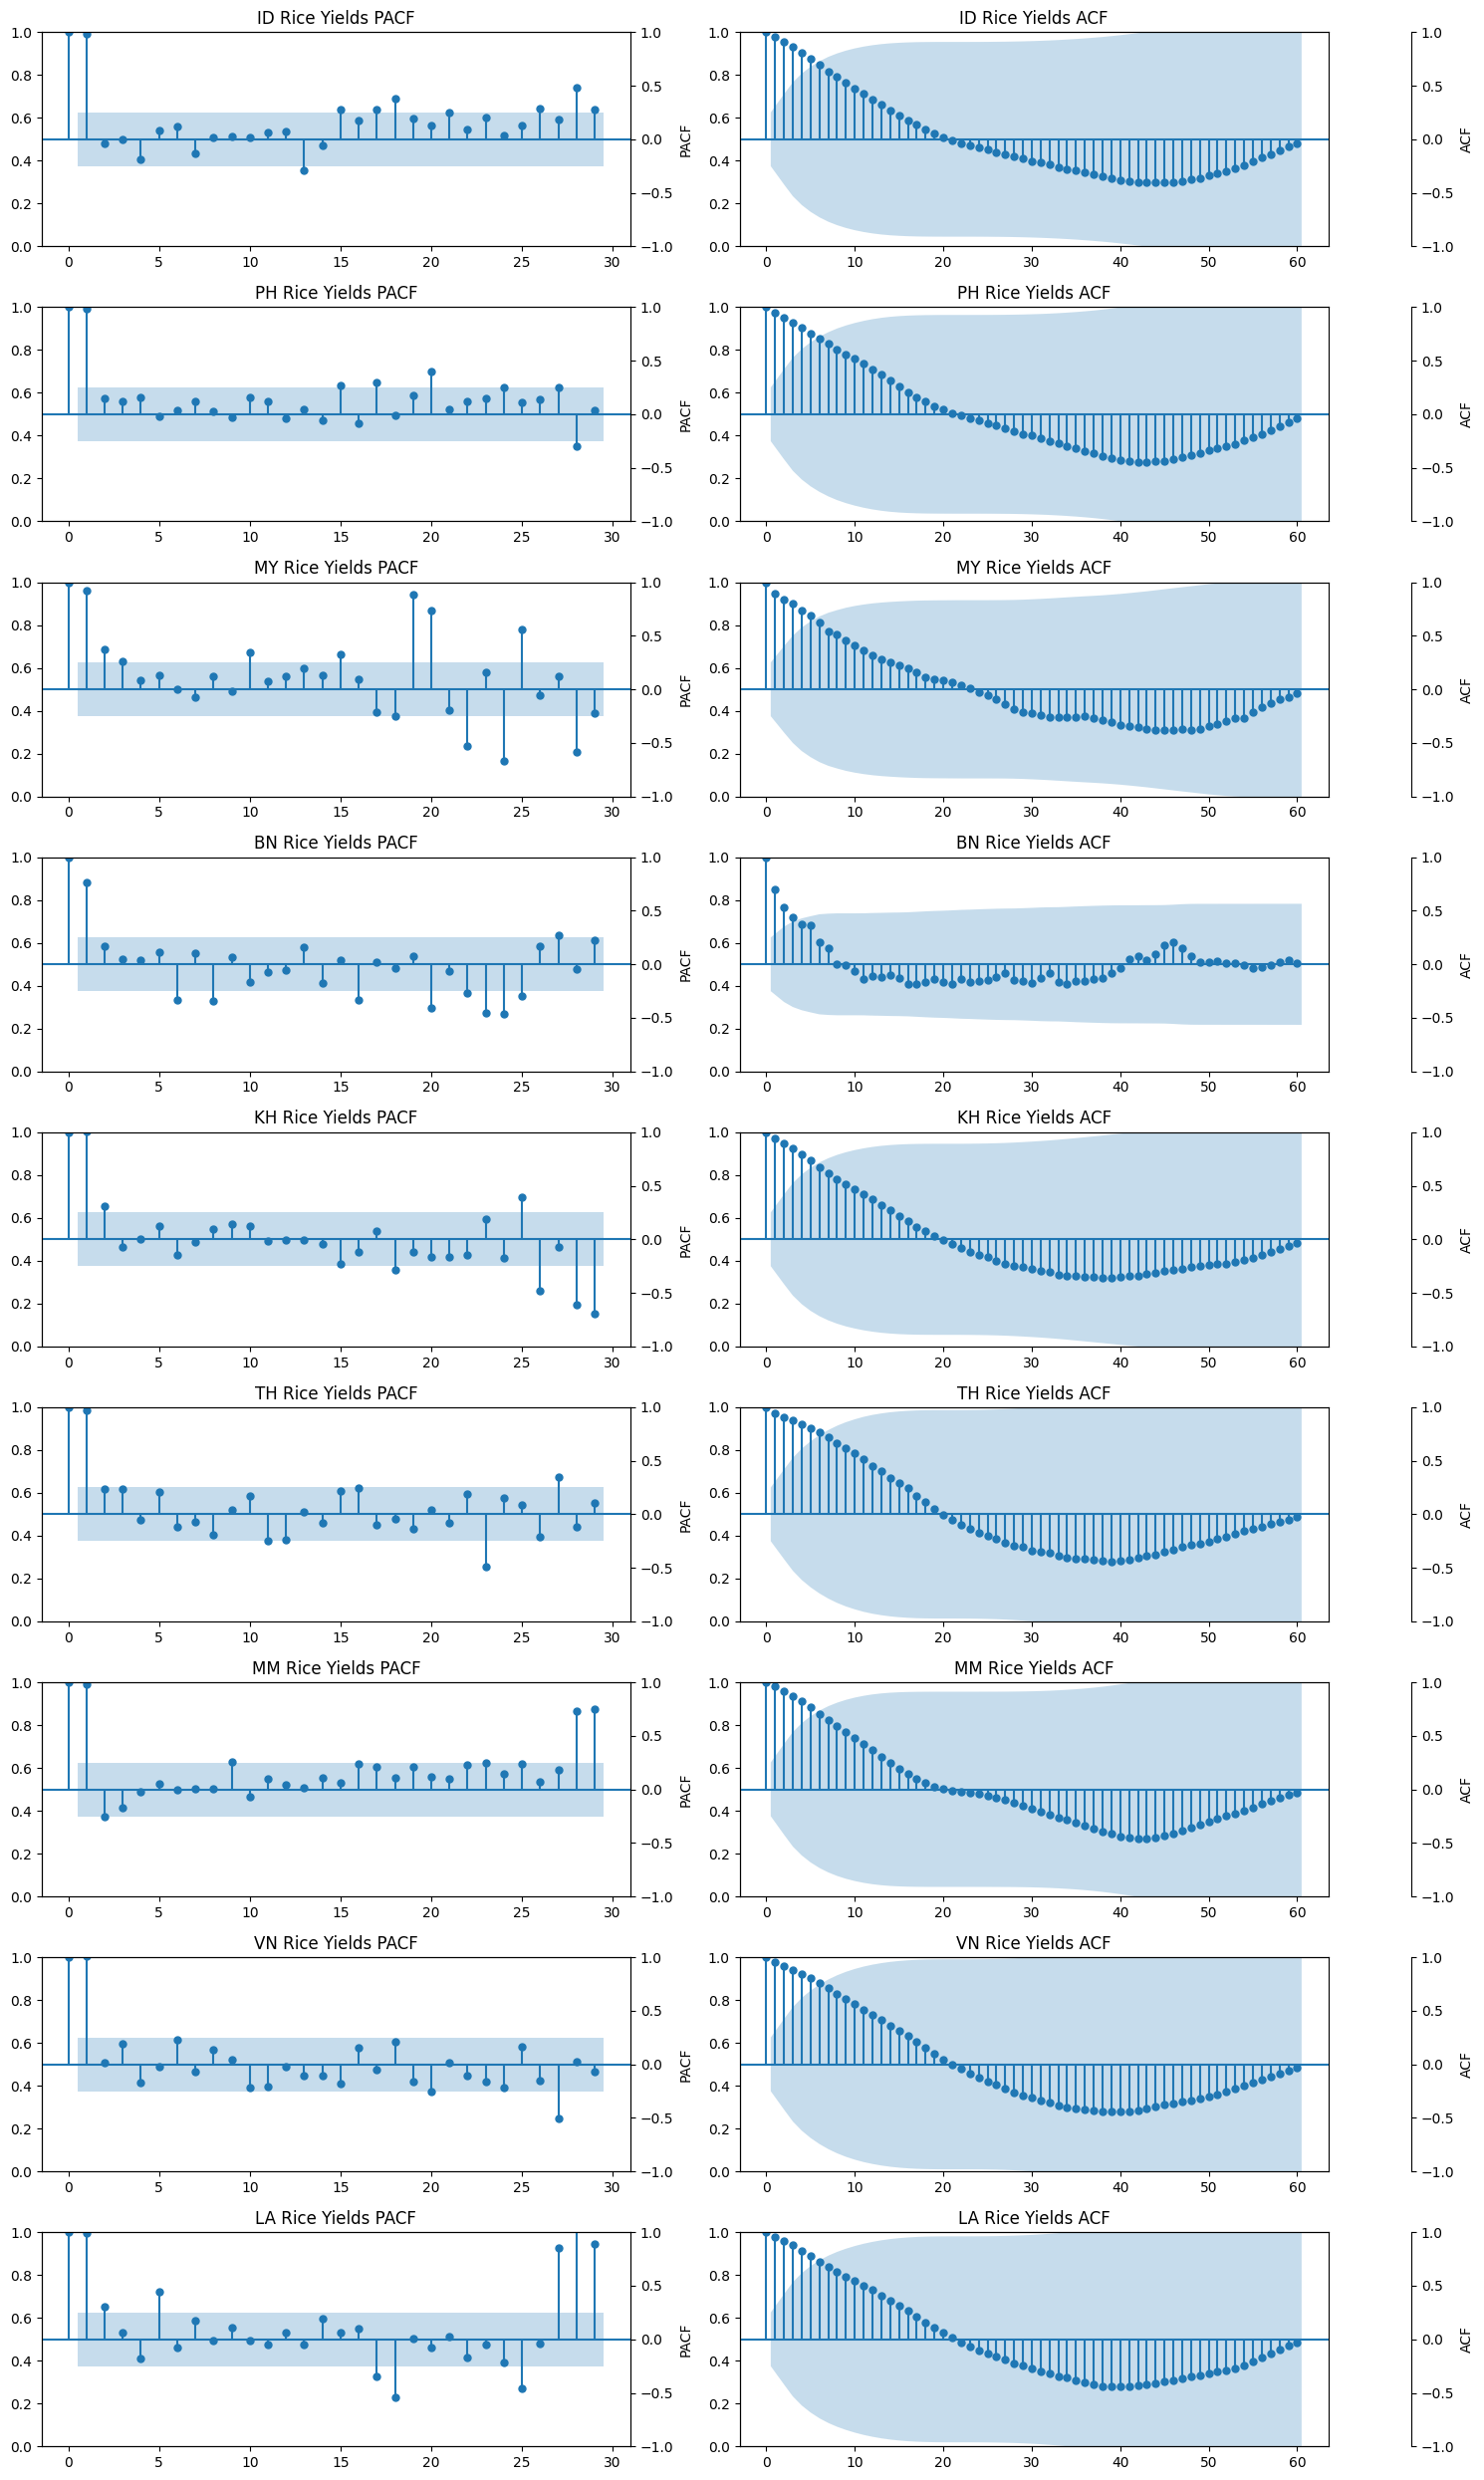

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

colomns = ['ID Rice Yields', 'PH Rice Yields', 'MY Rice Yields', 'BN Rice Yields', 'KH Rice Yields', 'TH Rice Yields', 'MM Rice Yields', 'VN Rice Yields', 'LA Rice Yields']
plot_variables = df_merged.groupby(df_merged.index)[colomns].mean()

fig, axes = plt.subplots(
    nrows=len(colomns),
    ncols=2,
    figsize=(15, 25),
    facecolor="w",
    edgecolor="k"
)

for i, variable in enumerate(colomns):
    # Plot PACF
    ax_pacf = axes[i, 0].twinx()
    ax_pacf.set_ylabel('PACF')
    plot_pacf(plot_variables[variable].values.ravel(), ax=ax_pacf, lags=range(0, int(0.5*len(df_merged))), title=f'{variable} PACF', method='ols')


    # Plot ACF
    ax_acf = axes[i, 1].twinx()
    ax_acf.spines['right'].set_position(('outward', 60))
    ax_acf.set_ylabel('ACF')
    plot_acf(plot_variables[variable].values.ravel(), ax=ax_acf, lags=range(0, len(df_merged)), title=f'{variable} ACF')


plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Ambil kolom 'ID Rice Yields', 'PH Rice Yields', dsb. sebagai dataset numerik
dataset = [df_merged['ID Rice Yields'], df_merged['PH Rice Yields'], df_merged['MY Rice Yields'], df_merged['BN Rice Yields'], df_merged['KH Rice Yields'], df_merged['TH Rice Yields'], df_merged['MM Rice Yields'], df_merged['VN Rice Yields'], df_merged['LA Rice Yields']]

# melakukan loop pada setiap dataset dan menguji stasioneritas dengan ADF
for i, dataset in enumerate(dataset):
    result = adfuller(dataset)
    print(f'Dataset {i+1}:\nADF Statistic: {result[0]}\np-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[0] < result[4]['5%']:
        print('Reject H0, the test results show the data is stationary.')
    else:
        print('Accept H0, the test results show the data is not stationary.')
    print()

Dataset 1:
ADF Statistic: -1.6104987567431517
p-value: 0.4777138168514945
Critical Values: {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}
Accept H0, the test results show the data is not stationary.

Dataset 2:
ADF Statistic: -0.5476624548663465
p-value: 0.8823751656377392
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Accept H0, the test results show the data is not stationary.

Dataset 3:
ADF Statistic: -0.9805445924275104
p-value: 0.7602939144425074
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Accept H0, the test results show the data is not stationary.

Dataset 4:
ADF Statistic: -1.7894781405077698
p-value: 0.38569787530275756
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Accept H0, the test results show the data is not stationary.

Dataset 5:
ADF Statistic: 0.804398906984613
p-value: 0.99170684

In [ ]:
df_merged['Diff_indonesia'] = df_merged['ID Rice Yields'].diff()
df_merged['Diff_filipina'] = df_merged['PH Rice Yields'].diff()
df_merged['Diff_malaysia'] = df_merged['MY Rice Yields'].diff()
df_merged['Diff_brunei'] = df_merged['BN Rice Yields'].diff()
df_merged['Diff_kamboja'] = df_merged['KH Rice Yields'].diff()
df_merged['Diff_myanmar'] = df_merged['TH Rice Yields'].diff()
df_merged['Diff_thailand'] = df_merged['MM Rice Yields'].diff()
df_merged['Diff_vietnam'] = df_merged['VN Rice Yields'].diff()
df_merged['Diff_laos'] = df_merged['LA Rice Yields'].diff()

In [ ]:
df_merged = df_merged.dropna()

In [ ]:
df_merged.isnull().sum()

Year              0
ID Rice Yields    0
PH Rice Yields    0
MY Rice Yields    0
BN Rice Yields    0
KH Rice Yields    0
MM Rice Yields    0
TH Rice Yields    0
VN Rice Yields    0
LA Rice Yields    0
Diff_indonesia    0
Diff_filipina     0
Diff_malaysia     0
Diff_brunei       0
Diff_kamboja      0
Diff_myanmar      0
Diff_thailand     0
Diff_vietnam      0
Diff_laos         0
dtype: int64

In [ ]:
data = [df_merged['Diff_indonesia'], df_merged['Diff_filipina'], df_merged['Diff_malaysia'], df_merged['Diff_brunei'], df_merged['Diff_kamboja'], df_merged['Diff_myanmar'], df_merged['Diff_thailand'], df_merged['Diff_vietnam'], df_merged['Diff_laos']]

# melakukan loop pada setiap dataset dan menguji stasioneritas dengan ADF
for i, data in enumerate(data):
    result = adfuller(data)
    print(f'Dataset {i+1}:\nADF Statistic: {result[0]}\np-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[0] < result[4]['5%']:
        print('Reject H0, the test results show the data is stationary.')
    else:
        print('Accept H0, the test results show the data is not stationary.')
    print()

Dataset 1:
ADF Statistic: -3.309217359434935
p-value: 0.014471452257879842
Critical Values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Reject H0, the test results show the data is stationary.

Dataset 2:
ADF Statistic: -8.799582879544959
p-value: 2.1301839543629973e-14
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Reject H0, the test results show the data is stationary.

Dataset 3:
ADF Statistic: -8.198013265465722
p-value: 7.359271417214418e-13
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Reject H0, the test results show the data is stationary.

Dataset 4:
ADF Statistic: -10.071812580836609
p-value: 1.2532028655047674e-17
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Reject H0, the test results show the data is stationary.

Dataset 5:
ADF Statistic: -10.334983233043419
p-value: 2.77899302223

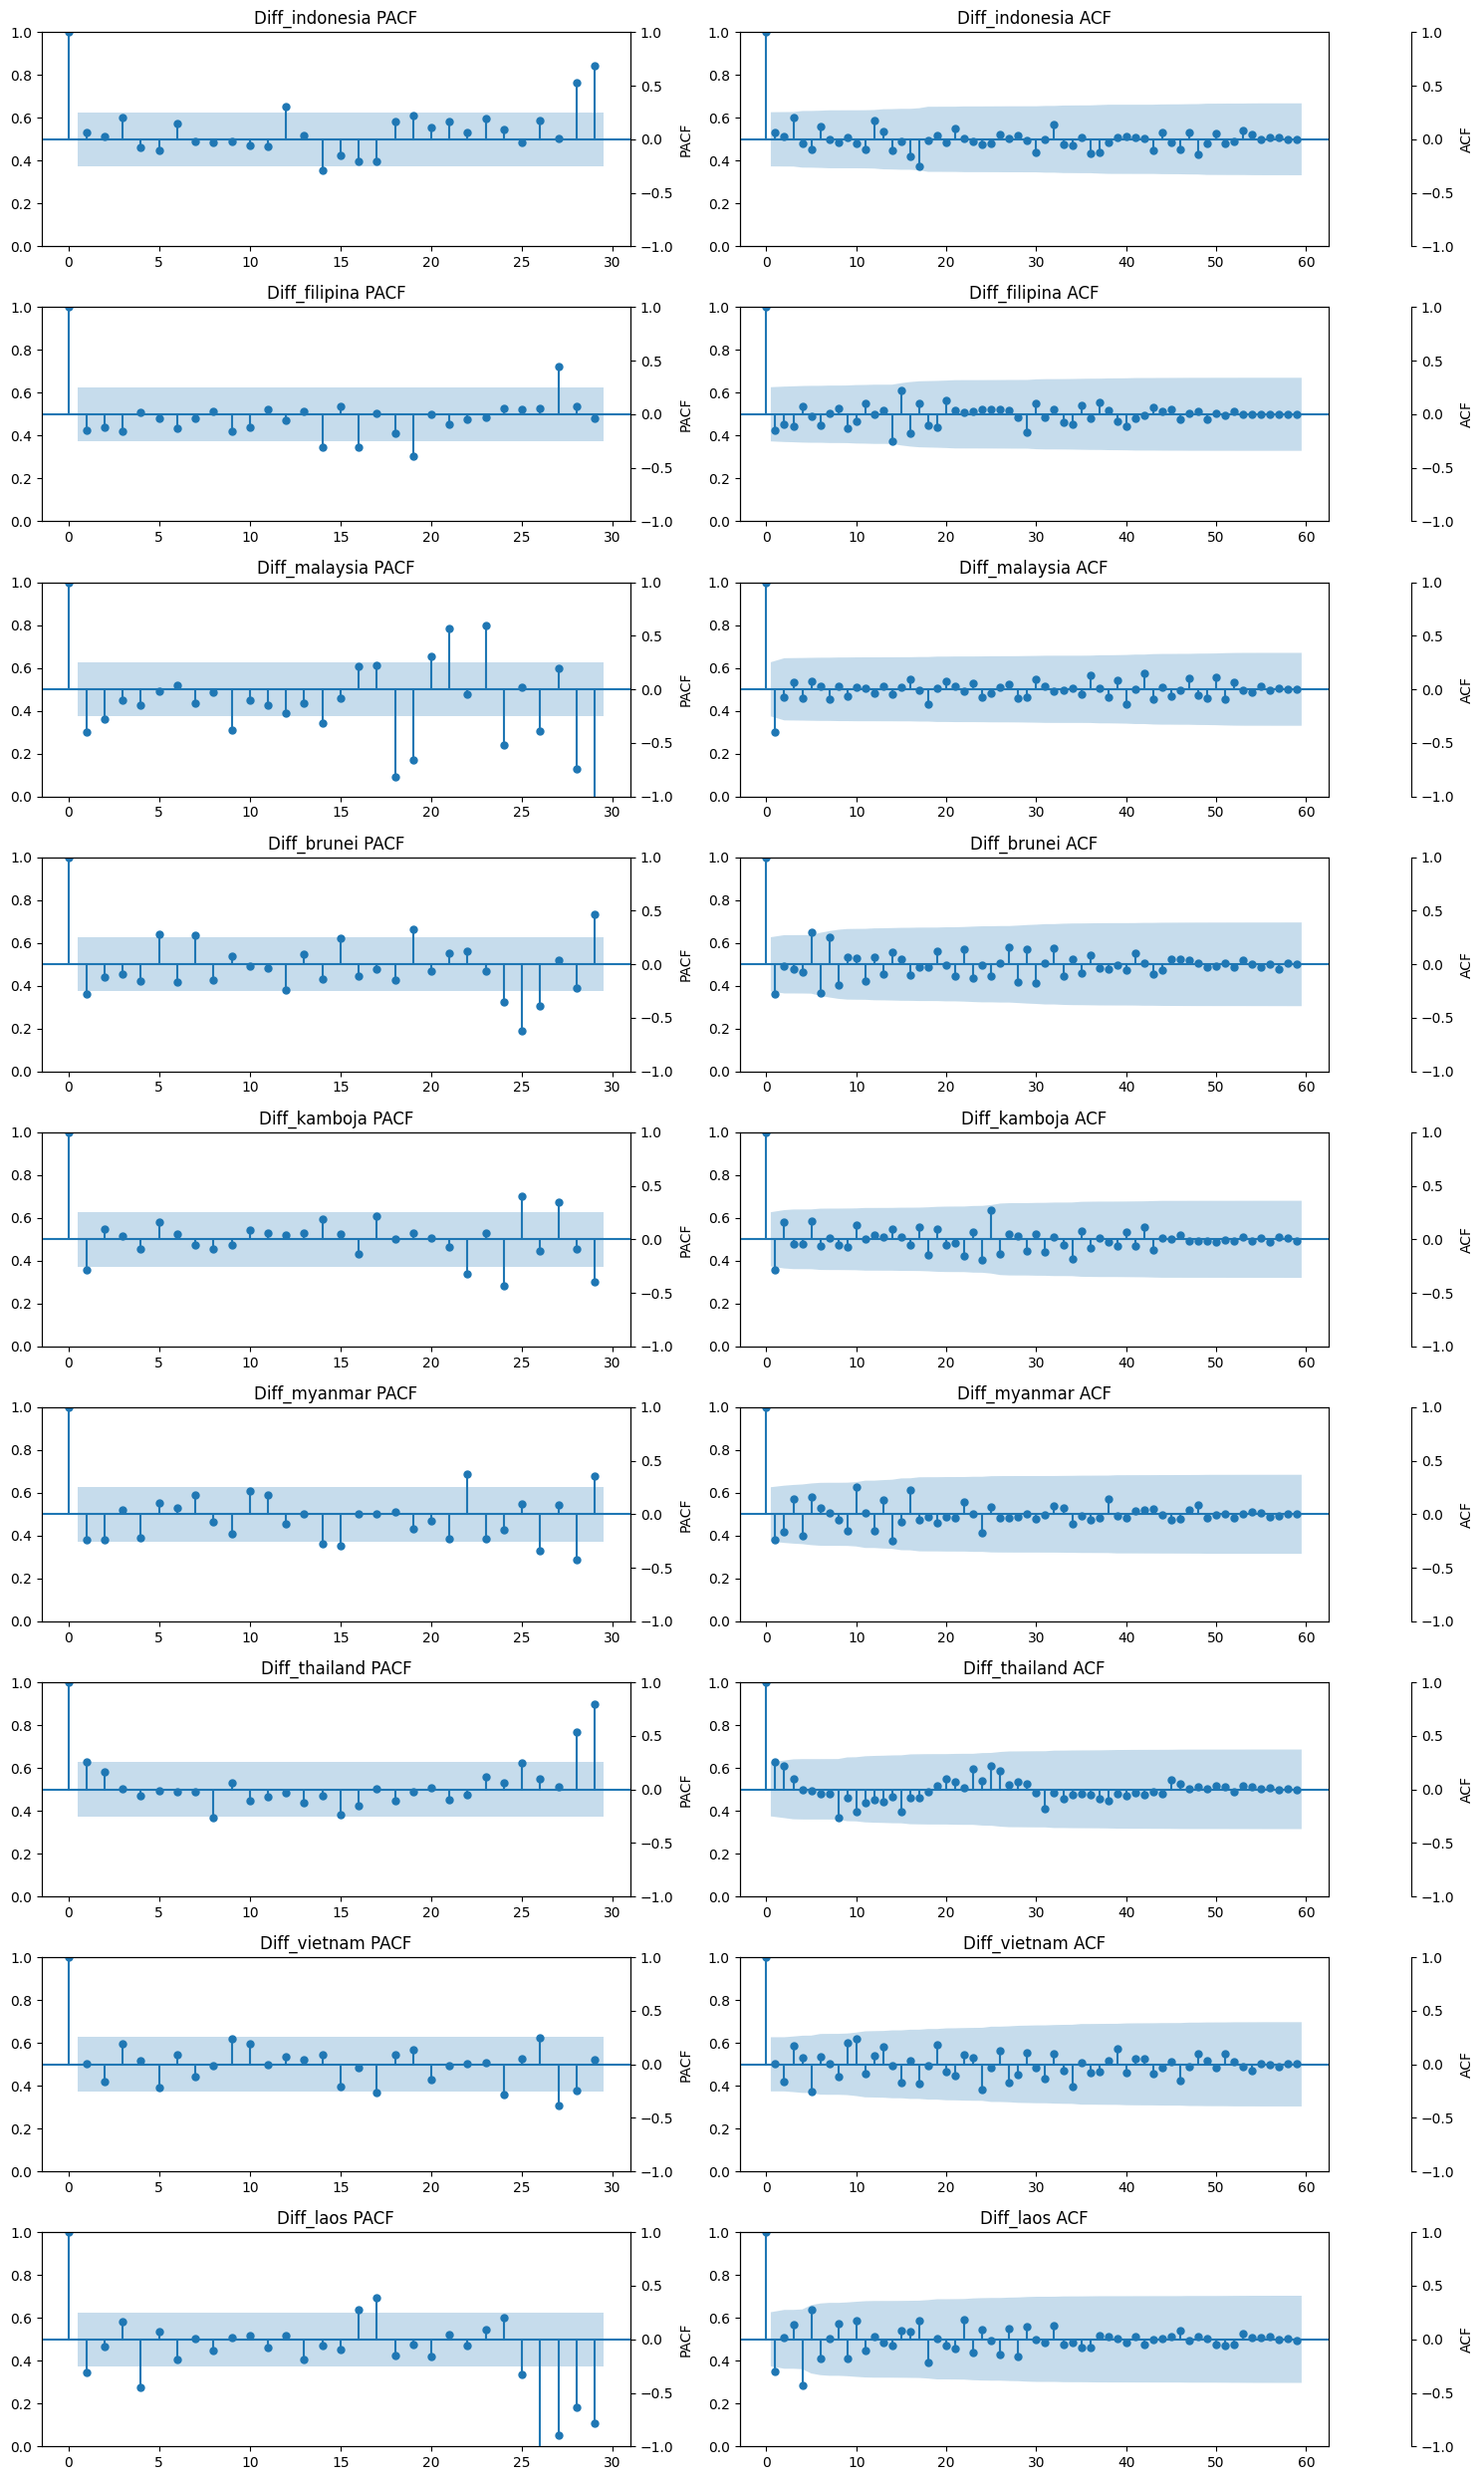

In [ ]:
colomns = ['Diff_indonesia', 'Diff_filipina', 'Diff_malaysia', 'Diff_brunei', 'Diff_kamboja', 'Diff_myanmar', 'Diff_thailand', 'Diff_vietnam', 'Diff_laos']
plot_variables = df_merged.groupby(df_merged.index)[colomns].mean()

fig, axes = plt.subplots(
    nrows=len(colomns),
    ncols=2,
    figsize=(15, 25),
    facecolor="w",
    edgecolor="k"
)

for i, variable in enumerate(colomns):
    # Plot PACF
    ax_pacf = axes[i, 0].twinx()
    ax_pacf.set_ylabel('PACF')
    plot_pacf(plot_variables[variable].values.ravel(), ax=ax_pacf, lags=range(0, int(0.5*len(df_merged))), title=f'{variable} PACF', method='ols')


    # Plot ACF
    ax_acf = axes[i, 1].twinx()
    ax_acf.spines['right'].set_position(('outward', 60))
    ax_acf.set_ylabel('ACF')
    plot_acf(plot_variables[variable].values.ravel(), ax=ax_acf, lags=range(0, len(df_merged)), title=f'{variable} ACF')


plt.tight_layout()
plt.show()

In [ ]:
print(df_merged.dtypes)

Year              datetime64[ns]
ID Rice Yields           float64
PH Rice Yields           float64
MY Rice Yields           float64
BN Rice Yields           float64
KH Rice Yields           float64
MM Rice Yields           float64
TH Rice Yields           float64
VN Rice Yields           float64
LA Rice Yields           float64
Diff_indonesia           float64
Diff_filipina            float64
Diff_malaysia            float64
Diff_brunei              float64
Diff_kamboja             float64
Diff_myanmar             float64
Diff_thailand            float64
Diff_vietnam             float64
Diff_laos                float64
dtype: object


In [ ]:
len(df_merged)

60

# Split Dataset

In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(df_merged, test_size=0.2, shuffle=False)

In [ ]:
print(len(train_data))
print(len(test_data))

48
12


# Select Exogenous and Endogenous Variable

In [ ]:
# Select Exog and Edog Indonesia
train_ID_X = train_data[['Diff_filipina','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_ID_y = train_data['Diff_indonesia']

test_ID_X = test_data[['Diff_filipina','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_ID_y = test_data['Diff_indonesia']

# Select Exog and Edog  Malaysia
train_MY_X = train_data[['Diff_indonesia','Diff_filipina','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_MY_y = train_data['Diff_malaysia']

test_MY_X = test_data[['Diff_indonesia','Diff_filipina','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_MY_y = test_data['Diff_malaysia']

# Select Exog and Edog Thailand
train_TH_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_kamboja','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_TH_y = train_data['Diff_thailand']

test_TH_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_kamboja','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_TH_y = test_data['Diff_thailand']

# Select Exog and Edog Filipina
train_PH_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_PH_y = train_data['Diff_filipina']

test_PH_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_PH_y = test_data['Diff_filipina']

# Select Exog and Edog Vietnam
train_VN_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_laos']]
train_VN_y = train_data['Diff_vietnam']

test_VN_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_laos']]
test_VN_y = test_data['Diff_vietnam']

# Select Exog and Edog Brunei
train_BN_X = train_data[['Diff_indonesia','Diff_filipina','Diff_malaysia','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_BN_y = train_data['Diff_brunei']

test_BN_X = test_data[['Diff_indonesia','Diff_filipina','Diff_malaysia','Diff_kamboja','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_BN_y = test_data['Diff_brunei']

# Select Exog and Edog Laos
train_LA_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_vietnam']]
train_LA_y = train_data['Diff_laos']

test_LA_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_myanmar','Diff_vietnam']]
test_LA_y = test_data['Diff_laos']

# Select Exog and Edog Myanmar
train_MM_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_vietnam','Diff_laos']]
train_MM_y = train_data['Diff_myanmar']

test_MM_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_kamboja','Diff_thailand','Diff_filipina','Diff_vietnam','Diff_laos']]
test_MM_y = test_data['Diff_myanmar']

# Select Exog and Edog Kamboja
train_KH_X = train_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
train_KH_y = train_data['Diff_kamboja']

test_KH_X = test_data[['Diff_indonesia','Diff_malaysia','Diff_brunei','Diff_filipina','Diff_thailand','Diff_myanmar','Diff_vietnam','Diff_laos']]
test_KH_y = test_data['Diff_kamboja']


# Plot ACF dan PACF

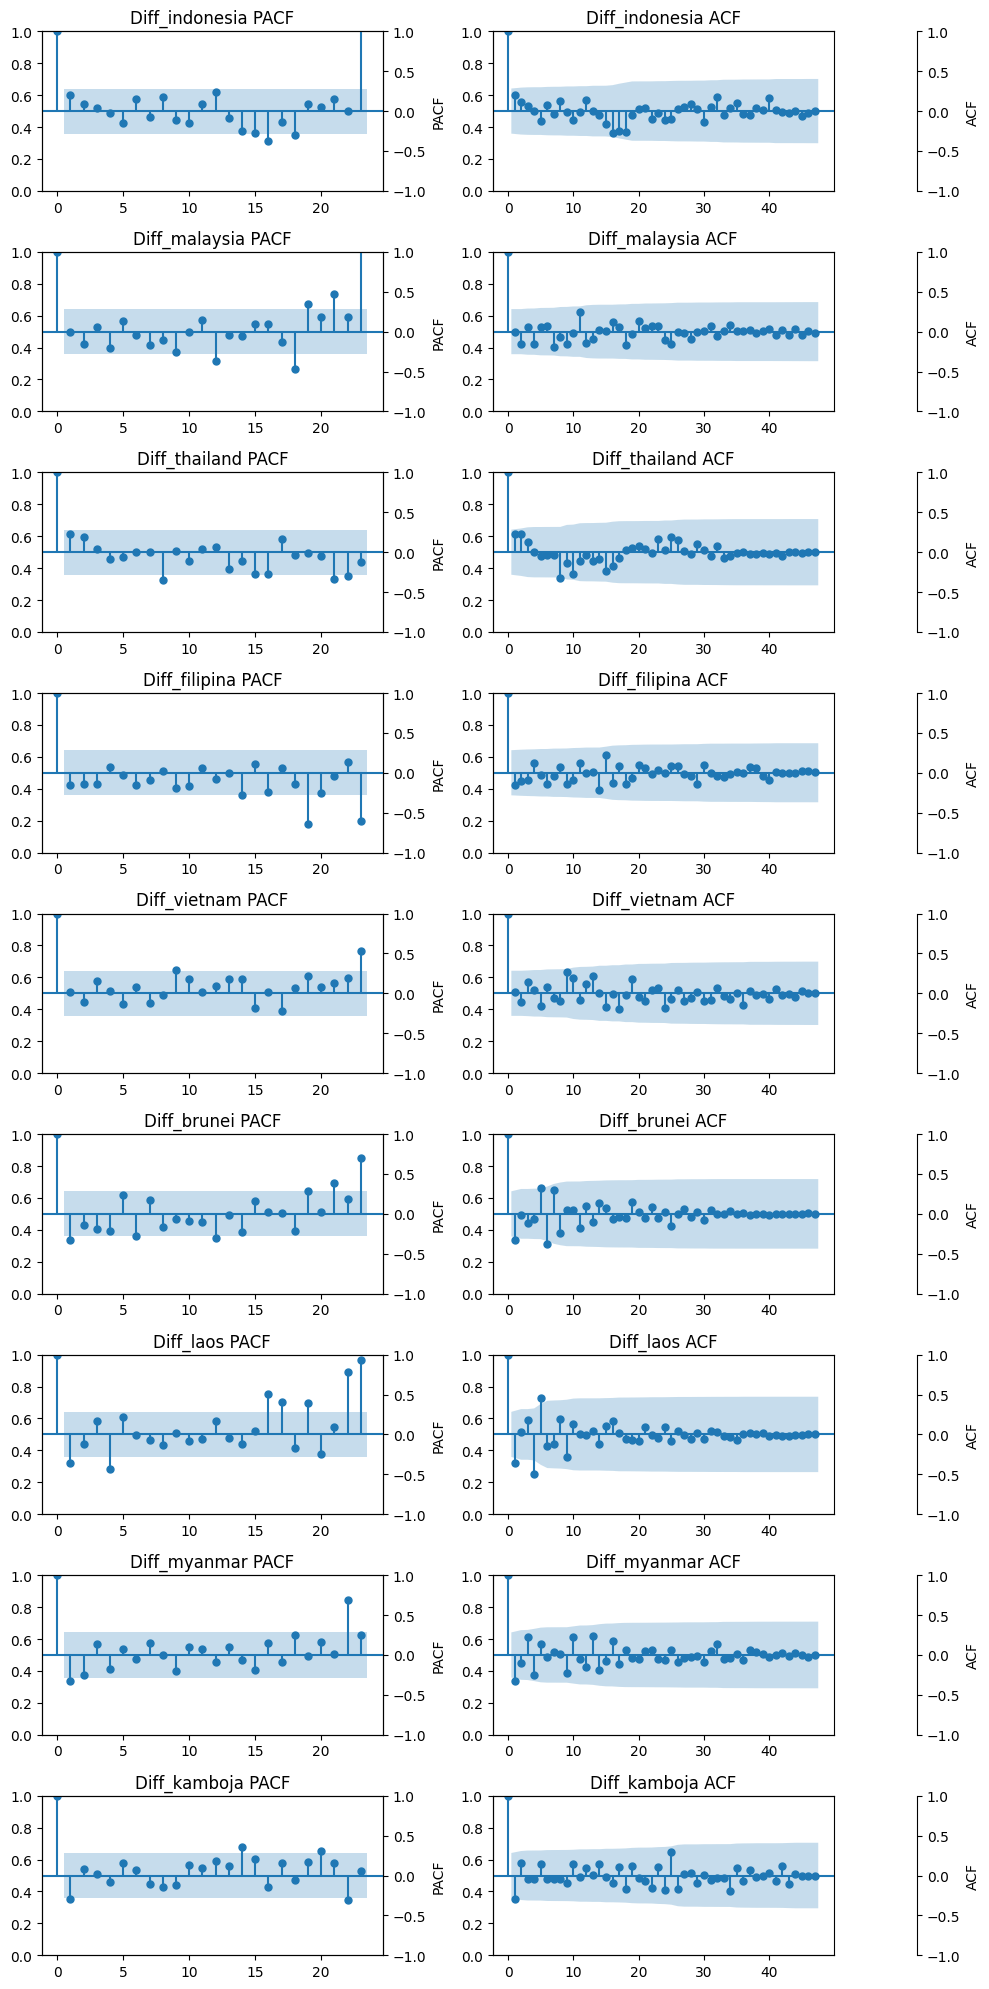

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

all_variable = ['Diff_indonesia', 'Diff_malaysia', 'Diff_thailand', 'Diff_filipina', 'Diff_vietnam', 'Diff_brunei', 'Diff_laos', 'Diff_myanmar', 'Diff_kamboja']
plot_variables = train_data.groupby(train_data.index)[all_variable].mean()

fig, axes = plt.subplots(
    nrows=len(all_variable),
    ncols=2,
    figsize=(10, 20),
    facecolor="w",
    edgecolor="k"
)

for i, variable in enumerate(all_variable):
    # Plot PACF
    ax_pacf = axes[i, 0].twinx()
    plot_pacf(plot_variables[variable], ax=ax_pacf, lags=range(0, int(0.5*len(train_data))), title=f'{variable} PACF', method='ols')
    ax_pacf.set_ylabel('PACF')

    # Plot ACF
    ax_acf = axes[i, 1].twinx()
    ax_acf.spines['right'].set_position(('outward', 60))
    plot_acf(plot_variables[variable], ax=ax_acf, lags=range(0, len(train_data)), title=f'{variable} ACF')
    ax_acf.set_ylabel('ACF')

plt.tight_layout()
plt.show()


Berdasarkan plot pacf dan acf diatas, diperoleh jumlah lag signifikan yang paling banyak keluar dari area adalah sebanyak 7 yaitu pada diff_laos, sehingga range yang akan digunakan untuk melakukan grid search adalah (0,8), dimana nilai akan di iterasi mulai dari 0 sampai 7. Maka inputan nilai 7 akan dimasukkan ke dalam iterasi. Adapun pemilihan set hyperparamter p dan q adalah berdasarkan signifikasi lag yang terdapat pada plot pacf dan acf ini.

# Eksperimen Indonesia

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_ID_y,
                     exog= train_ID_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-275.470, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-285.089, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-291.476, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-277.463, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-289.867, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-290.733, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-288.662, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-294.353, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-286.995, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-290.614, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.062 seconds


In [ ]:
# Mencetak hasil iterasi AIC dan BIC
print(step_wise.aic())
print(step_wise.bic())

-294.3530739069996
-290.6527787035795


In [ ]:
best_order_id = step_wise.order
print("Best Order:", best_order_id)

Best Order: (0, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_ID_y, exog=train_ID_X,
                     order=best_order_id)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:         Diff_indonesia   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 155.762
Date:                Thu, 06 Jul 2023   AIC                           -291.524
Time:                        13:45:36   BIC                           -273.022
Sample:                    01-01-1962   HQIC                          -284.562
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Diff_filipina     0.0003      0.122      0.002      0.998      -0.238       0.239
Diff_malaysia     0.2382      0.155      1.539      0.124      -0.065       0.542
Diff_brunei       0.0086      0.040     

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result.aic, 2)
bic = round(result.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -291.52
BIC: -273.02


In [ ]:
# Melakukan prediksi test set dengan model ARIMAX
exog_test = test_ID_X
prediction_test_id = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_id

2010-01-01    0.001496
2011-01-01   -0.000168
2012-01-01    0.005235
2013-01-01    0.007626
2014-01-01   -0.013428
2015-01-01    0.030802
2016-01-01    0.001373
2017-01-01   -0.003370
2018-01-01    0.004522
2019-01-01   -0.006060
2020-01-01    0.006609
2021-01-01    0.007954
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_ID_y

Year
2010-01-01    0.00148
2011-01-01   -0.00258
2012-01-01    0.01515
2013-01-01    0.00158
2014-01-01   -0.00191
2015-01-01    0.02111
2016-01-01   -0.02615
2017-01-01   -0.00283
2018-01-01    0.01341
2019-01-01   -0.00894
2020-01-01    0.00142
2021-01-01    0.00984
Name: Diff_indonesia, dtype: float64

MAE:0.007209


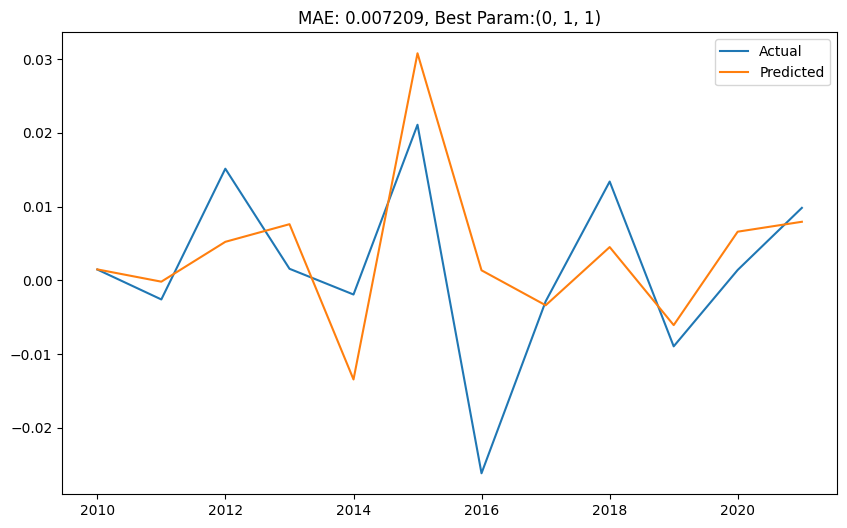

In [ ]:
# Metric
mae = mean_absolute_error(test_ID_y, prediction_test_id)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_ID_y.index, test_ID_y.values, label='Actual')
plt.plot(test_ID_y.index, prediction_test_id, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param:{best_order_id}")
plt.show()

In [ ]:
prediction_train_id = result.predict(exog=train_ID_X, start=0, end=len(train_data)-1)

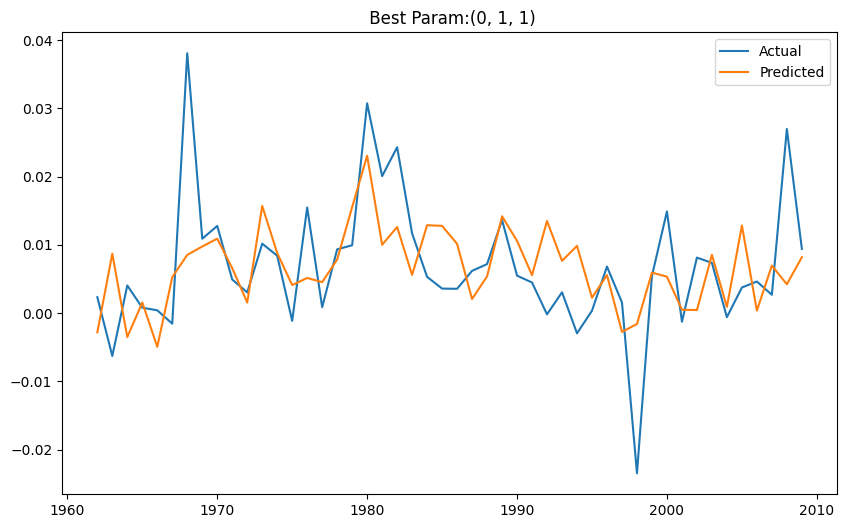

In [ ]:
# Plot
plt.plot(train_ID_y.index, train_ID_y.values, label='Actual')
plt.plot(train_ID_y.index, prediction_train_id, label='Predicted')
plt.legend()
plt.title(label=f" Best Param:{best_order_id}")
plt.show()

In [ ]:
prediction_all_id = result.predict(exog=test_ID_X,start=0, end=len(df_merged)-1)

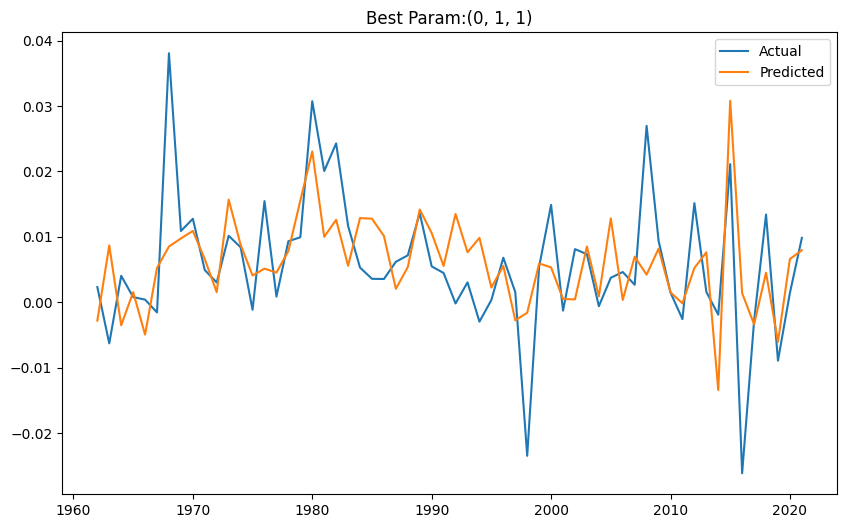

In [ ]:
# Plot
plt.plot(df_merged['Diff_indonesia'].index, df_merged['Diff_indonesia'].values, label='Actual')
plt.plot(df_merged['Diff_indonesia'].index, prediction_all_id, label='Predicted')
plt.legend()
plt.title(label=f"Best Param:{best_order_id}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['ID Rice Yields'].iloc[0]
final_test_predictions_id = prediction_test_id.cumsum() + base_value

In [ ]:
def inverse_decimal_scaling(data, scale_factor):
    return data * scale_factor

# Faktor skala yang digunakan saat melakukan decimal scaling
scale_factor = 100000

In [ ]:
final_test_predictions_id = final_test_predictions_id.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_id)

2010-01-01    50402.559580
2011-01-01    50385.737117
2012-01-01    50909.280777
2013-01-01    51671.857461
2014-01-01    50329.095583
2015-01-01    53409.267429
2016-01-01    53546.556621
2017-01-01    53209.571418
2018-01-01    53661.763555
2019-01-01    53055.737103
2020-01-01    53716.674389
2021-01-01    54512.105717
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['ID Rice Yields'] = test_data['ID Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['ID Rice Yields'])

Year
2010-01-01    50253.0
2011-01-01    49995.0
2012-01-01    51510.0
2013-01-01    51668.0
2014-01-01    51477.0
2015-01-01    53588.0
2016-01-01    50973.0
2017-01-01    50690.0
2018-01-01    52031.0
2019-01-01    51137.0
2020-01-01    51279.0
2021-01-01    52263.0
Name: ID Rice Yields, dtype: float64


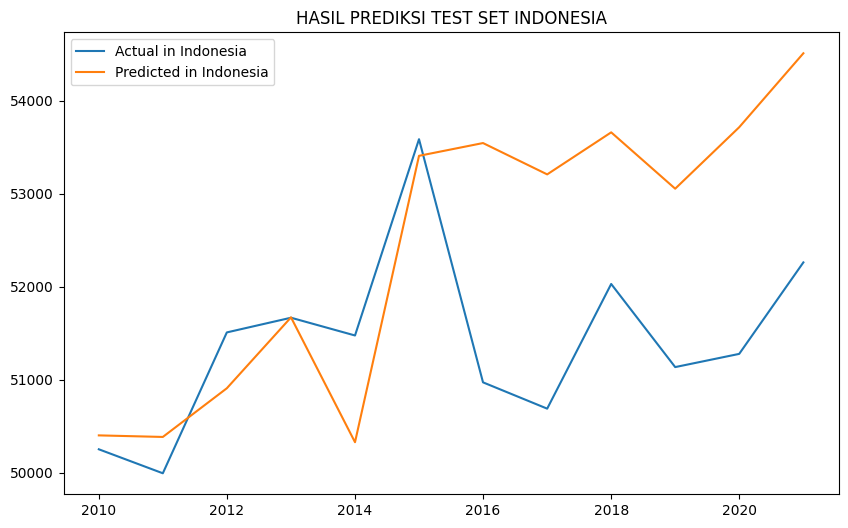

In [ ]:
# Plot
plt.plot(test_data['ID Rice Yields'].index, test_data['ID Rice Yields'].values, label='Actual in Indonesia')
plt.plot(test_data['ID Rice Yields'].index, final_test_predictions_id, label='Predicted in Indonesia')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET INDONESIA')
plt.show()

In [ ]:
base_value2 = train_data['ID Rice Yields'].iloc[0]
final_train_predictions_id = prediction_train_id.cumsum() + base_value2

In [ ]:
final_train_predictions_id = final_train_predictions_id.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_id)

1962-01-01    17573.263832
1963-01-01    18442.171582
1964-01-01    18089.882509
1965-01-01    18244.329191
1966-01-01    17749.311149
1967-01-01    18274.954378
1968-01-01    19126.687276
1969-01-01    20101.795498
1970-01-01    21191.748562
1971-01-01    21850.308773
1972-01-01    22003.751030
1973-01-01    23572.902907
1974-01-01    24450.797916
1975-01-01    24860.322535
1976-01-01    25373.914540
1977-01-01    25826.929368
1978-01-01    26609.953103
1979-01-01    28161.802048
1980-01-01    30467.340698
1981-01-01    31467.497478
1982-01-01    32727.992846
1983-01-01    33285.796581
1984-01-01    34572.467546
1985-01-01    35849.639929
1986-01-01    36863.018468
1987-01-01    37067.861606
1988-01-01    37604.504518
1989-01-01    39021.724160
1990-01-01    40079.103775
1991-01-01    40633.626996
1992-01-01    41983.034924
1993-01-01    42747.336772
1994-01-01    43731.073402
1995-01-01    43955.630665
1996-01-01    44511.194941
1997-01-01    44234.495175
1998-01-01    44073.809740
1

In [ ]:
train_data['ID Rice Yields'] = train_data['ID Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['ID Rice Yields'])

Year
1962-01-01    17855.0
1963-01-01    17226.0
1964-01-01    17630.0
1965-01-01    17708.0
1966-01-01    17748.0
1967-01-01    17592.0
1968-01-01    21398.0
1969-01-01    22487.0
1970-01-01    23763.0
1971-01-01    24254.0
1972-01-01    24556.0
1973-01-01    25572.0
1974-01-01    26412.0
1975-01-01    26297.0
1976-01-01    27843.0
1977-01-01    27929.0
1978-01-01    28862.0
1979-01-01    29855.0
1980-01-01    32928.0
1981-01-01    34934.0
1982-01-01    37363.0
1983-01-01    38530.0
1984-01-01    39060.0
1985-01-01    39418.0
1986-01-01    39773.0
1987-01-01    40391.0
1988-01-01    41108.0
1989-01-01    42470.0
1990-01-01    43018.0
1991-01-01    43465.0
1992-01-01    43446.0
1993-01-01    43750.0
1994-01-01    43453.0
1995-01-01    43487.0
1996-01-01    44168.0
1997-01-01    44322.0
1998-01-01    41974.0
1999-01-01    42519.0
2000-01-01    44007.0
2001-01-01    43879.0
2002-01-01    44691.0
2003-01-01    45426.0
2004-01-01    45365.0
2005-01-01    45739.0
2006-01-01    46201.0
2007-

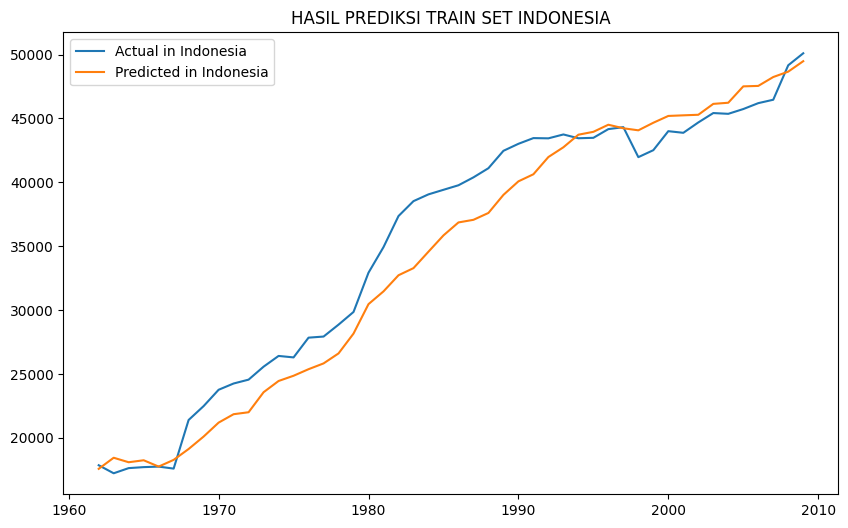

In [ ]:
# Plot
plt.plot(train_data['ID Rice Yields'].index, train_data['ID Rice Yields'].values, label='Actual in Indonesia')
plt.plot(train_data['ID Rice Yields'].index, final_train_predictions_id, label='Predicted in Indonesia')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET INDONESIA')
plt.show()

In [ ]:
base_value3 = df_merged['ID Rice Yields'].iloc[0]
final_predictions_id = prediction_all_id.cumsum() + base_value3

In [ ]:
final_predictions_id = final_predictions_id.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_id)

1962-01-01    17573.263832
1963-01-01    18442.171582
1964-01-01    18089.882509
1965-01-01    18244.329191
1966-01-01    17749.311149
1967-01-01    18274.954378
1968-01-01    19126.687276
1969-01-01    20101.795498
1970-01-01    21191.748562
1971-01-01    21850.308773
1972-01-01    22003.751030
1973-01-01    23572.902907
1974-01-01    24450.797916
1975-01-01    24860.322535
1976-01-01    25373.914540
1977-01-01    25826.929368
1978-01-01    26609.953103
1979-01-01    28161.802048
1980-01-01    30467.340698
1981-01-01    31467.497478
1982-01-01    32727.992846
1983-01-01    33285.796581
1984-01-01    34572.467546
1985-01-01    35849.639929
1986-01-01    36863.018468
1987-01-01    37067.861606
1988-01-01    37604.504518
1989-01-01    39021.724160
1990-01-01    40079.103775
1991-01-01    40633.626996
1992-01-01    41983.034924
1993-01-01    42747.336772
1994-01-01    43731.073402
1995-01-01    43955.630665
1996-01-01    44511.194941
1997-01-01    44234.495175
1998-01-01    44073.809740
1

In [ ]:
df_merged['ID Rice Yields'] = df_merged['ID Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['ID Rice Yields'])

Year
1962-01-01    17855.0
1963-01-01    17226.0
1964-01-01    17630.0
1965-01-01    17708.0
1966-01-01    17748.0
1967-01-01    17592.0
1968-01-01    21398.0
1969-01-01    22487.0
1970-01-01    23763.0
1971-01-01    24254.0
1972-01-01    24556.0
1973-01-01    25572.0
1974-01-01    26412.0
1975-01-01    26297.0
1976-01-01    27843.0
1977-01-01    27929.0
1978-01-01    28862.0
1979-01-01    29855.0
1980-01-01    32928.0
1981-01-01    34934.0
1982-01-01    37363.0
1983-01-01    38530.0
1984-01-01    39060.0
1985-01-01    39418.0
1986-01-01    39773.0
1987-01-01    40391.0
1988-01-01    41108.0
1989-01-01    42470.0
1990-01-01    43018.0
1991-01-01    43465.0
1992-01-01    43446.0
1993-01-01    43750.0
1994-01-01    43453.0
1995-01-01    43487.0
1996-01-01    44168.0
1997-01-01    44322.0
1998-01-01    41974.0
1999-01-01    42519.0
2000-01-01    44007.0
2001-01-01    43879.0
2002-01-01    44691.0
2003-01-01    45426.0
2004-01-01    45365.0
2005-01-01    45739.0
2006-01-01    46201.0
2007-

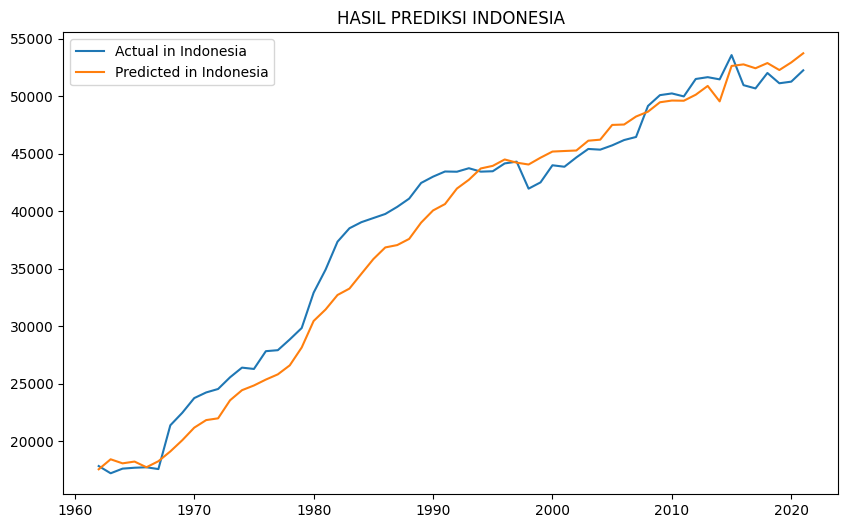

In [ ]:
# Plot
plt.plot(df_merged['ID Rice Yields'].index, df_merged['ID Rice Yields'].values, label='Actual in Indonesia')
plt.plot(df_merged['ID Rice Yields'].index, final_predictions_id, label='Predicted in Indonesia')
plt.legend()
plt.title('HASIL PREDIKSI INDONESIA')
plt.show()

# Eksperimen Malaysia

In [ ]:
print(len(train_MY_X))
print(len(train_MY_y))

print(len(test_MY_X))
print(len(test_MY_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_MY_y,
                     exog= train_MY_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-248.173, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-255.265, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-250.149, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-263.825, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-262.224, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-271.734, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-268.008, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-270.856, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-266.889, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.300 seconds


In [ ]:
best_order_my = step_wise.order
print("Best Order:", best_order_my)

Best Order: (2, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_MY_y, exog=train_MY_X,
                     order=best_order_my)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_my = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_my.summary())

                               SARIMAX Results                                
Dep. Variable:          Diff_malaysia   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 145.464
Date:                Thu, 06 Jul 2023   AIC                           -266.929
Time:                        13:45:44   BIC                           -244.727
Sample:                    01-01-1962   HQIC                          -258.574
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.4566      0.333      1.373      0.170      -0.195       1.108
Diff_filipina      0.2055      0.130      1.586      0.113      -0.048       0.459
Diff_brunei        0.0527      0.052

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_my.aic, 2)
bic = round(result_my.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -266.93
BIC: -244.73


In [ ]:
exog_test = test_MY_X
prediction_test_my = result_my.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_my

2010-01-01   -0.001385
2011-01-01    0.013804
2012-01-01    0.011200
2013-01-01    0.001008
2014-01-01    0.007655
2015-01-01    0.011103
2016-01-01   -0.017307
2017-01-01    0.001877
2018-01-01    0.010054
2019-01-01   -0.001440
2020-01-01    0.004756
2021-01-01    0.009062
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_MY_y

Year
2010-01-01   -0.00844
2011-01-01    0.01107
2012-01-01    0.00504
2013-01-01    0.00791
2014-01-01   -0.08908
2015-01-01    0.10368
2016-01-01   -0.00448
2017-01-01   -0.02279
2018-01-01    0.00208
2019-01-01   -0.02695
2020-01-01    0.01529
2021-01-01    0.00914
Name: Diff_malaysia, dtype: float64

MAE:0.024479


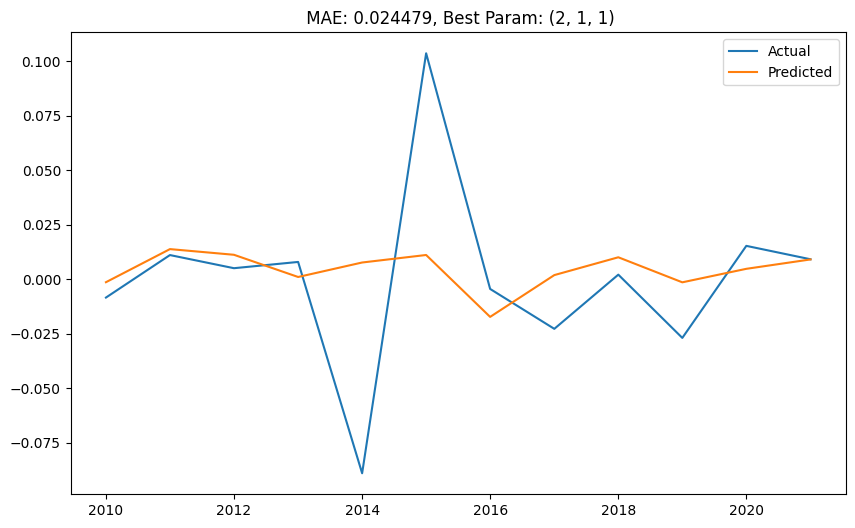

In [ ]:
# Metric
mae = mean_absolute_error(test_MY_y, prediction_test_my)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_MY_y.index, test_MY_y.values, label='Actual')
plt.plot(test_MY_y.index, prediction_test_my, label='Predicted')
plt.legend()
plt.title(label=f" MAE: {mae:.6f}, Best Param: {best_order_my}")
plt.show()

In [ ]:
prediction_train_my = result_my.predict(exog=train_MY_X, start=0, end=len(train_data)-1)

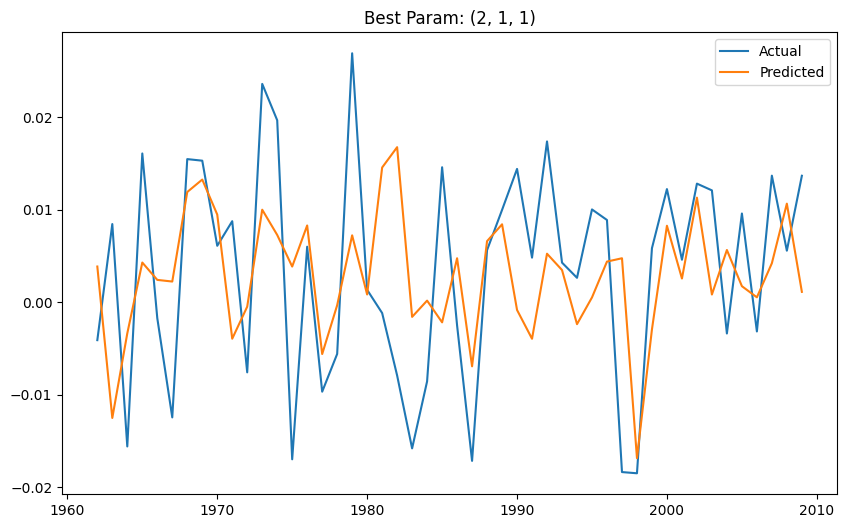

In [ ]:
# Plot
plt.plot(train_MY_y.index, train_MY_y.values, label='Actual')
plt.plot(train_MY_y.index, prediction_train_my, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_my}")
plt.show()

In [ ]:
prediction_all_my = result_my.predict(exog=test_MY_X,start=0, end=len(df_merged)-1)

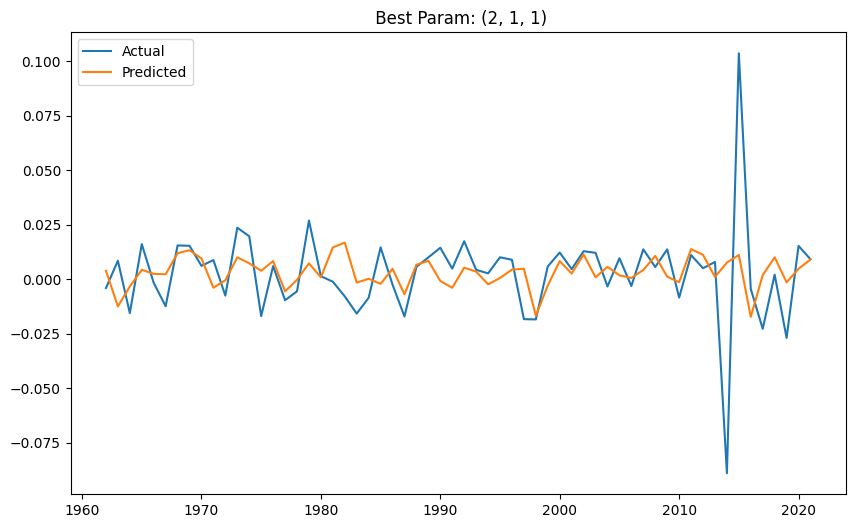

In [ ]:
# Plot
plt.plot(df_merged['Diff_malaysia'].index, df_merged['Diff_malaysia'].values, label='Actual')
plt.plot(df_merged['Diff_malaysia'].index, prediction_all_my, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_my}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['MY Rice Yields'].iloc[0]
final_test_predictions_my = prediction_test_my.cumsum() + base_value

In [ ]:
final_test_predictions_my = final_test_predictions_my.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_my)

2010-01-01    36222.531558
2011-01-01    37602.911241
2012-01-01    38722.890334
2013-01-01    38823.670625
2014-01-01    39589.134281
2015-01-01    40699.441401
2016-01-01    38968.750511
2017-01-01    39156.477014
2018-01-01    40161.871748
2019-01-01    40017.822102
2020-01-01    40493.414456
2021-01-01    41399.581289
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['MY Rice Yields'] = test_data['MY Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['MY Rice Yields'])

Year
2010-01-01    36361.0
2011-01-01    37468.0
2012-01-01    37972.0
2013-01-01    38763.0
2014-01-01    29855.0
2015-01-01    40223.0
2016-01-01    39775.0
2017-01-01    37496.0
2018-01-01    37704.0
2019-01-01    35009.0
2020-01-01    36538.0
2021-01-01    37452.0
Name: MY Rice Yields, dtype: float64


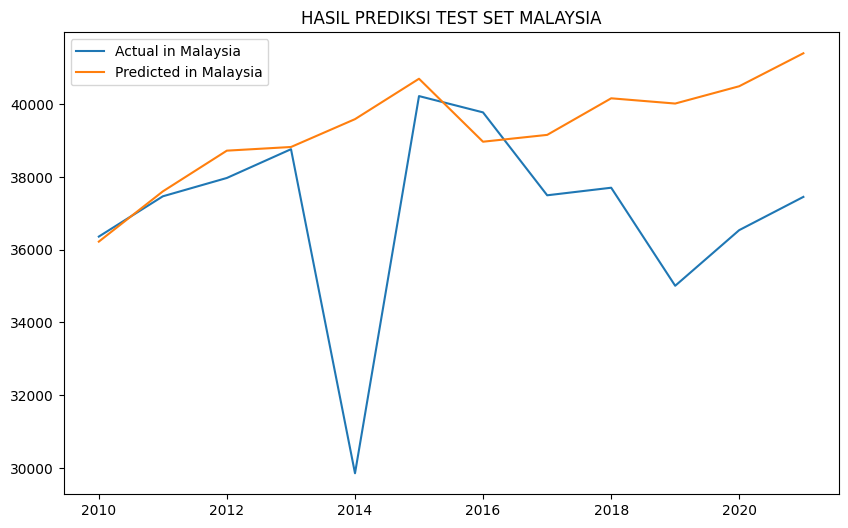

In [ ]:
# Plot
plt.plot(test_data['MY Rice Yields'].index, test_data['MY Rice Yields'].values, label='Actual in Malaysia')
plt.plot(test_data['MY Rice Yields'].index, final_test_predictions_my, label='Predicted in Malaysia')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET MALAYSIA')
plt.show()

In [ ]:
base_value2 = train_data['MY Rice Yields'].iloc[0]
final_train_predictions_my = prediction_train_my.cumsum() + base_value2

In [ ]:
final_train_predictions_my = final_train_predictions_my.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_my)

1962-01-01    21065.958729
1963-01-01    19817.017095
1964-01-01    19482.119153
1965-01-01    19913.035382
1966-01-01    20156.460694
1967-01-01    20382.045358
1968-01-01    21575.393381
1969-01-01    22903.308830
1970-01-01    23852.933517
1971-01-01    23460.489246
1972-01-01    23414.076568
1973-01-01    24416.139252
1974-01-01    25145.405387
1975-01-01    25532.983404
1976-01-01    26364.713203
1977-01-01    25806.503673
1978-01-01    25775.789271
1979-01-01    26500.883560
1980-01-01    26586.499703
1981-01-01    28044.663346
1982-01-01    29722.714223
1983-01-01    29566.352366
1984-01-01    29585.791892
1985-01-01    29370.168379
1986-01-01    29847.751908
1987-01-01    29156.963601
1988-01-01    29818.980820
1989-01-01    30663.324774
1990-01-01    30581.456191
1991-01-01    30188.489508
1992-01-01    30714.960067
1993-01-01    31064.788667
1994-01-01    30829.664246
1995-01-01    30883.551244
1996-01-01    31324.814583
1997-01-01    31802.145508
1998-01-01    30118.932290
1

In [ ]:
train_data['MY Rice Yields'] = train_data['MY Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['MY Rice Yields'])

Year
1962-01-01    20678.0
1963-01-01    21525.0
1964-01-01    19968.0
1965-01-01    21578.0
1966-01-01    21408.0
1967-01-01    20165.0
1968-01-01    21714.0
1969-01-01    23246.0
1970-01-01    23858.0
1971-01-01    24736.0
1972-01-01    23980.0
1973-01-01    26342.0
1974-01-01    28311.0
1975-01-01    26615.0
1976-01-01    27217.0
1977-01-01    26252.0
1978-01-01    25695.0
1979-01-01    28388.0
1980-01-01    28524.0
1981-01-01    28409.0
1982-01-01    27619.0
1983-01-01    26041.0
1984-01-01    25187.0
1985-01-01    26648.0
1986-01-01    26399.0
1987-01-01    24686.0
1988-01-01    25251.0
1989-01-01    26251.0
1990-01-01    27694.0
1991-01-01    28178.0
1992-01-01    29918.0
1993-01-01    30348.0
1994-01-01    30614.0
1995-01-01    31619.0
1996-01-01    32510.0
1997-01-01    30676.0
1998-01-01    28829.0
1999-01-01    29415.0
2000-01-01    30640.0
2001-01-01    31101.0
2002-01-01    32385.0
2003-01-01    33596.0
2004-01-01    33260.0
2005-01-01    34221.0
2006-01-01    33907.0
2007-

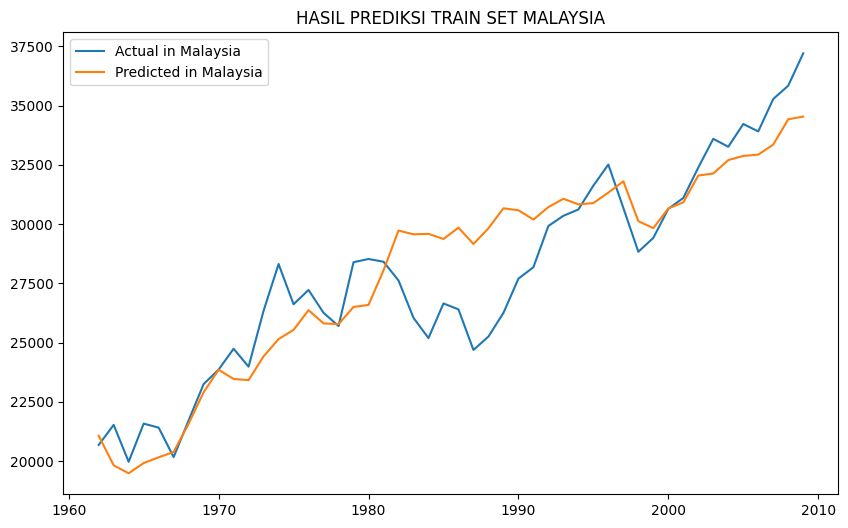

In [ ]:
# Plot
plt.plot(train_data['MY Rice Yields'].index, train_data['MY Rice Yields'].values, label='Actual in Malaysia')
plt.plot(train_data['MY Rice Yields'].index, final_train_predictions_my, label='Predicted in Malaysia')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET MALAYSIA')
plt.show()

In [ ]:
base_value3 = df_merged['MY Rice Yields'].iloc[0]
final_predictions_my = prediction_all_my.cumsum() + base_value3

In [ ]:
final_predictions_my = final_predictions_my.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_my)

1962-01-01    21065.958729
1963-01-01    19817.017095
1964-01-01    19482.119153
1965-01-01    19913.035382
1966-01-01    20156.460694
1967-01-01    20382.045358
1968-01-01    21575.393381
1969-01-01    22903.308830
1970-01-01    23852.933517
1971-01-01    23460.489246
1972-01-01    23414.076568
1973-01-01    24416.139252
1974-01-01    25145.405387
1975-01-01    25532.983404
1976-01-01    26364.713203
1977-01-01    25806.503673
1978-01-01    25775.789271
1979-01-01    26500.883560
1980-01-01    26586.499703
1981-01-01    28044.663346
1982-01-01    29722.714223
1983-01-01    29566.352366
1984-01-01    29585.791892
1985-01-01    29370.168379
1986-01-01    29847.751908
1987-01-01    29156.963601
1988-01-01    29818.980820
1989-01-01    30663.324774
1990-01-01    30581.456191
1991-01-01    30188.489508
1992-01-01    30714.960067
1993-01-01    31064.788667
1994-01-01    30829.664246
1995-01-01    30883.551244
1996-01-01    31324.814583
1997-01-01    31802.145508
1998-01-01    30118.932290
1

In [ ]:
df_merged['MY Rice Yields'] = df_merged['MY Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['MY Rice Yields'])

Year
1962-01-01    20678.0
1963-01-01    21525.0
1964-01-01    19968.0
1965-01-01    21578.0
1966-01-01    21408.0
1967-01-01    20165.0
1968-01-01    21714.0
1969-01-01    23246.0
1970-01-01    23858.0
1971-01-01    24736.0
1972-01-01    23980.0
1973-01-01    26342.0
1974-01-01    28311.0
1975-01-01    26615.0
1976-01-01    27217.0
1977-01-01    26252.0
1978-01-01    25695.0
1979-01-01    28388.0
1980-01-01    28524.0
1981-01-01    28409.0
1982-01-01    27619.0
1983-01-01    26041.0
1984-01-01    25187.0
1985-01-01    26648.0
1986-01-01    26399.0
1987-01-01    24686.0
1988-01-01    25251.0
1989-01-01    26251.0
1990-01-01    27694.0
1991-01-01    28178.0
1992-01-01    29918.0
1993-01-01    30348.0
1994-01-01    30614.0
1995-01-01    31619.0
1996-01-01    32510.0
1997-01-01    30676.0
1998-01-01    28829.0
1999-01-01    29415.0
2000-01-01    30640.0
2001-01-01    31101.0
2002-01-01    32385.0
2003-01-01    33596.0
2004-01-01    33260.0
2005-01-01    34221.0
2006-01-01    33907.0
2007-

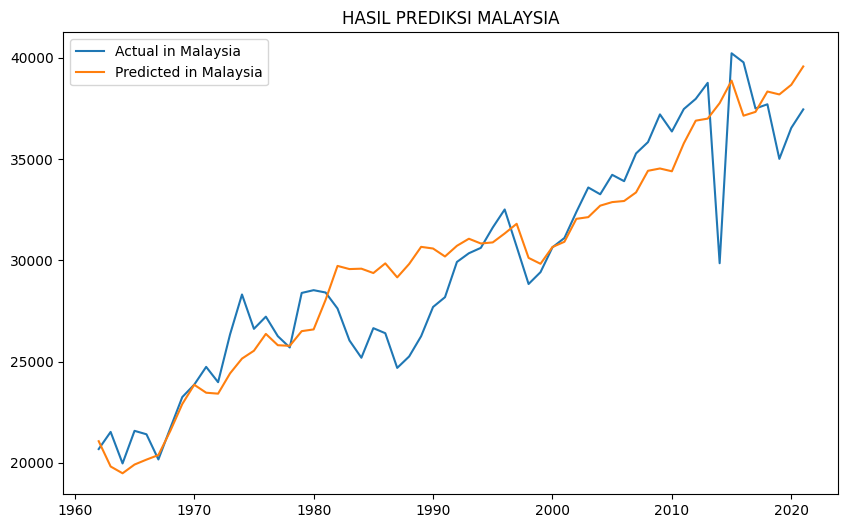

In [ ]:
# Plot
plt.plot(df_merged['MY Rice Yields'].index, df_merged['MY Rice Yields'].values, label='Actual in Malaysia')
plt.plot(df_merged['MY Rice Yields'].index, final_predictions_my, label='Predicted in Malaysia')
plt.legend()
plt.title('HASIL PREDIKSI MALAYSIA')
plt.show()

# Eksperimen Thailand

In [ ]:
print(len(train_TH_X))
print(len(train_TH_y))

print(len(test_TH_X))
print(len(test_TH_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_TH_y,
                     exog= train_TH_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-267.056, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-278.601, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-282.991, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-269.055, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-281.062, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-279.066, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-284.591, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-282.949, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-280.595, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-280.979, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.128 seconds


In [ ]:
best_order_th = step_wise.order
print("Best Order:", best_order_th)

Best Order: (0, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_TH_y, exog=train_TH_X,
                     order=best_order_th)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_th = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_th.summary())

                               SARIMAX Results                                
Dep. Variable:          Diff_thailand   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 150.462
Date:                Thu, 06 Jul 2023   AIC                           -280.925
Time:                        13:45:51   BIC                           -262.423
Sample:                    01-01-1962   HQIC                          -273.962
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.3101      0.204      1.518      0.129      -0.090       0.710
Diff_malaysia     -0.1203      0.139     -0.867      0.386      -0.392       0.152
Diff_brunei       -0.0220      0.038

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_th.aic, 2)
bic = round(result_th.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -280.92
BIC: -262.42


In [ ]:
exog_test = test_TH_X
prediction_test_th = result_th.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_th

2010-01-01    0.006116
2011-01-01    0.002174
2012-01-01    0.012780
2013-01-01    0.004542
2014-01-01    0.018303
2015-01-01   -0.004266
2016-01-01   -0.004750
2017-01-01    0.007094
2018-01-01    0.007966
2019-01-01    0.006214
2020-01-01    0.001228
2021-01-01    0.008912
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_TH_y

Year
2010-01-01    0.00109
2011-01-01   -0.02293
2012-01-01   -0.00221
2013-01-01    0.00418
2014-01-01    0.00534
2015-01-01    0.00254
2016-01-01   -0.00537
2017-01-01    0.00037
2018-01-01    0.00350
2019-01-01   -0.00611
2020-01-01    0.00086
2021-01-01    0.00065
Name: Diff_thailand, dtype: float64

MAE:0.008168


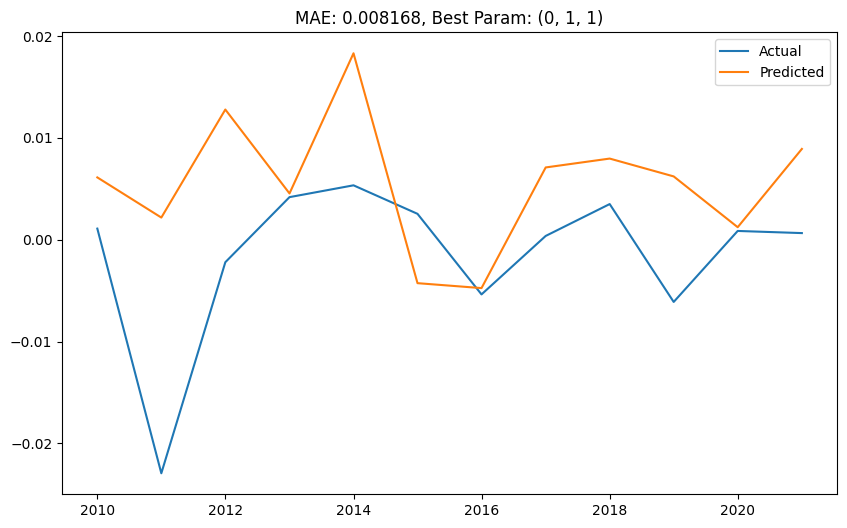

In [ ]:
# Metric
mae = mean_absolute_error(test_TH_y, prediction_test_th)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_TH_y.index, test_TH_y.values, label='Actual')
plt.plot(test_TH_y.index, prediction_test_th, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param: {best_order_th}")
plt.show()

In [ ]:
prediction_train_th = result_th.predict(exog=train_TH_X, start=0, end=len(train_data)-1)

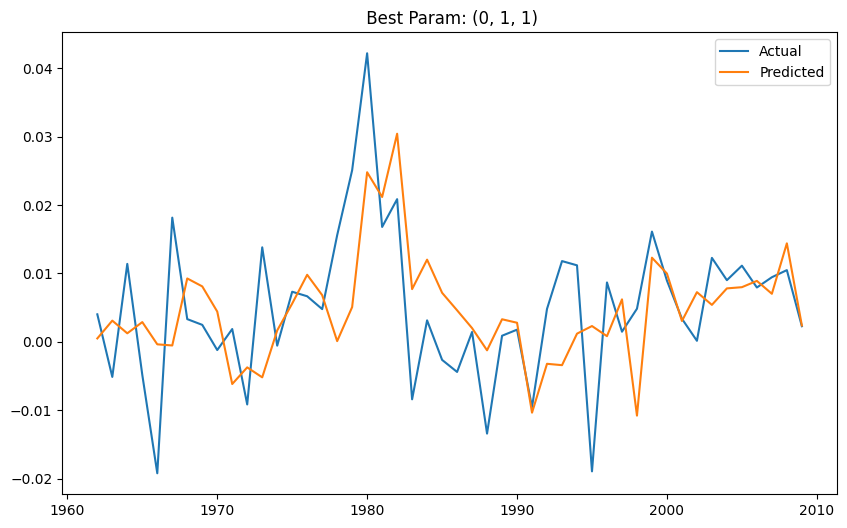

In [ ]:
# Plot
plt.plot(train_TH_y.index, train_TH_y.values, label='Actual')
plt.plot(train_TH_y.index, prediction_train_th, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_th}")
plt.show()

In [ ]:
prediction_all_th = result_th.predict(exog=test_TH_X,start=0, end=len(df_merged)-1)

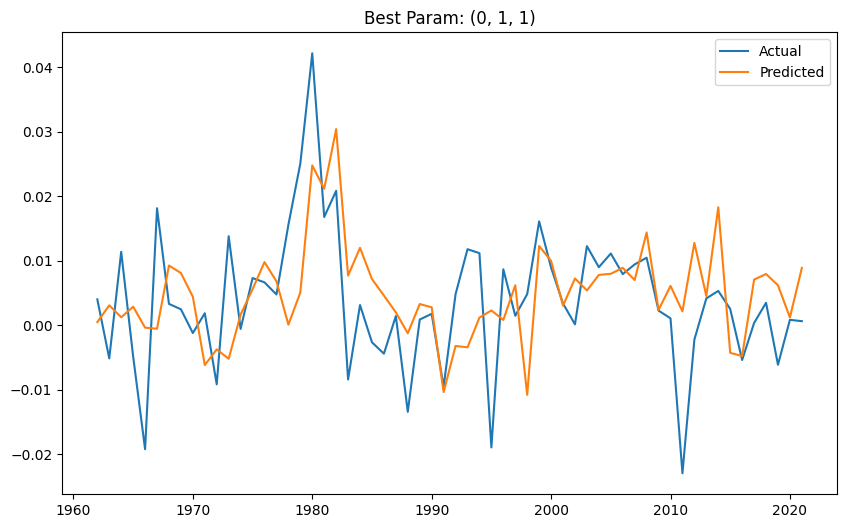

In [ ]:
# Plot
plt.plot(df_merged['Diff_thailand'].index, df_merged['Diff_thailand'].values, label='Actual')
plt.plot(df_merged['Diff_thailand'].index, prediction_all_th, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_th}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['TH Rice Yields'].iloc[0]
final_test_predictions_th = prediction_test_th.cumsum() + base_value

In [ ]:
final_test_predictions_th = final_test_predictions_th.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_th)

2010-01-01    30532.605941
2011-01-01    30750.022029
2012-01-01    32028.057488
2013-01-01    32482.212072
2014-01-01    34312.503537
2015-01-01    33885.910957
2016-01-01    33410.864114
2017-01-01    34120.283610
2018-01-01    34916.859016
2019-01-01    35538.269599
2020-01-01    35661.088133
2021-01-01    36552.278710
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['TH Rice Yields'] = test_data['TH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['TH Rice Yields'])

Year
2010-01-01    29921.0
2011-01-01    31867.0
2012-01-01    31865.0
2013-01-01    31463.0
2014-01-01    30586.0
2015-01-01    28506.0
2016-01-01    29678.0
2017-01-01    30690.0
2018-01-01    30380.0
2019-01-01    29164.0
2020-01-01    29064.0
2021-01-01    29867.0
Name: TH Rice Yields, dtype: float64


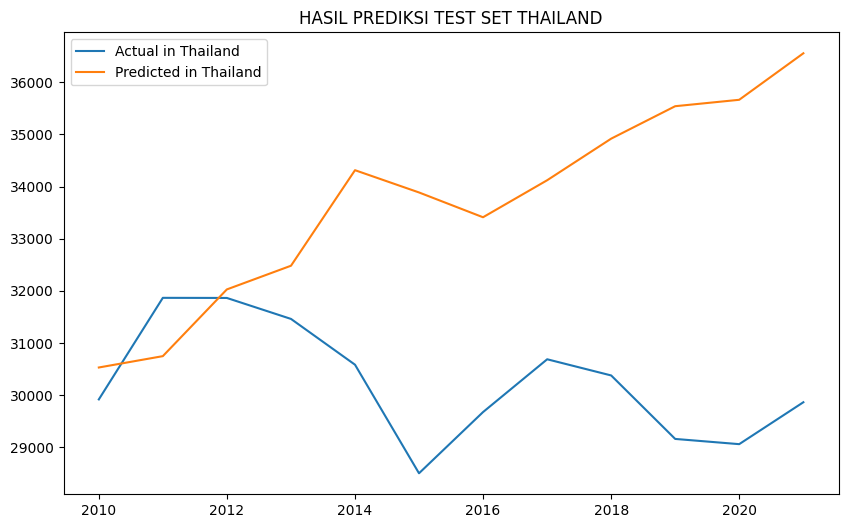

In [ ]:
# Plot
plt.plot(test_data['TH Rice Yields'].index, test_data['TH Rice Yields'].values, label='Actual in Thailand')
plt.plot(test_data['TH Rice Yields'].index, final_test_predictions_th, label='Predicted in Thailand')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET THAILAND')
plt.show()

In [ ]:
base_value2 = train_data['TH Rice Yields'].iloc[0]
final_train_predictions_th = prediction_train_th.cumsum() + base_value2

In [ ]:
final_train_predictions_th = final_train_predictions_th.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_th)

1962-01-01    17252.574377
1963-01-01    17563.413980
1964-01-01    17689.003443
1965-01-01    17978.382982
1966-01-01    17942.962869
1967-01-01    17890.648126
1968-01-01    18817.945072
1969-01-01    19629.041295
1970-01-01    20072.133937
1971-01-01    19456.452270
1972-01-01    19084.053331
1973-01-01    18565.955943
1974-01-01    18733.516332
1975-01-01    19293.774066
1976-01-01    20274.598382
1977-01-01    20957.727209
1978-01-01    20969.014756
1979-01-01    21477.718293
1980-01-01    23957.230915
1981-01-01    26075.029869
1982-01-01    29117.094401
1983-01-01    29888.440404
1984-01-01    31090.439469
1985-01-01    31807.683162
1986-01-01    32269.409580
1987-01-01    32470.890083
1988-01-01    32348.011157
1989-01-01    32678.774858
1990-01-01    32958.608302
1991-01-01    31924.270280
1992-01-01    31604.202087
1993-01-01    31264.151429
1994-01-01    31384.567433
1995-01-01    31616.219639
1996-01-01    31699.986126
1997-01-01    32321.776089
1998-01-01    31244.287366
1

In [ ]:
train_data['TH Rice Yields'] = train_data['TH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['TH Rice Yields'])

Year
1962-01-01    17202.0
1963-01-01    18725.0
1964-01-01    18384.0
1965-01-01    17805.0
1966-01-01    18360.0
1967-01-01    17497.0
1968-01-01    17882.0
1969-01-01    18474.0
1970-01-01    20207.0
1971-01-01    19369.0
1972-01-01    18308.0
1973-01-01    19242.0
1974-01-01    18254.0
1975-01-01    18308.0
1976-01-01    18450.0
1977-01-01    15910.0
1978-01-01    19552.0
1979-01-01    18209.0
1980-01-01    18878.0
1981-01-01    19521.0
1982-01-01    18880.0
1983-01-01    20351.0
1984-01-01    20670.0
1985-01-01    20608.0
1986-01-01    20522.0
1987-01-01    20147.0
1988-01-01    21465.0
1989-01-01    20853.0
1990-01-01    19556.0
1991-01-01    22534.0
1992-01-01    21745.0
1993-01-01    20497.0
1994-01-01    23521.0
1995-01-01    24158.0
1996-01-01    24098.0
1997-01-01    23788.0
1998-01-01    24180.0
1999-01-01    24244.0
2000-01-01    26128.0
2001-01-01    28739.0
2002-01-01    29338.0
2003-01-01    29339.0
2004-01-01    28895.0
2005-01-01    29974.0
2006-01-01    29503.0
2007-

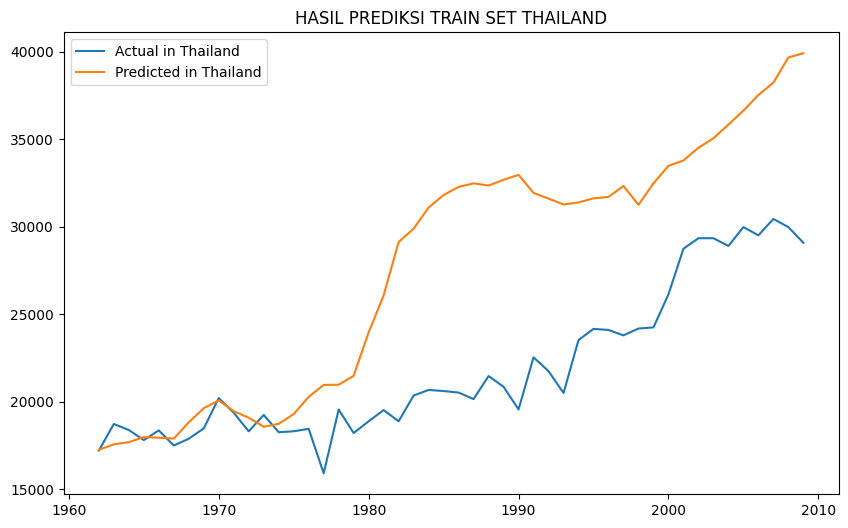

In [ ]:
# Plot
plt.plot(train_data['TH Rice Yields'].index, train_data['TH Rice Yields'].values, label='Actual in Thailand')
plt.plot(train_data['TH Rice Yields'].index, final_train_predictions_th, label='Predicted in Thailand')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET THAILAND')
plt.show()

In [ ]:
base_value3 = df_merged['TH Rice Yields'].iloc[0]
final_predictions_th = prediction_all_th.cumsum() + base_value3

In [ ]:
final_predictions_th = final_predictions_th.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_th)

1962-01-01    17252.574377
1963-01-01    17563.413980
1964-01-01    17689.003443
1965-01-01    17978.382982
1966-01-01    17942.962869
1967-01-01    17890.648126
1968-01-01    18817.945072
1969-01-01    19629.041295
1970-01-01    20072.133937
1971-01-01    19456.452270
1972-01-01    19084.053331
1973-01-01    18565.955943
1974-01-01    18733.516332
1975-01-01    19293.774066
1976-01-01    20274.598382
1977-01-01    20957.727209
1978-01-01    20969.014756
1979-01-01    21477.718293
1980-01-01    23957.230915
1981-01-01    26075.029869
1982-01-01    29117.094401
1983-01-01    29888.440404
1984-01-01    31090.439469
1985-01-01    31807.683162
1986-01-01    32269.409580
1987-01-01    32470.890083
1988-01-01    32348.011157
1989-01-01    32678.774858
1990-01-01    32958.608302
1991-01-01    31924.270280
1992-01-01    31604.202087
1993-01-01    31264.151429
1994-01-01    31384.567433
1995-01-01    31616.219639
1996-01-01    31699.986126
1997-01-01    32321.776089
1998-01-01    31244.287366
1

In [ ]:
df_merged['TH Rice Yields'] = df_merged['TH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['TH Rice Yields'])

Year
1962-01-01    17202.0
1963-01-01    18725.0
1964-01-01    18384.0
1965-01-01    17805.0
1966-01-01    18360.0
1967-01-01    17497.0
1968-01-01    17882.0
1969-01-01    18474.0
1970-01-01    20207.0
1971-01-01    19369.0
1972-01-01    18308.0
1973-01-01    19242.0
1974-01-01    18254.0
1975-01-01    18308.0
1976-01-01    18450.0
1977-01-01    15910.0
1978-01-01    19552.0
1979-01-01    18209.0
1980-01-01    18878.0
1981-01-01    19521.0
1982-01-01    18880.0
1983-01-01    20351.0
1984-01-01    20670.0
1985-01-01    20608.0
1986-01-01    20522.0
1987-01-01    20147.0
1988-01-01    21465.0
1989-01-01    20853.0
1990-01-01    19556.0
1991-01-01    22534.0
1992-01-01    21745.0
1993-01-01    20497.0
1994-01-01    23521.0
1995-01-01    24158.0
1996-01-01    24098.0
1997-01-01    23788.0
1998-01-01    24180.0
1999-01-01    24244.0
2000-01-01    26128.0
2001-01-01    28739.0
2002-01-01    29338.0
2003-01-01    29339.0
2004-01-01    28895.0
2005-01-01    29974.0
2006-01-01    29503.0
2007-

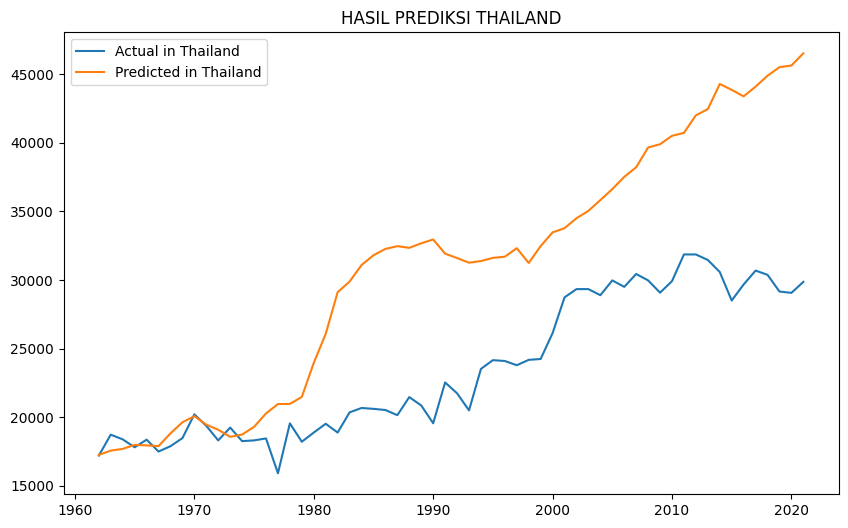

In [ ]:
# Plot
plt.plot(df_merged['TH Rice Yields'].index, df_merged['TH Rice Yields'].values, label='Actual in Thailand')
plt.plot(df_merged['TH Rice Yields'].index, final_predictions_th, label='Predicted in Thailand')
plt.legend()
plt.title('HASIL PREDIKSI THAILAND')
plt.show()

# Eksperimen Filipina

In [ ]:
print(len(train_PH_X))
print(len(train_PH_y))

print(len(test_PH_X))
print(len(test_PH_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_PH_y,
                     exog= train_PH_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-230.993, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-243.545, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-232.970, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-247.217, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-252.795, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-252.829, Time=0.50 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-251.052, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-253.733, Time=1.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-257.892, Time=1.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-259.046, Time=1.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-261.622, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-258.606, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-260.211, Time=1.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : 

In [ ]:
best_order_ph = step_wise.order
print("Best Order:", best_order_ph)

Best Order: (1, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_PH_y, exog=train_PH_X,
                     order=best_order_ph)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_ph = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_ph.summary())

                               SARIMAX Results                                
Dep. Variable:          Diff_filipina   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 139.793
Date:                Thu, 06 Jul 2023   AIC                           -257.587
Time:                        13:46:11   BIC                           -237.235
Sample:                    01-01-1962   HQIC                          -249.928
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.0129      0.195      0.066      0.947      -0.370       0.396
Diff_malaysia      0.2038      0.211      0.967      0.333      -0.209       0.617
Diff_brunei        0.0031      0.054

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_ph.aic, 2)
bic = round(result_ph.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -257.59
BIC: -237.24


In [ ]:
exog_test = test_PH_X
prediction_test_ph = result_ph.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_ph

2010-01-01   -0.002188
2011-01-01   -0.005194
2012-01-01    0.001358
2013-01-01    0.005738
2014-01-01   -0.009841
2015-01-01    0.027289
2016-01-01   -0.004455
2017-01-01   -0.004048
2018-01-01    0.005071
2019-01-01   -0.004701
2020-01-01    0.002406
2021-01-01    0.005236
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_PH_y

Year
2010-01-01    0.00334
2011-01-01    0.00552
2012-01-01    0.01672
2013-01-01    0.00404
2014-01-01    0.01167
2015-01-01   -0.01039
2016-01-01   -0.00290
2017-01-01    0.01371
2018-01-01   -0.00343
2019-01-01    0.00731
2020-01-01    0.00439
2021-01-01    0.00652
Name: Diff_filipina, dtype: float64

MAE:0.011299


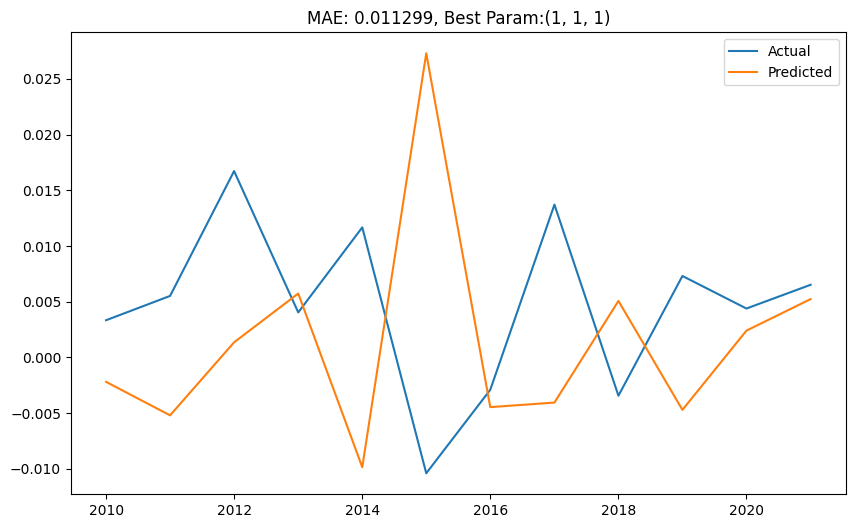

In [ ]:
# Metric
mae = mean_absolute_error(test_PH_y, prediction_test_ph)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_PH_y.index, test_PH_y.values, label='Actual')
plt.plot(test_PH_y.index, prediction_test_ph, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param:{best_order_ph}")
plt.show()

In [ ]:
prediction_train_ph = result_ph.predict(exog=train_PH_X, start=0, end=len(train_data)-1)

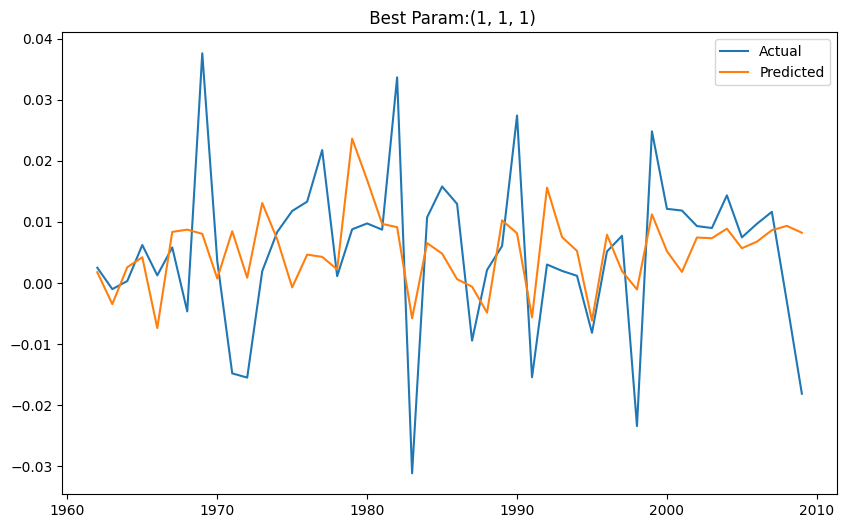

In [ ]:
# Plot
plt.plot(train_PH_y.index, train_PH_y.values, label='Actual')
plt.plot(train_PH_y.index, prediction_train_ph, label='Predicted')
plt.legend()
plt.title(label=f" Best Param:{best_order_ph}")
plt.show()

In [ ]:
prediction_all_ph = result_ph.predict(exog=test_PH_X, start=0, end=len(df_merged)-1)

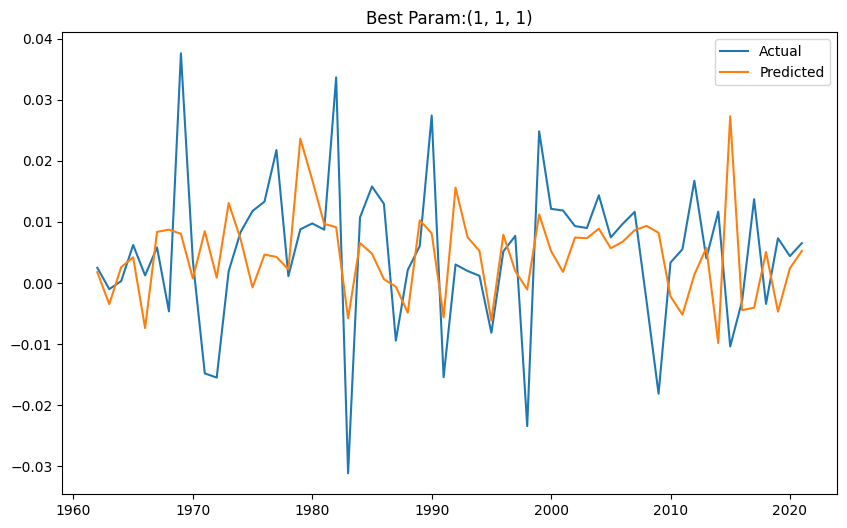

In [ ]:
# Plot
plt.plot(df_merged['Diff_filipina'].index, df_merged['Diff_filipina'].values, label='Actual')
plt.plot(df_merged['Diff_filipina'].index, prediction_all_ph, label='Predicted')
plt.legend()
plt.title(label=f"Best Param:{best_order_ph}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['PH Rice Yields'].iloc[0]
final_test_predictions_ph = prediction_test_ph.cumsum() + base_value

In [ ]:
final_test_predictions_ph

2010-01-01    0.360052
2011-01-01    0.354858
2012-01-01    0.356216
2013-01-01    0.361954
2014-01-01    0.352113
2015-01-01    0.379401
2016-01-01    0.374946
2017-01-01    0.370898
2018-01-01    0.375970
2019-01-01    0.371268
2020-01-01    0.373674
2021-01-01    0.378911
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
final_test_predictions_ph = final_test_predictions_ph.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_ph)

2010-01-01    36005.208412
2011-01-01    35485.814968
2012-01-01    35621.609515
2013-01-01    36195.386097
2014-01-01    35211.253667
2015-01-01    37940.107846
2016-01-01    37494.637261
2017-01-01    37089.819674
2018-01-01    37596.957294
2019-01-01    37126.816292
2020-01-01    37367.417055
2021-01-01    37891.056273
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['PH Rice Yields']

Year
2010-01-01    0.36224
2011-01-01    0.36776
2012-01-01    0.38448
2013-01-01    0.38852
2014-01-01    0.40019
2015-01-01    0.38980
2016-01-01    0.38690
2017-01-01    0.40061
2018-01-01    0.39718
2019-01-01    0.40449
2020-01-01    0.40888
2021-01-01    0.41540
Name: PH Rice Yields, dtype: float64

In [ ]:
test_data['PH Rice Yields'] = test_data['PH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['PH Rice Yields'])

Year
2010-01-01    36224.0
2011-01-01    36776.0
2012-01-01    38448.0
2013-01-01    38852.0
2014-01-01    40019.0
2015-01-01    38980.0
2016-01-01    38690.0
2017-01-01    40061.0
2018-01-01    39718.0
2019-01-01    40449.0
2020-01-01    40888.0
2021-01-01    41540.0
Name: PH Rice Yields, dtype: float64


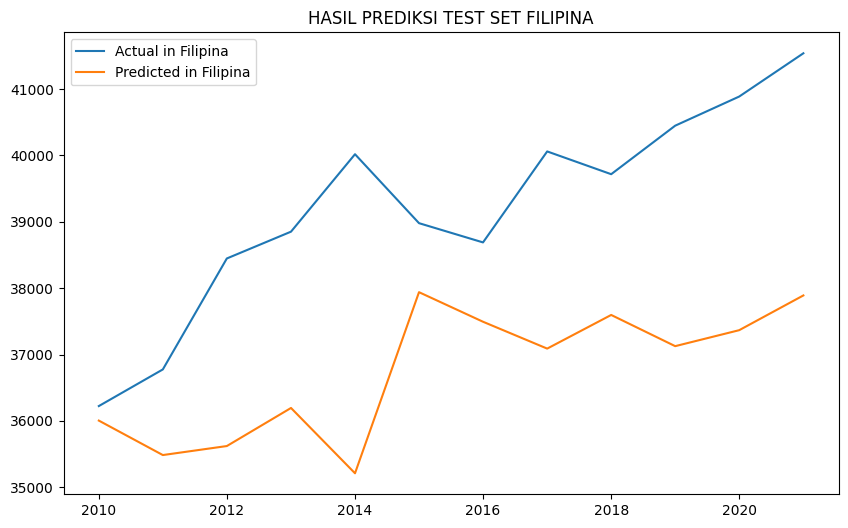

In [ ]:
# Plot
plt.plot(test_data['PH Rice Yields'].index, test_data['PH Rice Yields'].values, label='Actual in Filipina')
plt.plot(test_data['PH Rice Yields'].index, final_test_predictions_ph, label='Predicted in Filipina')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET FILIPINA')
plt.show()

In [ ]:
base_value2 = train_data['PH Rice Yields'].iloc[0]
final_train_predictions_ph = prediction_train_ph.cumsum() + base_value2

In [ ]:
final_train_predictions_ph = final_train_predictions_ph.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_ph)

1962-01-01    12723.203985
1963-01-01    12376.324402
1964-01-01    12633.968541
1965-01-01    13054.345994
1966-01-01    12316.288756
1967-01-01    13151.776597
1968-01-01    14024.366141
1969-01-01    14828.271130
1970-01-01    14902.130244
1971-01-01    15749.223989
1972-01-01    15834.734808
1973-01-01    17142.873838
1974-01-01    17858.529039
1975-01-01    17785.629083
1976-01-01    18249.550287
1977-01-01    18676.085281
1978-01-01    18897.465656
1979-01-01    21258.649026
1980-01-01    22944.114811
1981-01-01    23911.076478
1982-01-01    24823.567816
1983-01-01    24243.661829
1984-01-01    24896.437007
1985-01-01    25376.184288
1986-01-01    25437.802405
1987-01-01    25376.509159
1988-01-01    24890.578745
1989-01-01    25915.772266
1990-01-01    26727.907916
1991-01-01    26163.645729
1992-01-01    27723.838364
1993-01-01    28474.717034
1994-01-01    28998.629288
1995-01-01    28381.753743
1996-01-01    29170.904788
1997-01-01    29365.688921
1998-01-01    29259.169122
1

In [ ]:
train_data['PH Rice Yields'] = train_data['PH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['PH Rice Yields'])

Year
1962-01-01    12548.0
1963-01-01    12447.0
1964-01-01    12478.0
1965-01-01    13099.0
1966-01-01    13223.0
1967-01-01    13804.0
1968-01-01    13339.0
1969-01-01    17098.0
1970-01-01    17460.0
1971-01-01    15980.0
1972-01-01    14431.0
1973-01-01    14624.0
1974-01-01    15458.0
1975-01-01    16636.0
1976-01-01    17967.0
1977-01-01    20142.0
1978-01-01    20253.0
1979-01-01    21131.0
1980-01-01    22105.0
1981-01-01    22977.0
1982-01-01    26342.0
1983-01-01    23227.0
1984-01-01    24300.0
1985-01-01    25879.0
1986-01-01    27173.0
1987-01-01    26229.0
1988-01-01    26442.0
1989-01-01    27046.0
1990-01-01    29786.0
1991-01-01    28243.0
1992-01-01    28545.0
1993-01-01    28742.0
1994-01-01    28859.0
1995-01-01    28043.0
1996-01-01    28558.0
1997-01-01    29329.0
1998-01-01    26986.0
1999-01-01    29468.0
2000-01-01    30681.0
2001-01-01    31866.0
2002-01-01    32797.0
2003-01-01    33696.0
2004-01-01    35130.0
2005-01-01    35876.0
2006-01-01    36844.0
2007-

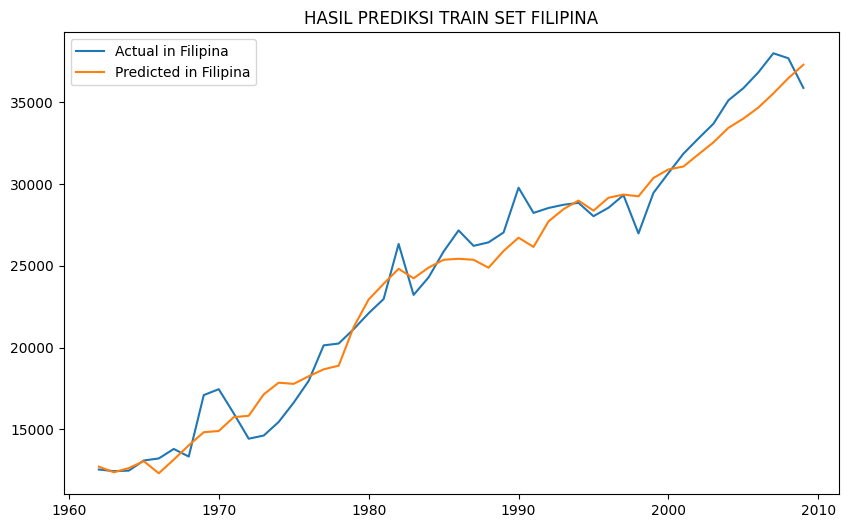

In [ ]:
# Plot
plt.plot(train_data['PH Rice Yields'].index, train_data['PH Rice Yields'].values, label='Actual in Filipina')
plt.plot(train_data['PH Rice Yields'].index, final_train_predictions_ph, label='Predicted in Filipina')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET FILIPINA')
plt.show()

In [ ]:
base_value3 = df_merged['PH Rice Yields'].iloc[0]
final_predictions_ph = prediction_all_ph.cumsum() + base_value3

In [ ]:
final_predictions_ph = final_predictions_ph.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_ph)

1962-01-01    12723.203985
1963-01-01    12376.324402
1964-01-01    12633.968541
1965-01-01    13054.345994
1966-01-01    12316.288756
1967-01-01    13151.776597
1968-01-01    14024.366141
1969-01-01    14828.271130
1970-01-01    14902.130244
1971-01-01    15749.223989
1972-01-01    15834.734808
1973-01-01    17142.873838
1974-01-01    17858.529039
1975-01-01    17785.629083
1976-01-01    18249.550287
1977-01-01    18676.085281
1978-01-01    18897.465656
1979-01-01    21258.649026
1980-01-01    22944.114811
1981-01-01    23911.076478
1982-01-01    24823.567816
1983-01-01    24243.661829
1984-01-01    24896.437007
1985-01-01    25376.184288
1986-01-01    25437.802405
1987-01-01    25376.509159
1988-01-01    24890.578745
1989-01-01    25915.772266
1990-01-01    26727.907916
1991-01-01    26163.645729
1992-01-01    27723.838364
1993-01-01    28474.717034
1994-01-01    28998.629288
1995-01-01    28381.753743
1996-01-01    29170.904788
1997-01-01    29365.688921
1998-01-01    29259.169122
1

In [ ]:
df_merged['PH Rice Yields'] = df_merged['PH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['PH Rice Yields'])

Year
1962-01-01    12548.0
1963-01-01    12447.0
1964-01-01    12478.0
1965-01-01    13099.0
1966-01-01    13223.0
1967-01-01    13804.0
1968-01-01    13339.0
1969-01-01    17098.0
1970-01-01    17460.0
1971-01-01    15980.0
1972-01-01    14431.0
1973-01-01    14624.0
1974-01-01    15458.0
1975-01-01    16636.0
1976-01-01    17967.0
1977-01-01    20142.0
1978-01-01    20253.0
1979-01-01    21131.0
1980-01-01    22105.0
1981-01-01    22977.0
1982-01-01    26342.0
1983-01-01    23227.0
1984-01-01    24300.0
1985-01-01    25879.0
1986-01-01    27173.0
1987-01-01    26229.0
1988-01-01    26442.0
1989-01-01    27046.0
1990-01-01    29786.0
1991-01-01    28243.0
1992-01-01    28545.0
1993-01-01    28742.0
1994-01-01    28859.0
1995-01-01    28043.0
1996-01-01    28558.0
1997-01-01    29329.0
1998-01-01    26986.0
1999-01-01    29468.0
2000-01-01    30681.0
2001-01-01    31866.0
2002-01-01    32797.0
2003-01-01    33696.0
2004-01-01    35130.0
2005-01-01    35876.0
2006-01-01    36844.0
2007-

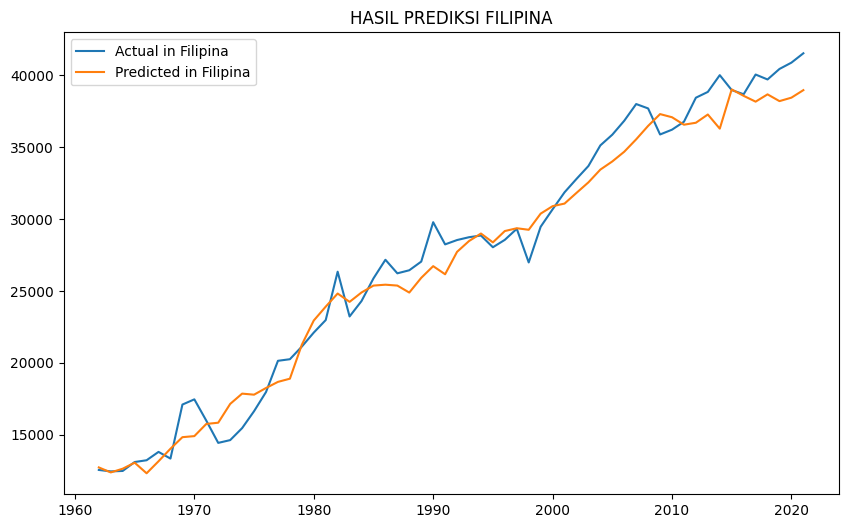

In [ ]:
# Plot
plt.plot(df_merged['PH Rice Yields'].index, df_merged['PH Rice Yields'].values, label='Actual in Filipina')
plt.plot(df_merged['PH Rice Yields'].index, final_predictions_ph, label='Predicted in Filipina')
plt.legend()
plt.title('HASIL PREDIKSI FILIPINA')
plt.show()

# Eksperimen Vietnam

In [ ]:
print(len(train_VN_X))
print(len(train_VN_y))

print(len(test_VN_X))
print(len(test_VN_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_VN_y,
                     exog= train_VN_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-232.119, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-239.808, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-234.115, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-249.569, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-250.205, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-248.421, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-256.960, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-259.849, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-256.378, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-253.588, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-258.379, Time=0.28 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
T

In [ ]:
best_order_vn = step_wise.order
print("Best Order:", best_order_vn)

Best Order: (2, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_VN_y, exog=train_VN_X,
                     order=best_order_vn)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_vn = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_vn.summary())

                               SARIMAX Results                                
Dep. Variable:           Diff_vietnam   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 135.700
Date:                Thu, 06 Jul 2023   AIC                           -247.399
Time:                        13:47:28   BIC                           -225.197
Sample:                    01-01-1962   HQIC                          -239.044
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia    -0.0593      0.199     -0.298      0.766      -0.449       0.331
Diff_malaysia      0.2055      0.232      0.887      0.375      -0.249       0.660
Diff_brunei        0.0788      0.062

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_vn.aic, 2)
bic = round(result_vn.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -247.4
BIC: -225.2


In [ ]:
exog_test = test_VN_X
prediction_test_vn = result_vn.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_vn

2010-01-01   -0.000116
2011-01-01    0.012737
2012-01-01    0.008751
2013-01-01    0.010157
2014-01-01   -0.002134
2015-01-01    0.032470
2016-01-01    0.002432
2017-01-01    0.004146
2018-01-01    0.009531
2019-01-01    0.000227
2020-01-01    0.014373
2021-01-01    0.011781
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_VN_y

Year
2010-01-01    0.01044
2011-01-01    0.01967
2012-01-01    0.00970
2013-01-01   -0.00627
2014-01-01    0.01812
2015-01-01    0.00059
2016-01-01   -0.01859
2017-01-01   -0.00262
2018-01-01    0.02704
2019-01-01    0.00191
2020-01-01    0.00841
2021-01-01    0.01528
Name: Diff_vietnam, dtype: float64

MAE:0.011954


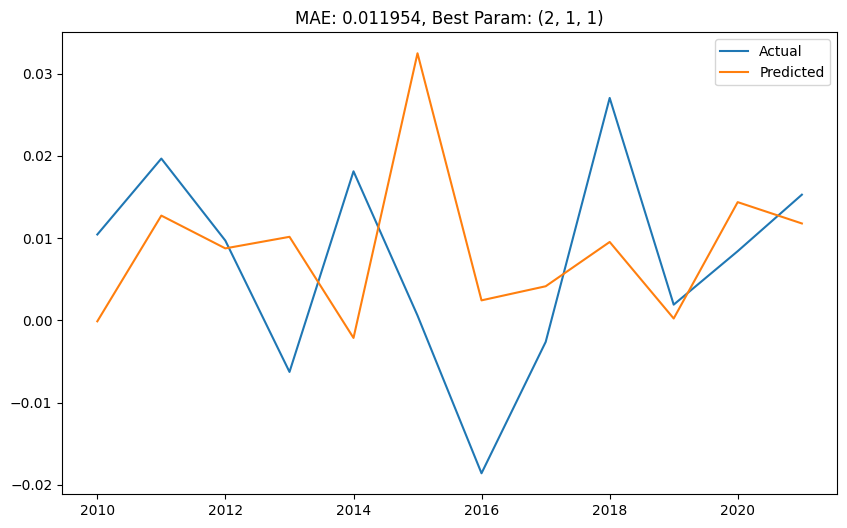

In [ ]:
# Metric
mae = mean_absolute_error(test_VN_y, prediction_test_vn)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_VN_y.index, test_VN_y.values, label='Actual')
plt.plot(test_VN_y.index, prediction_test_vn, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param: {best_order_vn}")
plt.show()

In [ ]:
prediction_train_vn = result_vn.predict(exog=train_VN_X, start=0, end=len(train_data)-1)

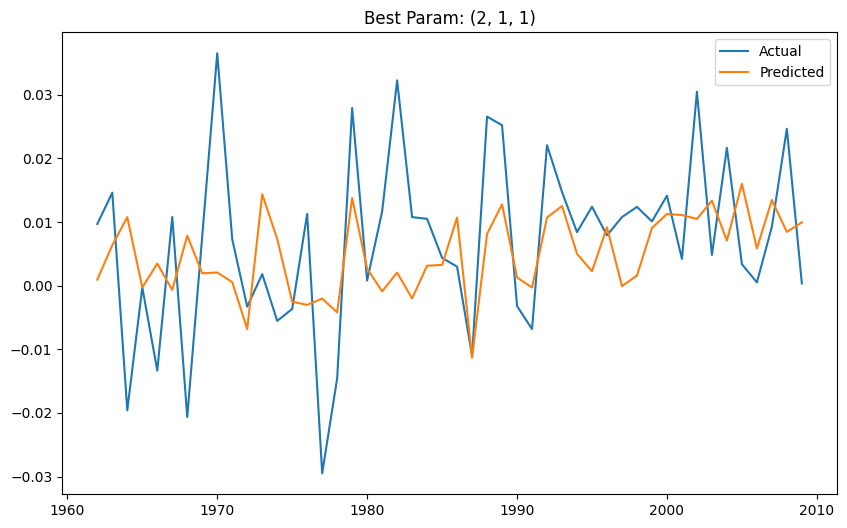

In [ ]:
# Plot
plt.plot(train_VN_y.index, train_VN_y.values, label='Actual')
plt.plot(train_VN_y.index, prediction_train_vn, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_vn}")
plt.show()

In [ ]:
prediction_all_vn = result_vn.predict(exog=test_VN_X,start=0, end=len(df_merged)-1)

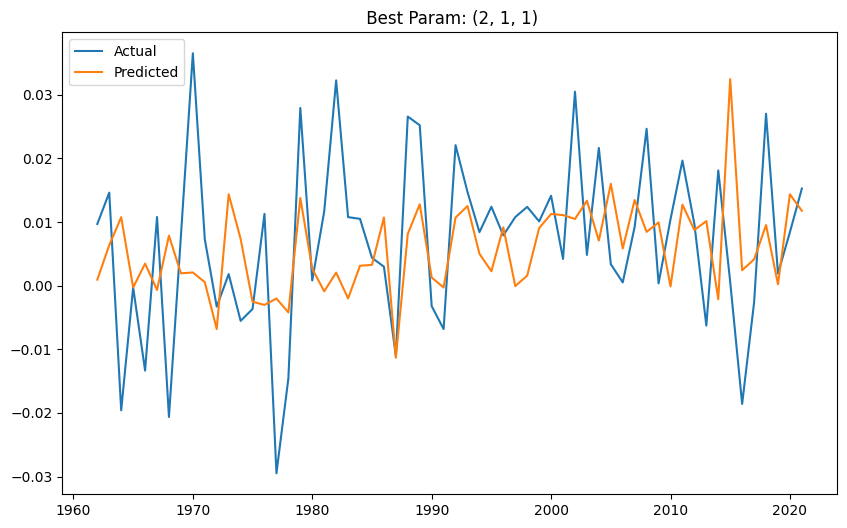

In [ ]:
# Plot
plt.plot(df_merged['Diff_vietnam'].index, df_merged['Diff_vietnam'].values, label='Actual')
plt.plot(df_merged['Diff_vietnam'].index, prediction_all_vn, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_vn}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['VN Rice Yields'].iloc[0]
final_test_predictions_vn = prediction_test_vn.cumsum() + base_value

In [ ]:
final_test_predictions_vn = final_test_predictions_vn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_vn)

2010-01-01    53404.401764
2011-01-01    54678.074521
2012-01-01    55553.223769
2013-01-01    56568.915544
2014-01-01    56355.470570
2015-01-01    59602.491351
2016-01-01    59845.721975
2017-01-01    60260.300022
2018-01-01    61213.386840
2019-01-01    61236.093491
2020-01-01    62673.437269
2021-01-01    63851.508885
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['VN Rice Yields'] = test_data['VN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['VN Rice Yields'])

Year
2010-01-01    53416.0
2011-01-01    55383.0
2012-01-01    56353.0
2013-01-01    55726.0
2014-01-01    57538.0
2015-01-01    57597.0
2016-01-01    55738.0
2017-01-01    55476.0
2018-01-01    58180.0
2019-01-01    58371.0
2020-01-01    59212.0
2021-01-01    60740.0
Name: VN Rice Yields, dtype: float64


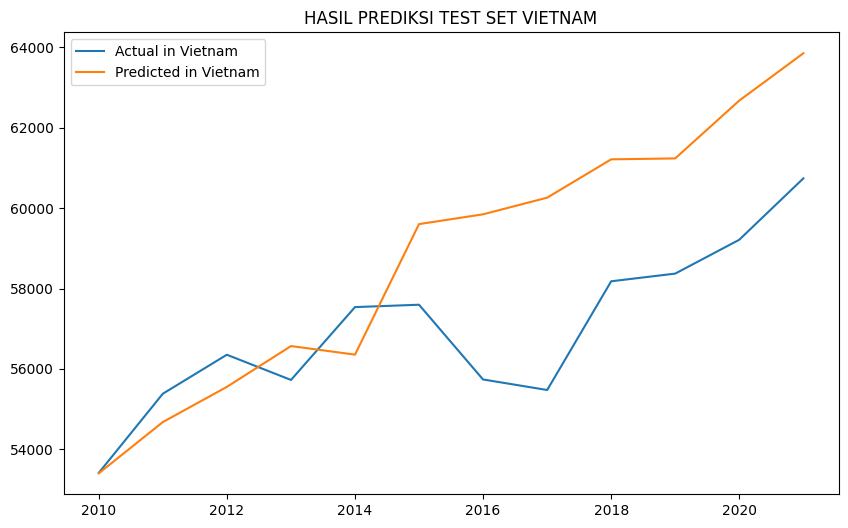

In [ ]:
# Plot
plt.plot(test_data['VN Rice Yields'].index, test_data['VN Rice Yields'].values, label='Actual in Vietnam')
plt.plot(test_data['VN Rice Yields'].index, final_test_predictions_vn, label='Predicted in Vietnam')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET VIETNAM')
plt.show()

In [ ]:
base_value2 = train_data['VN Rice Yields'].iloc[0]
final_train_predictions_vn = prediction_train_vn.cumsum() + base_value2

In [ ]:
train_data['VN Rice Yields'] = train_data['VN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['VN Rice Yields'])

Year
1962-01-01    19937.0
1963-01-01    21400.0
1964-01-01    19441.0
1965-01-01    19414.0
1966-01-01    18079.0
1967-01-01    19159.0
1968-01-01    17095.0
1969-01-01    17880.0
1970-01-01    21534.0
1971-01-01    22265.0
1972-01-01    21935.0
1973-01-01    22117.0
1974-01-01    21564.0
1975-01-01    21198.0
1976-01-01    22327.0
1977-01-01    19378.0
1978-01-01    17922.0
1979-01-01    20716.0
1980-01-01    20798.0
1981-01-01    21966.0
1982-01-01    25194.0
1983-01-01    26272.0
1984-01-01    27323.0
1985-01-01    27761.0
1986-01-01    28060.0
1987-01-01    26954.0
1988-01-01    29613.0
1989-01-01    32136.0
1990-01-01    31815.0
1991-01-01    31133.0
1992-01-01    33342.0
1993-01-01    34815.0
1994-01-01    35657.0
1995-01-01    36898.0
1996-01-01    37689.0
1997-01-01    38768.0
1998-01-01    40007.0
1999-01-01    41018.0
2000-01-01    42432.0
2001-01-01    42853.0
2002-01-01    45903.0
2003-01-01    46387.0
2004-01-01    48553.0
2005-01-01    48891.0
2006-01-01    48943.0
2007-

In [ ]:
final_train_predictions_vn = final_train_predictions_vn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_vn)

1962-01-01    20032.534064
1963-01-01    20670.019318
1964-01-01    21747.164926
1965-01-01    21719.211516
1966-01-01    22066.811684
1967-01-01    22000.259259
1968-01-01    22787.140731
1969-01-01    22981.941178
1970-01-01    23189.598862
1971-01-01    23245.641092
1972-01-01    22564.641528
1973-01-01    24001.964115
1974-01-01    24738.269500
1975-01-01    24486.428154
1976-01-01    24184.127649
1977-01-01    23982.579580
1978-01-01    23562.116347
1979-01-01    24940.684096
1980-01-01    25207.463282
1981-01-01    25119.076970
1982-01-01    25324.814769
1983-01-01    25124.125317
1984-01-01    25437.920061
1985-01-01    25765.255082
1986-01-01    26836.975762
1987-01-01    25703.755007
1988-01-01    26518.048940
1989-01-01    27797.502743
1990-01-01    27926.172949
1991-01-01    27897.728432
1992-01-01    28968.156167
1993-01-01    30220.593069
1994-01-01    30722.277754
1995-01-01    30949.383561
1996-01-01    31867.077505
1997-01-01    31860.130372
1998-01-01    32019.536935
1

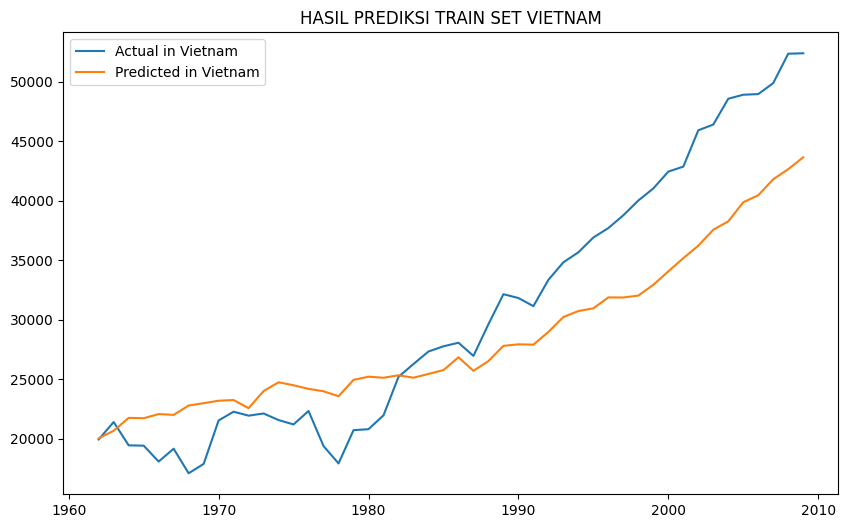

In [ ]:
# Plot
plt.plot(train_data['VN Rice Yields'].index, train_data['VN Rice Yields'].values, label='Actual in Vietnam')
plt.plot(train_data['VN Rice Yields'].index, final_train_predictions_vn, label='Predicted in Vietnam')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET VIETNAM')
plt.show()

In [ ]:
base_value3 = df_merged['VN Rice Yields'].iloc[0]
final_predictions_vn = prediction_all_vn.cumsum() + base_value3

In [ ]:
final_predictions_vn = final_predictions_vn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_vn)

1962-01-01    20032.534064
1963-01-01    20670.019318
1964-01-01    21747.164926
1965-01-01    21719.211516
1966-01-01    22066.811684
1967-01-01    22000.259259
1968-01-01    22787.140731
1969-01-01    22981.941178
1970-01-01    23189.598862
1971-01-01    23245.641092
1972-01-01    22564.641528
1973-01-01    24001.964115
1974-01-01    24738.269500
1975-01-01    24486.428154
1976-01-01    24184.127649
1977-01-01    23982.579580
1978-01-01    23562.116347
1979-01-01    24940.684096
1980-01-01    25207.463282
1981-01-01    25119.076970
1982-01-01    25324.814769
1983-01-01    25124.125317
1984-01-01    25437.920061
1985-01-01    25765.255082
1986-01-01    26836.975762
1987-01-01    25703.755007
1988-01-01    26518.048940
1989-01-01    27797.502743
1990-01-01    27926.172949
1991-01-01    27897.728432
1992-01-01    28968.156167
1993-01-01    30220.593069
1994-01-01    30722.277754
1995-01-01    30949.383561
1996-01-01    31867.077505
1997-01-01    31860.130372
1998-01-01    32019.536935
1

In [ ]:
df_merged['VN Rice Yields'] = df_merged['VN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['VN Rice Yields'])

Year
1962-01-01    19937.0
1963-01-01    21400.0
1964-01-01    19441.0
1965-01-01    19414.0
1966-01-01    18079.0
1967-01-01    19159.0
1968-01-01    17095.0
1969-01-01    17880.0
1970-01-01    21534.0
1971-01-01    22265.0
1972-01-01    21935.0
1973-01-01    22117.0
1974-01-01    21564.0
1975-01-01    21198.0
1976-01-01    22327.0
1977-01-01    19378.0
1978-01-01    17922.0
1979-01-01    20716.0
1980-01-01    20798.0
1981-01-01    21966.0
1982-01-01    25194.0
1983-01-01    26272.0
1984-01-01    27323.0
1985-01-01    27761.0
1986-01-01    28060.0
1987-01-01    26954.0
1988-01-01    29613.0
1989-01-01    32136.0
1990-01-01    31815.0
1991-01-01    31133.0
1992-01-01    33342.0
1993-01-01    34815.0
1994-01-01    35657.0
1995-01-01    36898.0
1996-01-01    37689.0
1997-01-01    38768.0
1998-01-01    40007.0
1999-01-01    41018.0
2000-01-01    42432.0
2001-01-01    42853.0
2002-01-01    45903.0
2003-01-01    46387.0
2004-01-01    48553.0
2005-01-01    48891.0
2006-01-01    48943.0
2007-

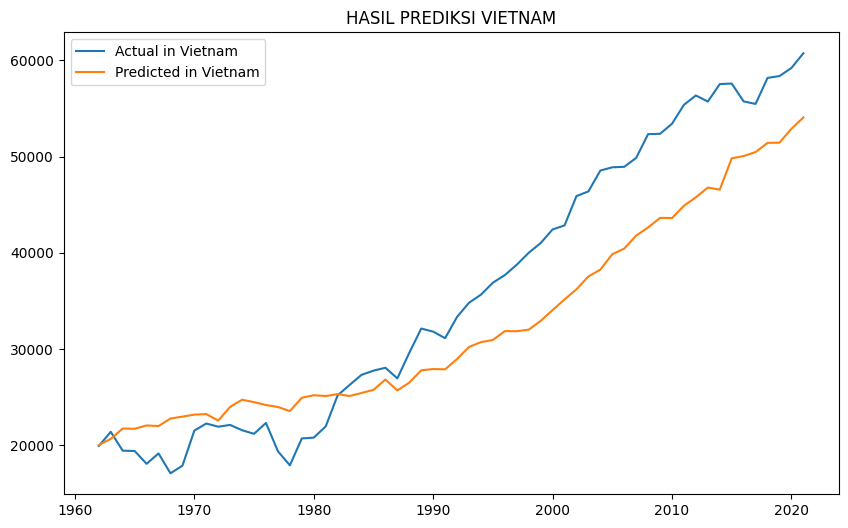

In [ ]:
# Plot
plt.plot(df_merged['VN Rice Yields'].index, df_merged['VN Rice Yields'].values, label='Actual in Vietnam')
plt.plot(df_merged['VN Rice Yields'].index, final_predictions_vn, label='Predicted in Vietnam')
plt.legend()
plt.title('HASIL PREDIKSI VIETNAM')
plt.show()

# Eksperimen Brunei

In [ ]:
print(len(train_BN_X))
print(len(train_BN_y))

print(len(test_BN_X))
print(len(test_BN_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_BN_y,
                     exog= train_BN_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-110.455, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-130.781, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-149.711, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-112.451, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.117 seconds


In [ ]:
best_order_bn = step_wise.order
print("Best Order:", best_order_bn)

Best Order: (0, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_BN_y, exog=train_BN_X,
                     order=best_order_bn)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_bn = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_bn.summary())

                               SARIMAX Results                                
Dep. Variable:            Diff_brunei   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  83.549
Date:                Thu, 06 Jul 2023   AIC                           -147.099
Time:                        13:49:00   BIC                           -128.597
Sample:                    01-01-1962   HQIC                          -140.136
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.3211      1.080      0.297      0.766      -1.796       2.439
Diff_filipina      0.0027      0.617      0.004      0.997      -1.206       1.211
Diff_malaysia      0.6075      0.685

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_bn.aic, 2)
bic = round(result_bn.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -147.1
BIC: -128.6


In [ ]:
exog_test = test_BN_X
prediction_test_bn = result_bn.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_bn

2010-01-01    0.014057
2011-01-01    0.020202
2012-01-01    0.007184
2013-01-01   -0.016775
2014-01-01   -0.081185
2015-01-01    0.048681
2016-01-01   -0.026793
2017-01-01   -0.013337
2018-01-01    0.016437
2019-01-01   -0.017177
2020-01-01    0.032827
2021-01-01   -0.007981
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_BN_y

Year
2010-01-01    0.00654
2011-01-01    0.03426
2012-01-01    0.00545
2013-01-01   -0.00108
2014-01-01    0.04878
2015-01-01    0.06918
2016-01-01   -0.05876
2017-01-01    0.01020
2018-01-01    0.03436
2019-01-01   -0.00630
2020-01-01    0.10032
2021-01-01   -0.00590
Name: Diff_brunei, dtype: float64

MAE:0.028612


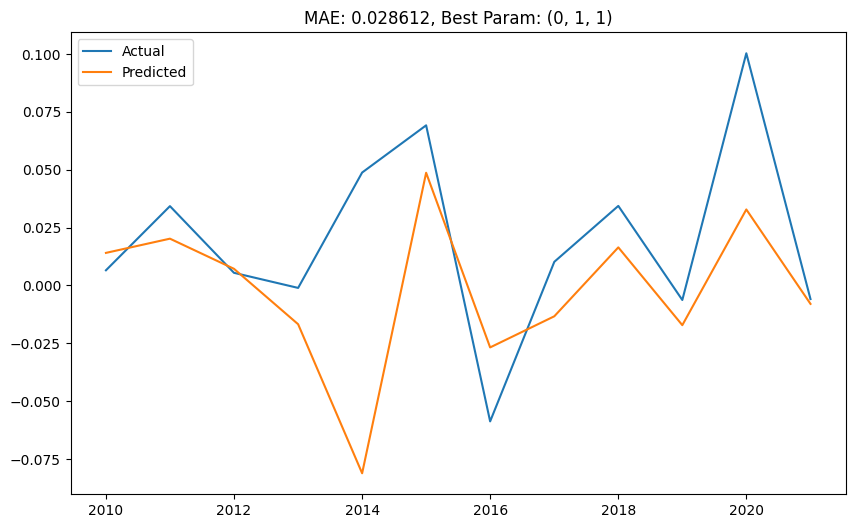

In [ ]:
# Metric
mae = mean_absolute_error(test_BN_y, prediction_test_bn)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_BN_y.index, test_BN_y.values, label='Actual')
plt.plot(test_BN_y.index, prediction_test_bn, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param: {best_order_bn}")
plt.show()

In [ ]:
prediction_train_bn = result_bn.predict(exog=train_BN_X, start=0, end=len(train_data)-1)

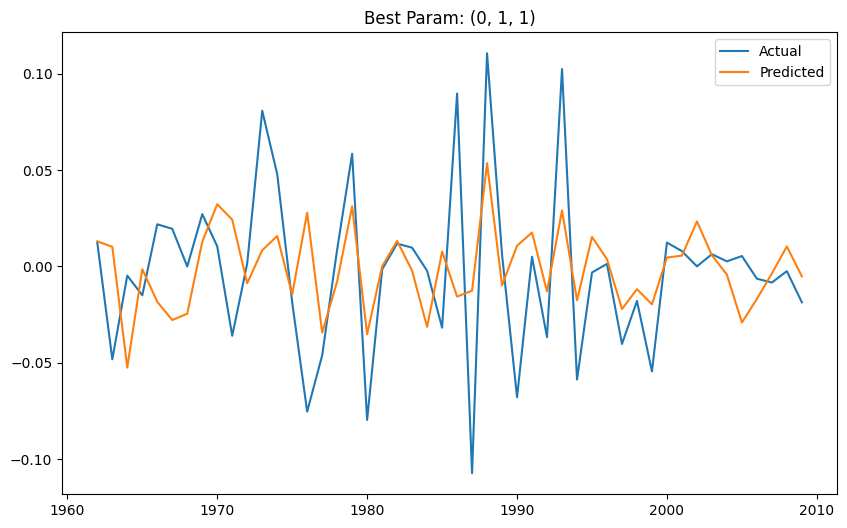

In [ ]:
# Plot
plt.plot(train_BN_y.index, train_BN_y.values, label='Actual')
plt.plot(train_BN_y.index, prediction_train_bn, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_bn}")
plt.show()

In [ ]:
prediction_all_bn = result_bn.predict(exog=test_BN_X, start=0, end=len(df_merged)-1)

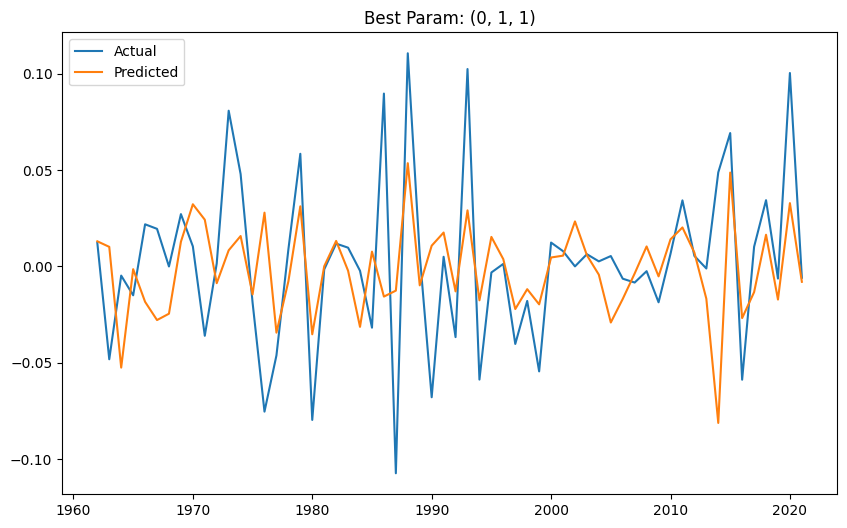

In [ ]:
# Plot
plt.plot(df_merged['Diff_brunei'].index, df_merged['Diff_brunei'].values, label='Actual')
plt.plot(df_merged['Diff_brunei'].index, prediction_all_bn, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_bn}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['BN Rice Yields'].iloc[0]
final_test_predictions_bn = prediction_test_bn.cumsum() + base_value

In [ ]:
final_test_predictions_bn = final_test_predictions_bn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_bn)

2010-01-01    7206.651463
2011-01-01    9226.882949
2012-01-01    9945.307172
2013-01-01    8267.842250
2014-01-01     149.333133
2015-01-01    5017.437732
2016-01-01    2338.130244
2017-01-01    1004.407747
2018-01-01    2648.155038
2019-01-01     930.439768
2020-01-01    4213.113723
2021-01-01    3414.973699
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['BN Rice Yields'] = test_data['BN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['BN Rice Yields'])

Year
2010-01-01     5801.0
2011-01-01     9227.0
2012-01-01     9772.0
2013-01-01     9664.0
2014-01-01    14542.0
2015-01-01    21460.0
2016-01-01    15584.0
2017-01-01    16604.0
2018-01-01    20040.0
2019-01-01    19410.0
2020-01-01    29442.0
2021-01-01    28852.0
Name: BN Rice Yields, dtype: float64


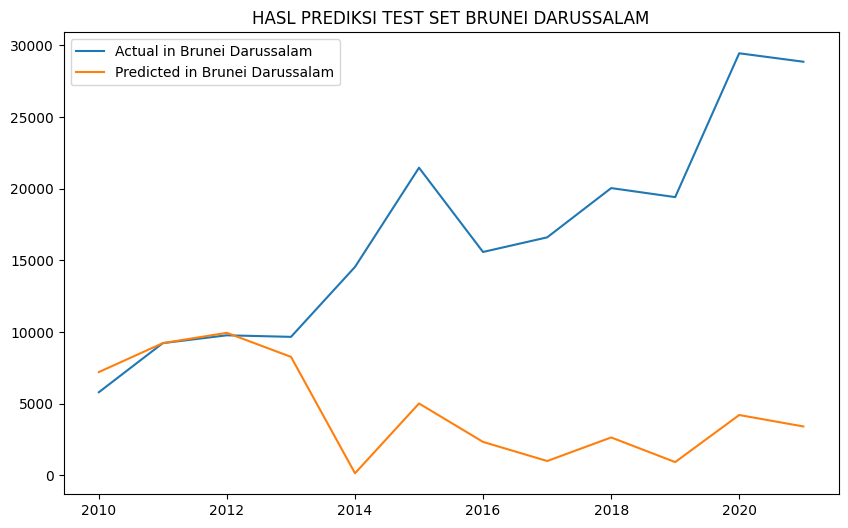

In [ ]:
# Plot
plt.plot(test_data['BN Rice Yields'].index, test_data['BN Rice Yields'].values, label='Actual in Brunei Darussalam')
plt.plot(test_data['BN Rice Yields'].index, final_test_predictions_bn, label='Predicted in Brunei Darussalam')
plt.legend()
plt.title('HASL PREDIKSI TEST SET BRUNEI DARUSSALAM')
plt.show()

In [ ]:
base_value2 = train_data['BN Rice Yields'].iloc[0]
final_train_predictions_bn = prediction_train_ph.cumsum() + base_value2

In [ ]:
train_data['BN Rice Yields'] = train_data['BN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['BN Rice Yields'])

Year
1962-01-01    18527.0
1963-01-01    13711.0
1964-01-01    13235.0
1965-01-01    11737.0
1966-01-01    13922.0
1967-01-01    15871.0
1968-01-01    15868.0
1969-01-01    18581.0
1970-01-01    19621.0
1971-01-01    16024.0
1972-01-01    16175.0
1973-01-01    24251.0
1974-01-01    29040.0
1975-01-01    27178.0
1976-01-01    19647.0
1977-01-01    15034.0
1978-01-01    15917.0
1979-01-01    21759.0
1980-01-01    13797.0
1981-01-01    13643.0
1982-01-01    14825.0
1983-01-01    15797.0
1984-01-01    15571.0
1985-01-01    12394.0
1986-01-01    21359.0
1987-01-01    10630.0
1988-01-01    21685.0
1989-01-01    22286.0
1990-01-01    15500.0
1991-01-01    16000.0
1992-01-01    12333.0
1993-01-01    22571.0
1994-01-01    16702.0
1995-01-01    16387.0
1996-01-01    16519.0
1997-01-01    12497.0
1998-01-01    10707.0
1999-01-01     5263.0
2000-01-01     6500.0
2001-01-01     7292.0
2002-01-01     7294.0
2003-01-01     7928.0
2004-01-01     8190.0
2005-01-01     8728.0
2006-01-01     8091.0
2007-

In [ ]:
final_train_predictions_bn = final_train_predictions_bn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_bn)

1962-01-01    18702.203985
1963-01-01    18355.324402
1964-01-01    18612.968541
1965-01-01    19033.345994
1966-01-01    18295.288756
1967-01-01    19130.776597
1968-01-01    20003.366141
1969-01-01    20807.271130
1970-01-01    20881.130244
1971-01-01    21728.223989
1972-01-01    21813.734808
1973-01-01    23121.873838
1974-01-01    23837.529039
1975-01-01    23764.629083
1976-01-01    24228.550287
1977-01-01    24655.085281
1978-01-01    24876.465656
1979-01-01    27237.649026
1980-01-01    28923.114811
1981-01-01    29890.076478
1982-01-01    30802.567816
1983-01-01    30222.661829
1984-01-01    30875.437007
1985-01-01    31355.184288
1986-01-01    31416.802405
1987-01-01    31355.509159
1988-01-01    30869.578745
1989-01-01    31894.772266
1990-01-01    32706.907916
1991-01-01    32142.645729
1992-01-01    33702.838364
1993-01-01    34453.717034
1994-01-01    34977.629288
1995-01-01    34360.753743
1996-01-01    35149.904788
1997-01-01    35344.688921
1998-01-01    35238.169122
1

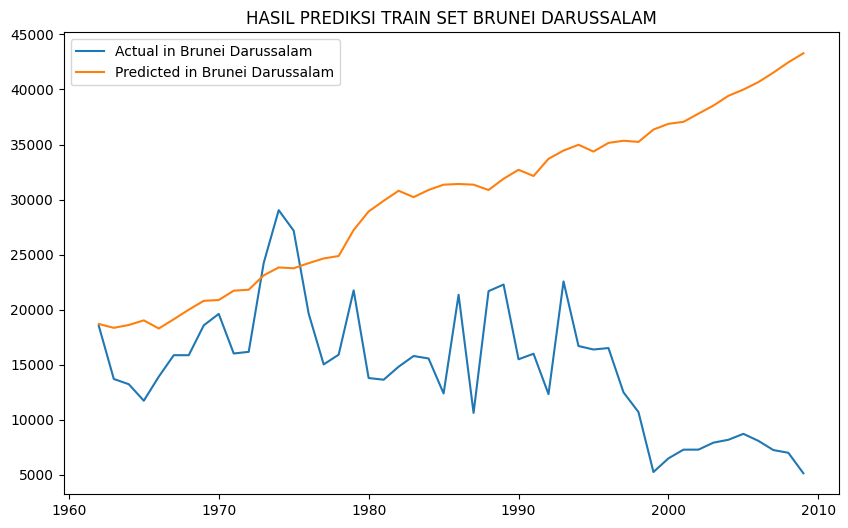

In [ ]:
# Plot
plt.plot(train_data['BN Rice Yields'].index, train_data['BN Rice Yields'].values, label='Actual in Brunei Darussalam')
plt.plot(train_data['BN Rice Yields'].index, final_train_predictions_bn, label='Predicted in Brunei Darussalam')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET BRUNEI DARUSSALAM')
plt.show()

In [ ]:
base_value3 = df_merged['BN Rice Yields'].iloc[0]
final_predictions_bn = prediction_all_ph.cumsum() + base_value3

In [ ]:
final_predictions_bn = final_predictions_bn.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_bn)

1962-01-01    18702.203985
1963-01-01    18355.324402
1964-01-01    18612.968541
1965-01-01    19033.345994
1966-01-01    18295.288756
1967-01-01    19130.776597
1968-01-01    20003.366141
1969-01-01    20807.271130
1970-01-01    20881.130244
1971-01-01    21728.223989
1972-01-01    21813.734808
1973-01-01    23121.873838
1974-01-01    23837.529039
1975-01-01    23764.629083
1976-01-01    24228.550287
1977-01-01    24655.085281
1978-01-01    24876.465656
1979-01-01    27237.649026
1980-01-01    28923.114811
1981-01-01    29890.076478
1982-01-01    30802.567816
1983-01-01    30222.661829
1984-01-01    30875.437007
1985-01-01    31355.184288
1986-01-01    31416.802405
1987-01-01    31355.509159
1988-01-01    30869.578745
1989-01-01    31894.772266
1990-01-01    32706.907916
1991-01-01    32142.645729
1992-01-01    33702.838364
1993-01-01    34453.717034
1994-01-01    34977.629288
1995-01-01    34360.753743
1996-01-01    35149.904788
1997-01-01    35344.688921
1998-01-01    35238.169122
1

In [ ]:
df_merged['BN Rice Yields'] = df_merged['BN Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['BN Rice Yields'])

Year
1962-01-01    18527.0
1963-01-01    13711.0
1964-01-01    13235.0
1965-01-01    11737.0
1966-01-01    13922.0
1967-01-01    15871.0
1968-01-01    15868.0
1969-01-01    18581.0
1970-01-01    19621.0
1971-01-01    16024.0
1972-01-01    16175.0
1973-01-01    24251.0
1974-01-01    29040.0
1975-01-01    27178.0
1976-01-01    19647.0
1977-01-01    15034.0
1978-01-01    15917.0
1979-01-01    21759.0
1980-01-01    13797.0
1981-01-01    13643.0
1982-01-01    14825.0
1983-01-01    15797.0
1984-01-01    15571.0
1985-01-01    12394.0
1986-01-01    21359.0
1987-01-01    10630.0
1988-01-01    21685.0
1989-01-01    22286.0
1990-01-01    15500.0
1991-01-01    16000.0
1992-01-01    12333.0
1993-01-01    22571.0
1994-01-01    16702.0
1995-01-01    16387.0
1996-01-01    16519.0
1997-01-01    12497.0
1998-01-01    10707.0
1999-01-01     5263.0
2000-01-01     6500.0
2001-01-01     7292.0
2002-01-01     7294.0
2003-01-01     7928.0
2004-01-01     8190.0
2005-01-01     8728.0
2006-01-01     8091.0
2007-

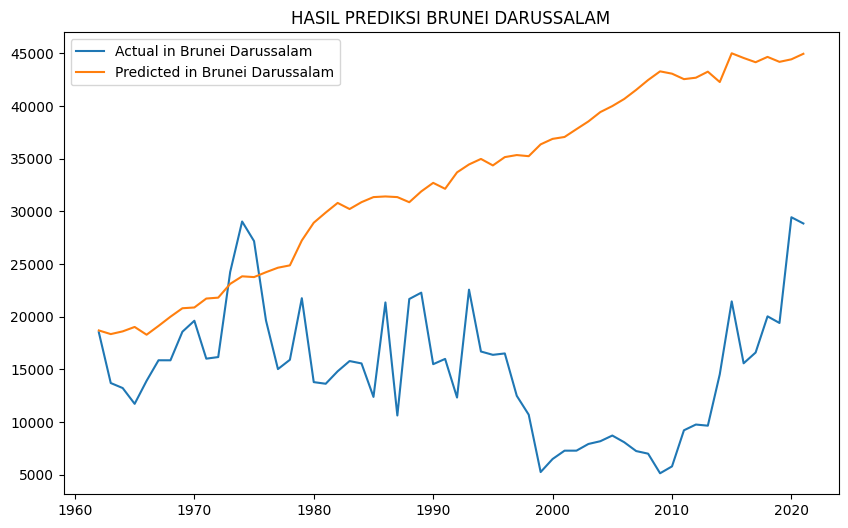

In [ ]:
# Plot
plt.plot(df_merged['BN Rice Yields'].index, df_merged['BN Rice Yields'].values, label='Actual in Brunei Darussalam')
plt.plot(df_merged['BN Rice Yields'].index, final_predictions_bn, label='Predicted in Brunei Darussalam')
plt.legend()
plt.title('HASIL PREDIKSI BRUNEI DARUSSALAM')
plt.show()

# Eksperimen Laos

In [ ]:
print(len(train_LA_X))
print(len(train_LA_y))

print(len(test_LA_X))
print(len(test_LA_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_LA_y,
                     exog= train_LA_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-200.725, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-223.174, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-242.358, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202.723, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-242.013, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-243.589, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-247.671, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-225.169, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-242.030, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-246.057, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-247.717, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-246.043, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-

In [ ]:
best_order_la = step_wise.order
print("Best Order:", best_order_la)

Best Order: (0, 1, 2)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_LA_y, exog=train_LA_X,
                     order=best_order_la)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_la = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_la.summary())

                               SARIMAX Results                                
Dep. Variable:              Diff_laos   No. Observations:                   48
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 134.177
Date:                Thu, 06 Jul 2023   AIC                           -246.354
Time:                        13:49:56   BIC                           -226.002
Sample:                    01-01-1962   HQIC                          -238.696
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.2241      0.173      1.293      0.196      -0.116       0.564
Diff_malaysia     -0.1808      0.139     -1.305      0.192      -0.452       0.091
Diff_brunei        0.0046      0.067

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_la.aic, 2)
bic = round(result_la.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -246.35
BIC: -226.0


In [ ]:
exog_test = test_LA_X
prediction_test_la = result_la.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_la

2010-01-01    0.008969
2011-01-01    0.011089
2012-01-01    0.017482
2013-01-01    0.003556
2014-01-01    0.027498
2015-01-01   -0.012925
2016-01-01   -0.001043
2017-01-01    0.008475
2018-01-01    0.009166
2019-01-01    0.005781
2020-01-01    0.005365
2021-01-01    0.013348
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_LA_y

Year
2010-01-01   -0.02510
2011-01-01    0.01604
2012-01-01   -0.00146
2013-01-01    0.00948
2014-01-01    0.03471
2015-01-01    0.00715
2016-01-01    0.00124
2017-01-01   -0.00374
2018-01-01    0.00013
2019-01-01   -0.00716
2020-01-01   -0.03367
2021-01-01    0.02850
Name: Diff_laos, dtype: float64

MAE:0.015153


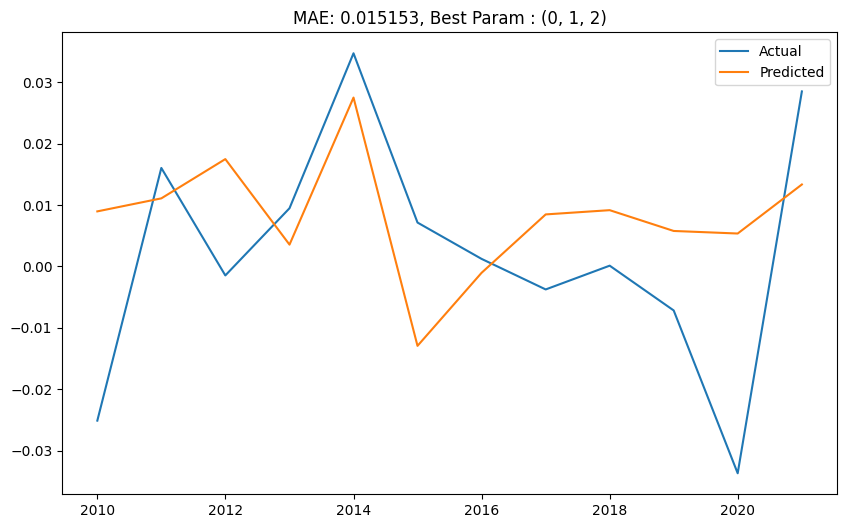

In [ ]:
# Metric
mae = mean_absolute_error(test_LA_y, prediction_test_la)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_LA_y.index, test_LA_y.values, label='Actual')
plt.plot(test_LA_y.index, prediction_test_la, label='Predicted')
plt.legend()
plt.title(label=f"MAE: {mae:.6f}, Best Param : {best_order_la}")
plt.show()

In [ ]:
prediction_train_la = result_la.predict(exog=train_LA_X, start=0, end=len(train_data)-1)

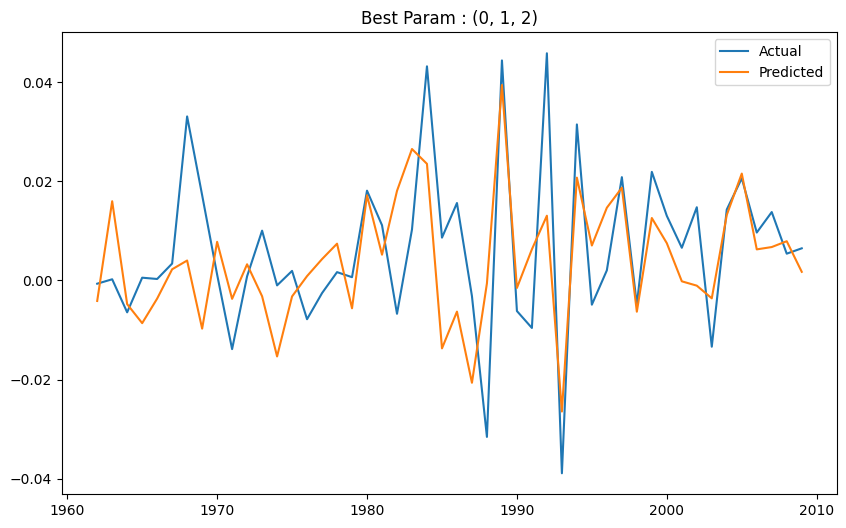

In [ ]:
# Plot
plt.plot(train_LA_y.index, train_LA_y.values, label='Actual')
plt.plot(train_LA_y.index, prediction_train_la, label='Predicted')
plt.legend()
plt.title(label=f"Best Param : {best_order_la}")
plt.show()

In [ ]:
prediction_all_la = result_la.predict(exog=test_LA_X,start=0, end=len(df_merged)-1)

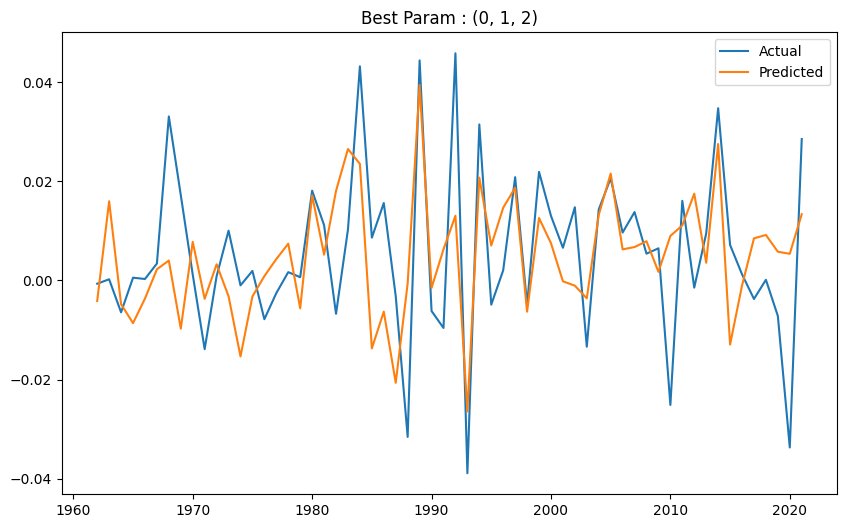

In [ ]:
# Plot
plt.plot(df_merged['Diff_laos'].index, df_merged['Diff_laos'].values, label='Actual')
plt.plot(df_merged['Diff_laos'].index, prediction_all_la, label='Predicted')
plt.legend()
plt.title(label=f"Best Param : {best_order_la}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['LA Rice Yields'].iloc[0]
final_test_predictions_la = prediction_test_la.cumsum() + base_value

In [ ]:
final_test_predictions_la = final_test_predictions_la.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_la)

2010-01-01    36805.854253
2011-01-01    37914.710763
2012-01-01    39662.887771
2013-01-01    40018.527951
2014-01-01    42768.353282
2015-01-01    41475.808236
2016-01-01    41371.524212
2017-01-01    42219.062898
2018-01-01    43135.662744
2019-01-01    43713.796610
2020-01-01    44250.306507
2021-01-01    45585.145594
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['LA Rice Yields'] = test_data['LA Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['LA Rice Yields'])

Year
2010-01-01    35909.0
2011-01-01    37513.0
2012-01-01    37367.0
2013-01-01    38315.0
2014-01-01    41786.0
2015-01-01    42501.0
2016-01-01    42625.0
2017-01-01    42251.0
2018-01-01    42264.0
2019-01-01    41548.0
2020-01-01    38181.0
2021-01-01    41031.0
Name: LA Rice Yields, dtype: float64


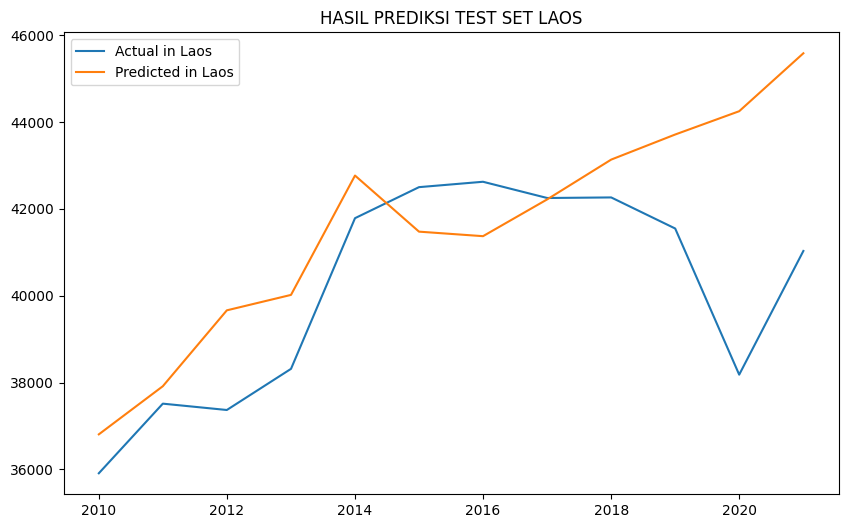

In [ ]:
# Plot
plt.plot(test_data['LA Rice Yields'].index, test_data['LA Rice Yields'].values, label='Actual in Laos')
plt.plot(test_data['LA Rice Yields'].index, final_test_predictions_la, label='Predicted in Laos')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET LAOS')
plt.show()

In [ ]:
base_value2 = train_data['LA Rice Yields'].iloc[0]
final_train_predictions_la = prediction_train_vn.cumsum() + base_value2

In [ ]:
final_train_predictions_la = final_train_predictions_la.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_la)

1962-01-01     8739.534064
1963-01-01     9377.019318
1964-01-01    10454.164926
1965-01-01    10426.211516
1966-01-01    10773.811684
1967-01-01    10707.259259
1968-01-01    11494.140731
1969-01-01    11688.941178
1970-01-01    11896.598862
1971-01-01    11952.641092
1972-01-01    11271.641528
1973-01-01    12708.964115
1974-01-01    13445.269500
1975-01-01    13193.428154
1976-01-01    12891.127649
1977-01-01    12689.579580
1978-01-01    12269.116347
1979-01-01    13647.684096
1980-01-01    13914.463282
1981-01-01    13826.076970
1982-01-01    14031.814769
1983-01-01    13831.125317
1984-01-01    14144.920061
1985-01-01    14472.255082
1986-01-01    15543.975762
1987-01-01    14410.755007
1988-01-01    15225.048940
1989-01-01    16504.502743
1990-01-01    16633.172949
1991-01-01    16604.728432
1992-01-01    17675.156167
1993-01-01    18927.593069
1994-01-01    19429.277754
1995-01-01    19656.383561
1996-01-01    20574.077505
1997-01-01    20567.130372
1998-01-01    20726.536935
1

In [ ]:
train_data['LA Rice Yields'] = train_data['LA Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['LA Rice Yields'])

Year
1962-01-01     8644.0
1963-01-01     8667.0
1964-01-01     8024.0
1965-01-01     8079.0
1966-01-01     8108.0
1967-01-01     8448.0
1968-01-01    11753.0
1969-01-01    13471.0
1970-01-01    13589.0
1971-01-01    12204.0
1972-01-01    12287.0
1973-01-01    13290.0
1974-01-01    13190.0
1975-01-01    13382.0
1976-01-01    12600.0
1977-01-01    12345.0
1978-01-01    12512.0
1979-01-01    12577.0
1980-01-01    14386.0
1981-01-01    15498.0
1982-01-01    14825.0
1983-01-01    15851.0
1984-01-01    20166.0
1985-01-01    21028.0
1986-01-01    22588.0
1987-01-01    22272.0
1988-01-01    19118.0
1989-01-01    23552.0
1990-01-01    22935.0
1991-01-01    21977.0
1992-01-01    26555.0
1993-01-01    22668.0
1994-01-01    25812.0
1995-01-01    25323.0
1996-01-01    25526.0
1997-01-01    27607.0
1998-01-01    27116.0
1999-01-01    29304.0
2000-01-01    30606.0
2001-01-01    31264.0
2002-01-01    32739.0
2003-01-01    31403.0
2004-01-01    32831.0
2005-01-01    34890.0
2006-01-01    35855.0
2007-

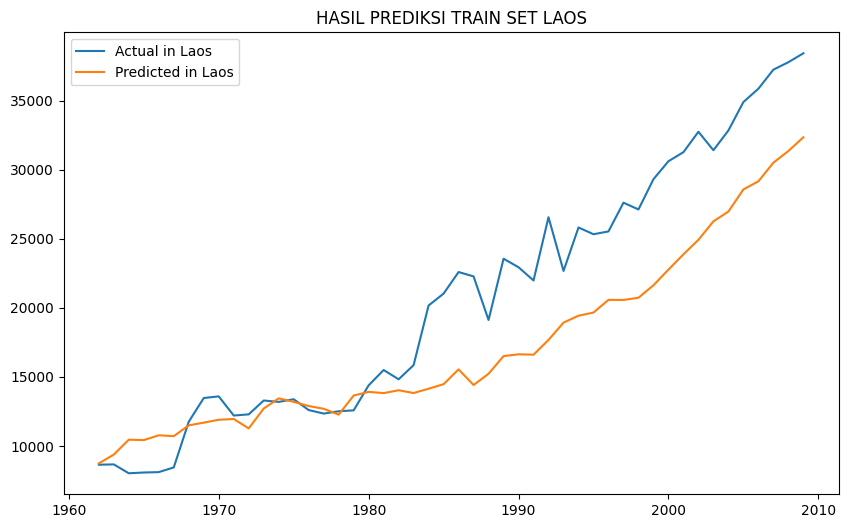

In [ ]:
# Plot
plt.plot(train_data['LA Rice Yields'].index, train_data['LA Rice Yields'].values, label='Actual in Laos')
plt.plot(train_data['LA Rice Yields'].index, final_train_predictions_la, label='Predicted in Laos')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET LAOS')
plt.show()

In [ ]:
base_value3 = df_merged['LA Rice Yields'].iloc[0]
final_predictions_la = prediction_all_la.cumsum() + base_value3

In [ ]:
final_predictions_la = final_predictions_la.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_la)

1962-01-01     8229.978505
1963-01-01     9825.737620
1964-01-01     9347.311208
1965-01-01     8486.108158
1966-01-01     8120.084705
1967-01-01     8344.564376
1968-01-01     8745.439718
1969-01-01     7773.251844
1970-01-01     8551.072040
1971-01-01     8179.804768
1972-01-01     8504.907419
1973-01-01     8185.489874
1974-01-01     6653.324503
1975-01-01     6330.686835
1976-01-01     6417.638060
1977-01-01     6847.724247
1978-01-01     7588.226151
1979-01-01     7026.124847
1980-01-01     8741.728667
1981-01-01     9260.103573
1982-01-01    11064.609292
1983-01-01    13712.985385
1984-01-01    16062.615606
1985-01-01    14692.806666
1986-01-01    14063.821212
1987-01-01    12000.471703
1988-01-01    11941.238865
1989-01-01    15880.163303
1990-01-01    15728.435787
1991-01-01    16355.621131
1992-01-01    17659.711134
1993-01-01    15017.326804
1994-01-01    17088.630328
1995-01-01    17792.433060
1996-01-01    19257.098106
1997-01-01    21125.938962
1998-01-01    20495.668551
1

In [ ]:
df_merged['LA Rice Yields'] = df_merged['LA Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['LA Rice Yields'])

Year
1962-01-01     8644.0
1963-01-01     8667.0
1964-01-01     8024.0
1965-01-01     8079.0
1966-01-01     8108.0
1967-01-01     8448.0
1968-01-01    11753.0
1969-01-01    13471.0
1970-01-01    13589.0
1971-01-01    12204.0
1972-01-01    12287.0
1973-01-01    13290.0
1974-01-01    13190.0
1975-01-01    13382.0
1976-01-01    12600.0
1977-01-01    12345.0
1978-01-01    12512.0
1979-01-01    12577.0
1980-01-01    14386.0
1981-01-01    15498.0
1982-01-01    14825.0
1983-01-01    15851.0
1984-01-01    20166.0
1985-01-01    21028.0
1986-01-01    22588.0
1987-01-01    22272.0
1988-01-01    19118.0
1989-01-01    23552.0
1990-01-01    22935.0
1991-01-01    21977.0
1992-01-01    26555.0
1993-01-01    22668.0
1994-01-01    25812.0
1995-01-01    25323.0
1996-01-01    25526.0
1997-01-01    27607.0
1998-01-01    27116.0
1999-01-01    29304.0
2000-01-01    30606.0
2001-01-01    31264.0
2002-01-01    32739.0
2003-01-01    31403.0
2004-01-01    32831.0
2005-01-01    34890.0
2006-01-01    35855.0
2007-

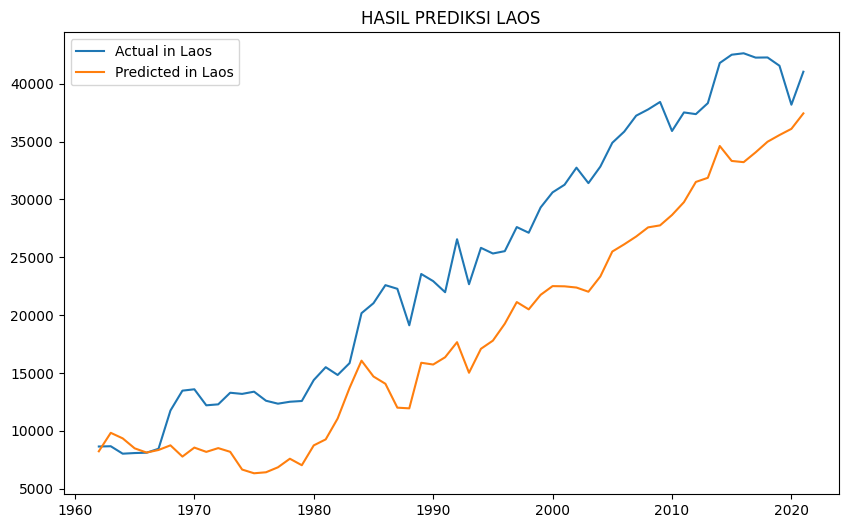

In [ ]:
# Plot
plt.plot(df_merged['LA Rice Yields'].index, df_merged['LA Rice Yields'].values, label='Actual in Laos')
plt.plot(df_merged['LA Rice Yields'].index, final_predictions_la, label='Predicted in Laos')
plt.legend()
plt.title('HASIL PREDIKSI LAOS')
plt.show()

# Eksperimen Myanmar

In [ ]:
print(len(train_MM_X))
print(len(train_MM_y))

print(len(test_MM_X))
print(len(test_MM_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_MM_y,
                     exog= train_MM_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-229.841, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-247.486, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-231.829, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-264.401, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-263.512, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-274.079, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-270.646, Time=1.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-273.584, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-263.200, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-271.296, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-274.905, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-266.3

In [ ]:
best_order_mm = step_wise.order
print("Best Order:", best_order_mm)

Best Order: (2, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_MM_y, exog=train_MM_X,
                     order=best_order_mm)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_mm = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_mm.summary())

                               SARIMAX Results                                
Dep. Variable:           Diff_myanmar   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 143.631
Date:                Thu, 06 Jul 2023   AIC                           -263.262
Time:                        13:59:36   BIC                           -241.061
Sample:                    01-01-1962   HQIC                          -254.908
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.1204      0.237      0.509      0.611      -0.343       0.584
Diff_malaysia      0.2098      0.164      1.280      0.201      -0.112       0.531
Diff_brunei        0.0130      0.051

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_mm.aic, 2)
bic = round(result_mm.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -263.26
BIC: -241.06


In [ ]:
exog_test = test_MM_X
prediction_test_mm = result_mm.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_mm

2010-01-01    0.001283
2011-01-01   -0.002279
2012-01-01   -0.006706
2013-01-01   -0.000545
2014-01-01   -0.022362
2015-01-01    0.018581
2016-01-01   -0.007497
2017-01-01   -0.014716
2018-01-01   -0.005567
2019-01-01   -0.015748
2020-01-01   -0.003699
2021-01-01   -0.000363
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_MM_y

Year
2010-01-01    0.00842
2011-01-01    0.01946
2012-01-01   -0.00002
2013-01-01   -0.00402
2014-01-01   -0.00877
2015-01-01   -0.02080
2016-01-01    0.01172
2017-01-01    0.01012
2018-01-01   -0.00310
2019-01-01   -0.01216
2020-01-01   -0.00100
2021-01-01    0.00803
Name: Diff_myanmar, dtype: float64

MAE:0.012768


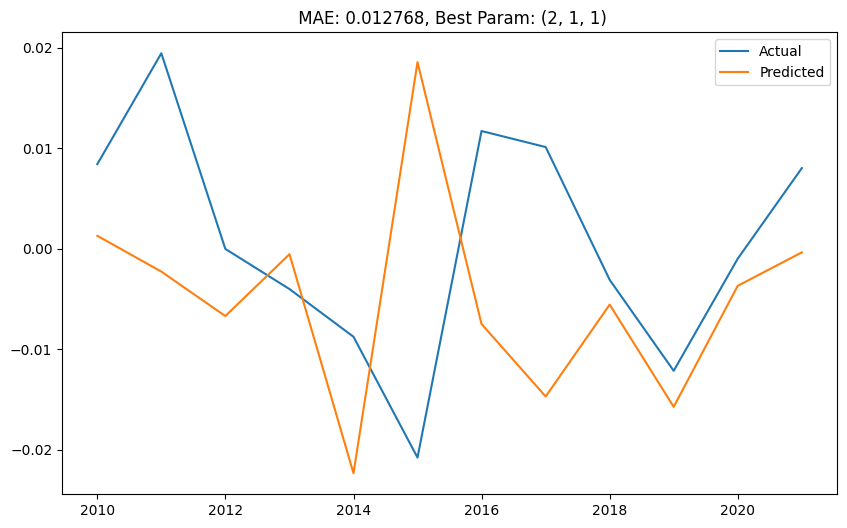

In [ ]:
# Metric
mae = mean_absolute_error(test_MM_y, prediction_test_mm)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_MM_y.index, test_MM_y.values, label='Actual')
plt.plot(test_MM_y.index, prediction_test_mm, label='Predicted')
plt.legend()
plt.title(label=f" MAE: {mae:.6f}, Best Param: {best_order_mm}")
plt.show()

In [ ]:
prediction_train_mm = result_mm.predict(exog=train_MM_X, start=0, end=len(train_data)-1)

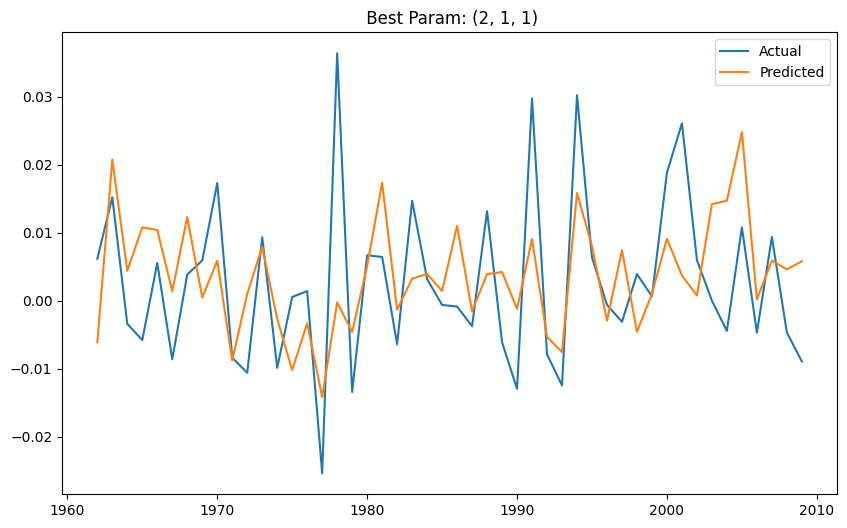

In [ ]:

# Plot
plt.plot(train_MM_y.index, train_MM_y.values, label='Actual')
plt.plot(train_MM_y.index, prediction_train_mm, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_mm}")
plt.show()

In [ ]:
prediction_all_mm = result_mm.predict(exog=test_MM_X,start=0, end=len(df_merged)-1)

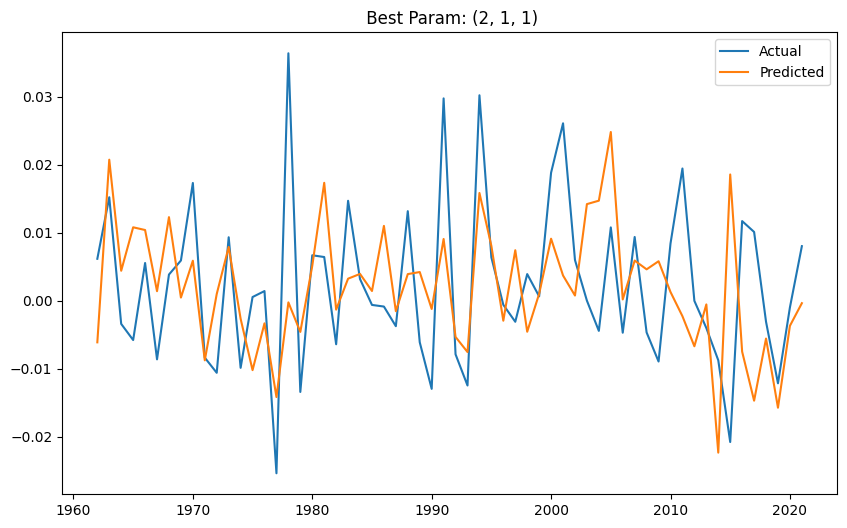

In [ ]:

# Plot
plt.plot(df_merged['Diff_myanmar'].index, df_merged['Diff_myanmar'].values, label='Actual')
plt.plot(df_merged['Diff_myanmar'].index, prediction_all_mm, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_mm}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['MM Rice Yields'].iloc[0]
final_test_predictions_mm = prediction_test_mm.cumsum() + base_value

In [ ]:
final_test_predictions_mm = final_test_predictions_mm.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_mm)

2010-01-01    40154.319354
2011-01-01    39926.372263
2012-01-01    39255.758115
2013-01-01    39201.294031
2014-01-01    36965.044679
2015-01-01    38823.144428
2016-01-01    38073.413161
2017-01-01    36601.817361
2018-01-01    36045.138163
2019-01-01    34470.343414
2020-01-01    34100.435826
2021-01-01    34064.100403
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['MM Rice Yields'] = test_data['MM Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['MM Rice Yields'])

Year
2010-01-01    40026.0
2011-01-01    37733.0
2012-01-01    37512.0
2013-01-01    37930.0
2014-01-01    38464.0
2015-01-01    38718.0
2016-01-01    38181.0
2017-01-01    38218.0
2018-01-01    38568.0
2019-01-01    37957.0
2020-01-01    38043.0
2021-01-01    38108.0
Name: MM Rice Yields, dtype: float64


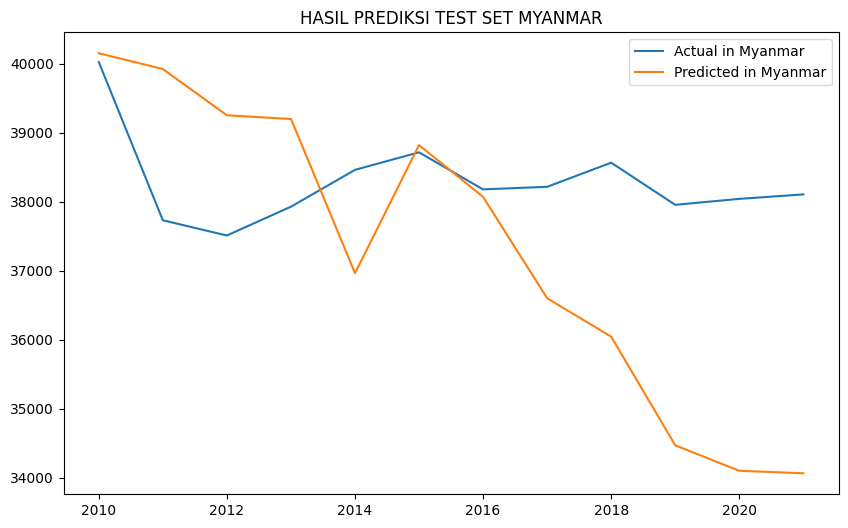

In [ ]:
# Plot
plt.plot(test_data['MM Rice Yields'].index, test_data['MM Rice Yields'].values, label='Actual in Myanmar')
plt.plot(test_data['MM Rice Yields'].index, final_test_predictions_mm, label='Predicted in Myanmar')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET MYANMAR')
plt.show()

In [ ]:
base_value2 = train_data['MM Rice Yields'].iloc[0]
final_train_predictions_mm = prediction_train_mm.cumsum() + base_value2

In [ ]:
train_data['MM Rice Yields'] = train_data['MM Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['MM Rice Yields'])

Year
1962-01-01    16469.0
1963-01-01    15957.0
1964-01-01    17097.0
1965-01-01    16614.0
1966-01-01    14694.0
1967-01-01    16510.0
1968-01-01    16843.0
1969-01-01    17092.0
1970-01-01    16973.0
1971-01-01    17161.0
1972-01-01    16247.0
1973-01-01    17629.0
1974-01-01    17574.0
1975-01-01    18307.0
1976-01-01    18974.0
1977-01-01    19453.0
1978-01-01    21012.0
1979-01-01    23521.0
1980-01-01    27739.0
1981-01-01    29419.0
1982-01-01    31505.0
1983-01-01    30666.0
1984-01-01    30981.0
1985-01-01    30718.0
1986-01-01    30279.0
1987-01-01    30424.0
1988-01-01    29084.0
1989-01-01    29174.0
1990-01-01    29353.0
1991-01-01    28400.0
1992-01-01    28882.0
1993-01-01    30063.0
1994-01-01    31182.0
1995-01-01    29290.0
1996-01-01    30159.0
1997-01-01    30308.0
1998-01-01    30793.0
1999-01-01    32405.0
2000-01-01    33301.0
2001-01-01    33639.0
2002-01-01    33655.0
2003-01-01    34883.0
2004-01-01    35785.0
2005-01-01    36899.0
2006-01-01    37694.0
2007-

In [ ]:
final_train_predictions_mm = final_train_predictions_mm.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_mm)

1962-01-01    15856.361947
1963-01-01    17932.132775
1964-01-01    18372.908398
1965-01-01    19453.490661
1966-01-01    20494.196346
1967-01-01    20634.033236
1968-01-01    21863.953437
1969-01-01    21910.335911
1970-01-01    22499.037945
1971-01-01    21621.793454
1972-01-01    21720.341861
1973-01-01    22511.787553
1974-01-01    22246.185665
1975-01-01    21224.285276
1976-01-01    20891.502921
1977-01-01    19473.449523
1978-01-01    19448.995230
1979-01-01    18989.751177
1980-01-01    19502.093443
1981-01-01    21237.477717
1982-01-01    21105.993332
1983-01-01    21430.309322
1984-01-01    21824.660035
1985-01-01    21967.700752
1986-01-01    23068.850674
1987-01-01    22914.568758
1988-01-01    23306.196058
1989-01-01    23728.271591
1990-01-01    23606.852531
1991-01-01    24515.259859
1992-01-01    23982.297742
1993-01-01    23226.707921
1994-01-01    24812.338473
1995-01-01    25617.513442
1996-01-01    25323.486400
1997-01-01    26066.356144
1998-01-01    25609.568693
1

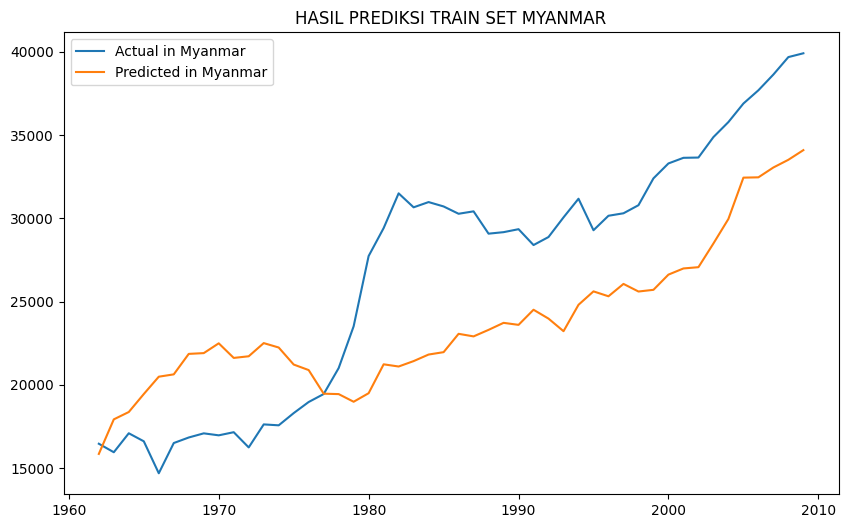

In [ ]:
# Plot
plt.plot(train_data['MM Rice Yields'].index, train_data['MM Rice Yields'].values, label='Actual in Myanmar')
plt.plot(train_data['MM Rice Yields'].index, final_train_predictions_mm, label='Predicted in Myanmar')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET MYANMAR')
plt.show()

In [ ]:
base_value3 = df_merged['MM Rice Yields'].iloc[0]
final_predictions_mm = prediction_all_mm.cumsum() + base_value3

In [ ]:
final_predictions_mm = final_predictions_mm.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_mm)

1962-01-01    15856.361947
1963-01-01    17932.132775
1964-01-01    18372.908398
1965-01-01    19453.490661
1966-01-01    20494.196346
1967-01-01    20634.033236
1968-01-01    21863.953437
1969-01-01    21910.335911
1970-01-01    22499.037945
1971-01-01    21621.793454
1972-01-01    21720.341861
1973-01-01    22511.787553
1974-01-01    22246.185665
1975-01-01    21224.285276
1976-01-01    20891.502921
1977-01-01    19473.449523
1978-01-01    19448.995230
1979-01-01    18989.751177
1980-01-01    19502.093443
1981-01-01    21237.477717
1982-01-01    21105.993332
1983-01-01    21430.309322
1984-01-01    21824.660035
1985-01-01    21967.700752
1986-01-01    23068.850674
1987-01-01    22914.568758
1988-01-01    23306.196058
1989-01-01    23728.271591
1990-01-01    23606.852531
1991-01-01    24515.259859
1992-01-01    23982.297742
1993-01-01    23226.707921
1994-01-01    24812.338473
1995-01-01    25617.513442
1996-01-01    25323.486400
1997-01-01    26066.356144
1998-01-01    25609.568693
1

In [ ]:
df_merged['MM Rice Yields'] = df_merged['MM Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['MM Rice Yields'])

Year
1962-01-01    16469.0
1963-01-01    15957.0
1964-01-01    17097.0
1965-01-01    16614.0
1966-01-01    14694.0
1967-01-01    16510.0
1968-01-01    16843.0
1969-01-01    17092.0
1970-01-01    16973.0
1971-01-01    17161.0
1972-01-01    16247.0
1973-01-01    17629.0
1974-01-01    17574.0
1975-01-01    18307.0
1976-01-01    18974.0
1977-01-01    19453.0
1978-01-01    21012.0
1979-01-01    23521.0
1980-01-01    27739.0
1981-01-01    29419.0
1982-01-01    31505.0
1983-01-01    30666.0
1984-01-01    30981.0
1985-01-01    30718.0
1986-01-01    30279.0
1987-01-01    30424.0
1988-01-01    29084.0
1989-01-01    29174.0
1990-01-01    29353.0
1991-01-01    28400.0
1992-01-01    28882.0
1993-01-01    30063.0
1994-01-01    31182.0
1995-01-01    29290.0
1996-01-01    30159.0
1997-01-01    30308.0
1998-01-01    30793.0
1999-01-01    32405.0
2000-01-01    33301.0
2001-01-01    33639.0
2002-01-01    33655.0
2003-01-01    34883.0
2004-01-01    35785.0
2005-01-01    36899.0
2006-01-01    37694.0
2007-

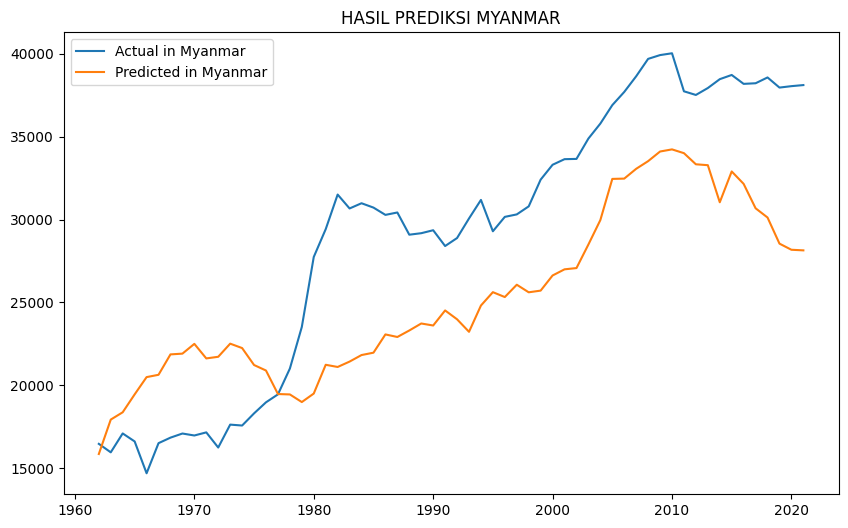

In [ ]:
# Plot
plt.plot(df_merged['MM Rice Yields'].index, df_merged['MM Rice Yields'].values, label='Actual in Myanmar')
plt.plot(df_merged['MM Rice Yields'].index, final_predictions_mm, label='Predicted in Myanmar')
plt.legend()
plt.title('HASIL PREDIKSI MYANMAR')
plt.show()

# Eksperimen Kamboja

In [ ]:
print(len(train_KH_X))
print(len(train_KH_y))

print(len(test_KH_X))
print(len(test_KH_y))

48
48
12
12


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_KH_y,
                     exog= train_KH_X,
                     start_p=0,  start_q=0,
                     max_p=7,  max_q=7,
                     d=1,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-205.787, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-231.820, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-245.745, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-207.761, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-246.183, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-245.039, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-243.257, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-246.033, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-246.644, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-236.644, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-244.478, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-236.222, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-

In [ ]:
best_order_kh = step_wise.order
print("Best Order:", best_order_kh)

Best Order: (1, 1, 1)


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMAX
model = sm.tsa.ARIMA(endog=train_KH_y, exog=train_KH_X,
                     order=best_order_kh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
result_kh = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_kh.summary())

                               SARIMAX Results                                
Dep. Variable:           Diff_kamboja   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 133.260
Date:                Thu, 06 Jul 2023   AIC                           -244.519
Time:                        14:03:55   BIC                           -224.167
Sample:                    01-01-1962   HQIC                          -236.861
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Diff_indonesia     0.2921      0.425      0.687      0.492      -0.541       1.126
Diff_malaysia     -0.1224      0.292     -0.420      0.675      -0.694       0.449
Diff_brunei       -0.0550      0.065

In [ ]:
# Mengambil nilai AIC dan BIC dari model dan membulatkannya
aic = round(result_kh.aic, 2)
bic = round(result_kh.bic, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: -244.52
BIC: -224.17


In [ ]:
exog_test = test_KH_X
prediction_test_kh = result_kh.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test)

In [ ]:
prediction_test_kh

2010-01-01    0.003919
2011-01-01    0.008484
2012-01-01    0.005703
2013-01-01    0.003139
2014-01-01    0.014737
2015-01-01   -0.011154
2016-01-01    0.002805
2017-01-01    0.006724
2018-01-01    0.007923
2019-01-01   -0.001969
2020-01-01   -0.008297
2021-01-01    0.014209
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
test_KH_y

Year
2010-01-01    0.01334
2011-01-01   -0.00123
2012-01-01    0.01318
2013-01-01    0.00799
2014-01-01    0.00920
2015-01-01    0.00739
2016-01-01    0.01093
2017-01-01   -0.00469
2018-01-01    0.00037
2019-01-01   -0.00658
2020-01-01    0.00498
2021-01-01    0.01224
Name: Diff_kamboja, dtype: float64

MAE:0.008541


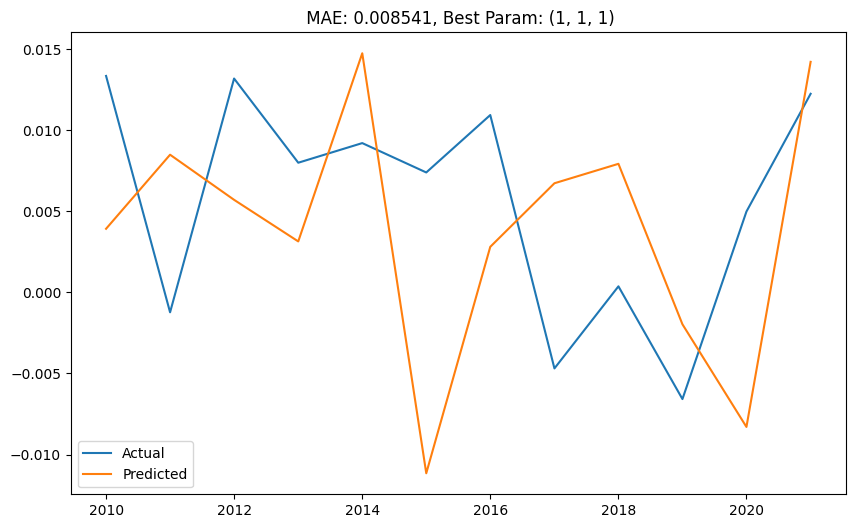

In [ ]:
# Metric
mae = mean_absolute_error(test_KH_y, prediction_test_kh)
print(f"MAE:{mae:.6f}")

# Plot
plt.plot(test_KH_y.index, test_KH_y.values, label='Actual')
plt.plot(test_KH_y.index, prediction_test_kh, label='Predicted')
plt.legend()
plt.title(label=f" MAE: {mae:.6f}, Best Param: {best_order_kh}")
plt.show()

In [ ]:
prediction_train_kh = result_kh.predict(exog=train_KH_X, start=0, end=len(train_data)-1)

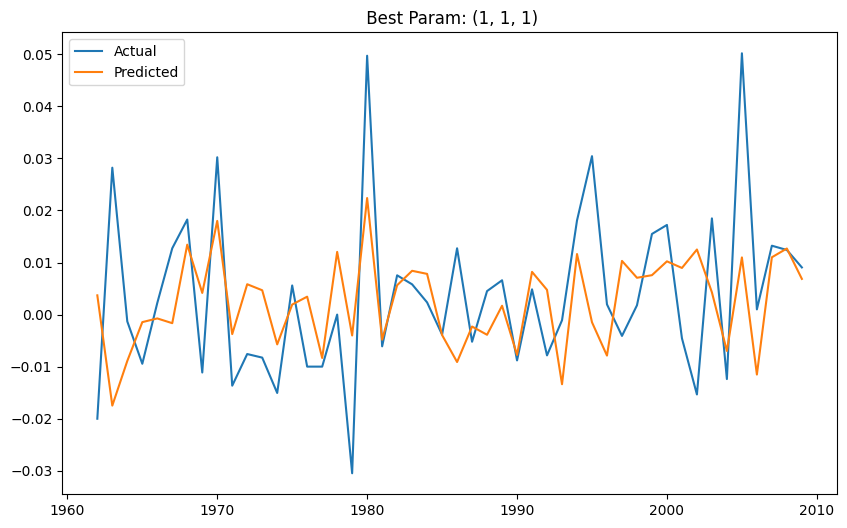

In [ ]:
# Plot
plt.plot(train_KH_y.index, train_KH_y.values, label='Actual')
plt.plot(train_KH_y.index, prediction_train_kh, label='Predicted')
plt.legend()
plt.title(label=f" Best Param: {best_order_kh}")
plt.show()

In [ ]:
prediction_all_kh = result_kh.predict(exog=test_KH_X,start=0, end=len(df_merged)-1)

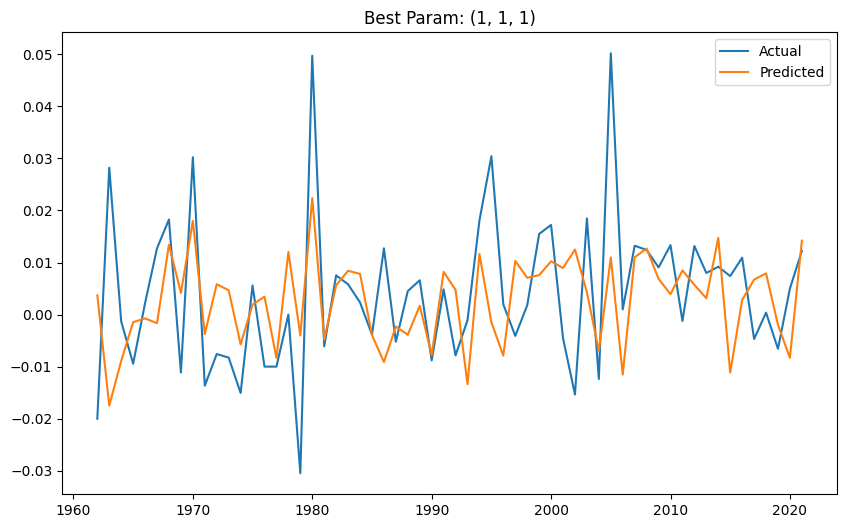

In [ ]:
# Plot
plt.plot(df_merged['Diff_kamboja'].index, df_merged['Diff_kamboja'].values, label='Actual')
plt.plot(df_merged['Diff_kamboja'].index, prediction_all_kh, label='Predicted')
plt.legend()
plt.title(label=f"Best Param: {best_order_kh}")
plt.show()

## Hasil

In [ ]:
base_value = test_data['KH Rice Yields'].iloc[0]
final_test_predictions_kh = prediction_test_kh.cumsum() + base_value

In [ ]:
final_test_predictions_kh = final_test_predictions_kh.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_test_predictions_kh)

2010-01-01    30088.867129
2011-01-01    30937.258425
2012-01-01    31507.581422
2013-01-01    31821.455570
2014-01-01    33295.145491
2015-01-01    32179.764151
2016-01-01    32460.249676
2017-01-01    33132.674433
2018-01-01    33924.959394
2019-01-01    33728.024972
2020-01-01    32898.358339
2021-01-01    34319.225357
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
test_data['KH Rice Yields'] = test_data['KH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(test_data['KH Rice Yields'])

Year
2010-01-01    29697.0
2011-01-01    29574.0
2012-01-01    30892.0
2013-01-01    31691.0
2014-01-01    32611.0
2015-01-01    33350.0
2016-01-01    34443.0
2017-01-01    33974.0
2018-01-01    34011.0
2019-01-01    33353.0
2020-01-01    33851.0
2021-01-01    35075.0
Name: KH Rice Yields, dtype: float64


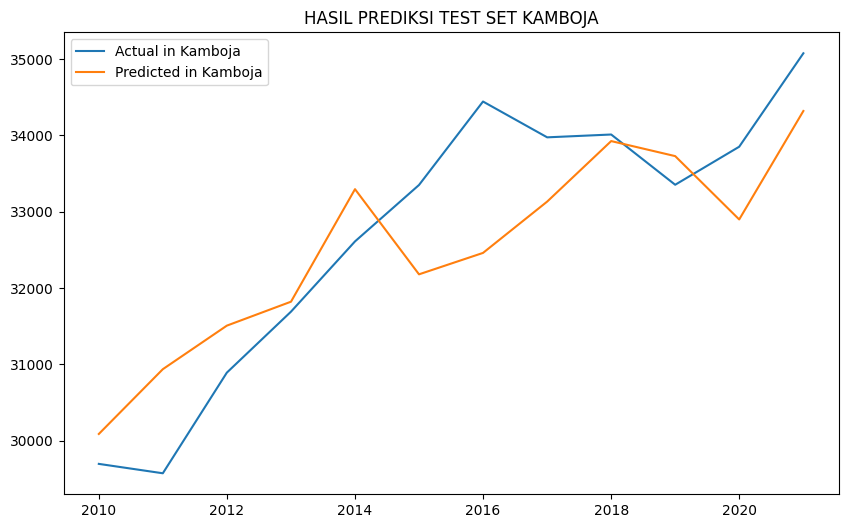

In [ ]:
# Plot
plt.plot(test_data['KH Rice Yields'].index, test_data['KH Rice Yields'].values, label='Actual in Kamboja')
plt.plot(test_data['KH Rice Yields'].index, final_test_predictions_kh, label='Predicted in Kamboja')
plt.legend()
plt.title('HASIL PREDIKSI TEST SET KAMBOJA')
plt.show()

In [ ]:
base_value2 = train_data['KH Rice Yields'].iloc[0]
final_train_predictions_kh = prediction_train_kh.cumsum() + base_value2

In [ ]:
final_train_predictions_kh = final_train_predictions_kh.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_train_predictions_kh)

1962-01-01     9289.466892
1963-01-01     7540.697966
1964-01-01     6649.434132
1965-01-01     6504.344745
1966-01-01     6430.240266
1967-01-01     6264.887372
1968-01-01     7608.131680
1969-01-01     8023.670949
1970-01-01     9822.872409
1971-01-01     9447.703022
1972-01-01    10030.646407
1973-01-01    10497.712670
1974-01-01     9925.181428
1975-01-01    10117.713618
1976-01-01    10461.692396
1977-01-01     9627.586267
1978-01-01    10831.523918
1979-01-01    10430.192095
1980-01-01    12669.019342
1981-01-01    12186.048573
1982-01-01    12749.748969
1983-01-01    13590.643240
1984-01-01    14372.484743
1985-01-01    13978.866481
1986-01-01    13067.438083
1987-01-01    12837.708054
1988-01-01    12449.567887
1989-01-01    12618.979390
1990-01-01    11843.694537
1991-01-01    12663.950364
1992-01-01    13138.792479
1993-01-01    11800.660248
1994-01-01    12963.471386
1995-01-01    12815.777326
1996-01-01    12027.789134
1997-01-01    13058.836061
1998-01-01    13765.823893
1

In [ ]:
train_data['KH Rice Yields'] = train_data['KH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(train_data['KH Rice Yields'])

Year
1962-01-01     8920.0
1963-01-01    11742.0
1964-01-01    11611.0
1965-01-01    10666.0
1966-01-01    10889.0
1967-01-01    12163.0
1968-01-01    13989.0
1969-01-01    12876.0
1970-01-01    15898.0
1971-01-01    14532.0
1972-01-01    13774.0
1973-01-01    12947.0
1974-01-01    11441.0
1975-01-01    12000.0
1976-01-01    11000.0
1977-01-01    10000.0
1978-01-01    10000.0
1979-01-01     6951.0
1980-01-01    11924.0
1981-01-01    11314.0
1982-01-01    12068.0
1983-01-01    12649.0
1984-01-01    12883.0
1985-01-01    12497.0
1986-01-01    13770.0
1987-01-01    13248.0
1988-01-01    13699.0
1989-01-01    14358.0
1990-01-01    13477.0
1991-01-01    13962.0
1992-01-01    13178.0
1993-01-01    13069.0
1994-01-01    14877.0
1995-01-01    17920.0
1996-01-01    18116.0
1997-01-01    17706.0
1998-01-01    17884.0
1999-01-01    19433.0
2000-01-01    21155.0
2001-01-01    20699.0
2002-01-01    19164.0
2003-01-01    21012.0
2004-01-01    19773.0
2005-01-01    24793.0
2006-01-01    24893.0
2007-

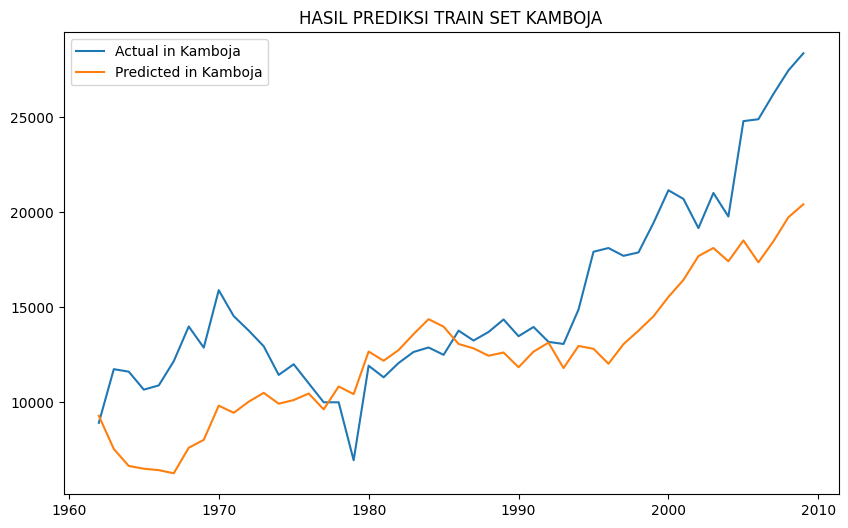

In [ ]:
# Plot
plt.plot(train_data['KH Rice Yields'].index, train_data['KH Rice Yields'].values, label='Actual in Kamboja')
plt.plot(train_data['KH Rice Yields'].index, final_train_predictions_kh, label='Predicted in Kamboja')
plt.legend()
plt.title('HASIL PREDIKSI TRAIN SET KAMBOJA')
plt.show()

In [ ]:
base_value3 = df_merged['KH Rice Yields'].iloc[0]
final_predictions_kh = prediction_all_kh.cumsum() + base_value3

In [ ]:
df_merged['KH Rice Yields'] = df_merged['KH Rice Yields'].apply(inverse_decimal_scaling, args=(scale_factor,))
print(df_merged['KH Rice Yields'])

Year
1962-01-01     8920.0
1963-01-01    11742.0
1964-01-01    11611.0
1965-01-01    10666.0
1966-01-01    10889.0
1967-01-01    12163.0
1968-01-01    13989.0
1969-01-01    12876.0
1970-01-01    15898.0
1971-01-01    14532.0
1972-01-01    13774.0
1973-01-01    12947.0
1974-01-01    11441.0
1975-01-01    12000.0
1976-01-01    11000.0
1977-01-01    10000.0
1978-01-01    10000.0
1979-01-01     6951.0
1980-01-01    11924.0
1981-01-01    11314.0
1982-01-01    12068.0
1983-01-01    12649.0
1984-01-01    12883.0
1985-01-01    12497.0
1986-01-01    13770.0
1987-01-01    13248.0
1988-01-01    13699.0
1989-01-01    14358.0
1990-01-01    13477.0
1991-01-01    13962.0
1992-01-01    13178.0
1993-01-01    13069.0
1994-01-01    14877.0
1995-01-01    17920.0
1996-01-01    18116.0
1997-01-01    17706.0
1998-01-01    17884.0
1999-01-01    19433.0
2000-01-01    21155.0
2001-01-01    20699.0
2002-01-01    19164.0
2003-01-01    21012.0
2004-01-01    19773.0
2005-01-01    24793.0
2006-01-01    24893.0
2007-

In [ ]:
final_predictions_kh = final_predictions_kh.apply(inverse_decimal_scaling, args=(scale_factor,))
print(final_predictions_kh)

1962-01-01     9289.466892
1963-01-01     7540.697966
1964-01-01     6649.434132
1965-01-01     6504.344745
1966-01-01     6430.240266
1967-01-01     6264.887372
1968-01-01     7608.131680
1969-01-01     8023.670949
1970-01-01     9822.872409
1971-01-01     9447.703022
1972-01-01    10030.646407
1973-01-01    10497.712670
1974-01-01     9925.181428
1975-01-01    10117.713618
1976-01-01    10461.692396
1977-01-01     9627.586267
1978-01-01    10831.523918
1979-01-01    10430.192095
1980-01-01    12669.019342
1981-01-01    12186.048573
1982-01-01    12749.748969
1983-01-01    13590.643240
1984-01-01    14372.484743
1985-01-01    13978.866481
1986-01-01    13067.438083
1987-01-01    12837.708054
1988-01-01    12449.567887
1989-01-01    12618.979390
1990-01-01    11843.694537
1991-01-01    12663.950364
1992-01-01    13138.792479
1993-01-01    11800.660248
1994-01-01    12963.471386
1995-01-01    12815.777326
1996-01-01    12027.789134
1997-01-01    13058.836061
1998-01-01    13765.823893
1

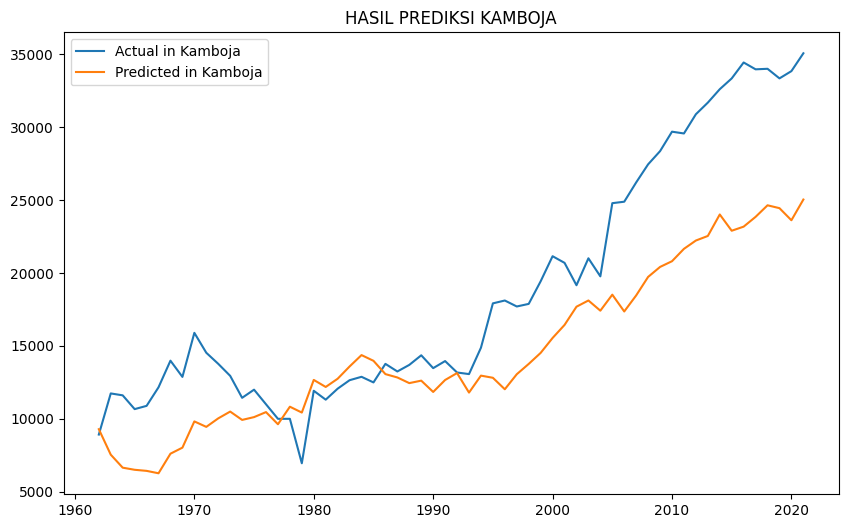

In [ ]:
# Plot
plt.plot(df_merged['KH Rice Yields'].index, df_merged['KH Rice Yields'].values, label='Actual in Kamboja')
plt.plot(df_merged['KH Rice Yields'].index, final_predictions_kh, label='Predicted in Kamboja')
plt.legend()
plt.title('HASIL PREDIKSI KAMBOJA')
plt.show()